In [446]:
! pip install ftfy regex tqdm
! pip install git+https://github.com/openai/CLIP.git

  Cloning https://github.com/openai/CLIP.git to /tmp/pip-req-build-qv61m_gc
  Running command git clone -q https://github.com/openai/CLIP.git /tmp/pip-req-build-qv61m_gc
  Resolved https://github.com/openai/CLIP.git to commit b46f5ac7587d2e1862f8b7b1573179d80dcdd620


In [447]:
import numpy as np
import torch
from pkg_resources import packaging

print("Torch version:", torch.__version__)

Torch version: 1.11.0+cu102


In [448]:
import clip

clip.available_models()

['RN50',
 'RN101',
 'RN50x4',
 'RN50x16',
 'RN50x64',
 'ViT-B/32',
 'ViT-B/16',
 'ViT-L/14',
 'ViT-L/14@336px']

In [449]:
model, preprocess = clip.load("ViT-B/32")
model.cuda().eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


In [450]:
import os
import IPython.display
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import torch.nn as nn

In [188]:
fpath = os.path.join(os.getcwd(), "reference-1000-0.npz")
fpath

'/data/pawanw/calibrate_your_listeners_clip/calibrate_your_listeners/clip/reference-1000-0.npz'

In [189]:
npzfile = np.load(fpath)

In [30]:
npzfile.files

['imgs', 'labels', 'langs']

In [31]:
print(len(npzfile['imgs']))
print(len(npzfile['labels']))
print(len(npzfile['langs']))

1000
1000
1000


In [32]:
npzfile['imgs']

array([[[[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         ...,

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]],

         [[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
          [0, 0, 0]]],


        [[[0, 0, 0],
          [0, 0, 0],
          [0, 0, 0],
          ...,
          [0, 0, 0],
          [0, 0, 0],
     

In [33]:
npzfile['labels']

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       ...,
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]], dtype=uint8)

In [34]:
npzfile['langs']

array(['yellow shape', 'red shape', 'gray shape', 'green shape',
       'white shape', 'circle', 'rectangle', 'white square', 'red shape',
       'white rectangle', 'blue shape', 'yellow shape', 'yellow shape',
       'ellipse', 'white shape', 'green shape', 'blue circle',
       'gray shape', 'rectangle', 'ellipse', 'yellow shape',
       'green shape', 'green shape', 'rectangle', 'square', 'white shape',
       'blue shape', 'gray shape', 'square', 'green shape', 'white shape',
       'red shape', 'circle', 'blue shape', 'rectangle', 'ellipse',
       'circle', 'rectangle', 'rectangle', 'green shape', 'square',
       'square', 'square', 'circle', 'white shape', 'rectangle',
       'green shape', 'square', 'gray shape', 'square', 'blue shape',
       'yellow shape', 'red shape', 'rectangle', 'square', 'circle',
       'rectangle', 'white shape', 'square', 'circle', 'green shape',
       'ellipse', 'green shape', 'circle', 'square', 'rectangle',
       'rectangle', 'blue shape', 'elli

### Displaying images

In [35]:
# TODO: make sure to understand img dimensions

In [36]:
for key in npzfile.keys():
    print("variable name:", key, end="  ")
    print("type: "+ str(npzfile[key].dtype), end="  ")
    print("shape:"+ str(npzfile[key].shape))

variable name: imgs  type: uint8  shape:(1000, 3, 64, 64, 3)
variable name: labels  type: uint8  shape:(1000, 3)
variable name: langs  type: <U16  shape:(1000,)


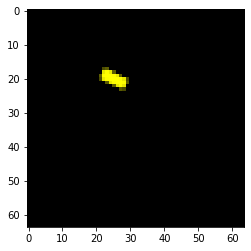

In [39]:
plt.imshow(npzfile['imgs'][0][0])

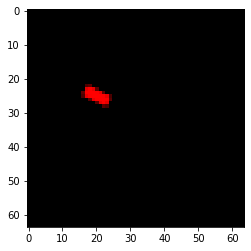

In [40]:
plt.imshow(npzfile['imgs'][0][1])

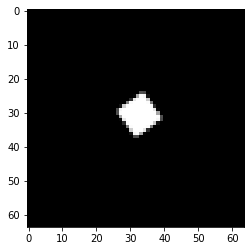

In [41]:
plt.imshow(npzfile['imgs'][0][2])

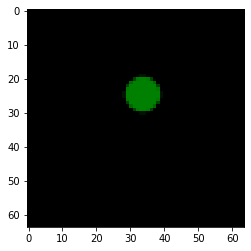

In [42]:
plt.imshow(npzfile['imgs'][999][0])

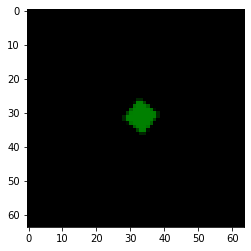

In [43]:
plt.imshow(npzfile['imgs'][999][1])

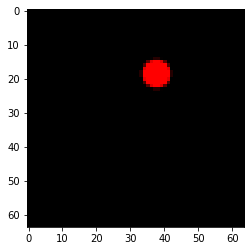

In [44]:
plt.imshow(npzfile['imgs'][999][2])

### Game 1

In [244]:
fpath = os.path.join(os.getcwd(), "reference-1000-0.npz")
fpath

'/data/pawanw/calibrate_your_listeners_clip/calibrate_your_listeners/clip/reference-1000-0.npz'

In [245]:
batch = np.load(fpath)

In [246]:
imgs, labels, utterances = (
            batch['imgs'], batch['labels'].argmax(-1), batch['langs'])

In [247]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [193]:
lis_scores = []

for i in range(len(imgs)):
    states = batch['imgs'][i]

    original_images = []
    images = []
    # plt.figure(figsize=(16, 5))

    for j in range(3):
        image = Image.fromarray(np.uint8(states[j])).convert('RGB')
        # plt.subplot(2, 4, len(images) + 1)
        # plt.imshow(image)
        # plt.xticks([])
        # plt.yticks([])

        original_images.append(image)
        images.append(preprocess(image))

    # plt.tight_layout()
    
    image_input = torch.tensor(np.stack(images)).cuda()

    lang = batch['langs'][i]
    utterance = "This is a " + lang
    utterance_tokens = clip.tokenize(utterance).cuda()

    with torch.no_grad():
        image_features = model.encode_image(image_input).float()
        utterance_features = model.encode_text(utterance_tokens).float()

    image_features /= image_features.norm(dim=-1, keepdim=True)
    utterance_features /= utterance_features.norm(dim=-1, keepdim=True)

    image_probs = (100.0 * utterance_features @ image_features.T).softmax(dim=-1)
    top_probs, top_labels = image_probs.cpu().topk(3, dim=-1)

    lis_scores.append(image_probs[0])
    
    print(i)
    print("top_probs:  ",top_probs)
    print("top_labels: ", top_labels)
    print("image_probs:", image_probs)

0
top_probs:   tensor([[0.9515, 0.0257, 0.0228]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9515, 0.0257, 0.0228]], device='cuda:0')
1
top_probs:   tensor([[0.9875, 0.0087, 0.0039]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9875, 0.0087, 0.0039]], device='cuda:0')
2
top_probs:   tensor([[0.5378, 0.3227, 0.1395]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5378, 0.3227, 0.1395]], device='cuda:0')
3
top_probs:   tensor([[0.9905, 0.0053, 0.0043]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9905, 0.0053, 0.0043]], device='cuda:0')
4
top_probs:   tensor([[0.6512, 0.2587, 0.0902]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6512, 0.2587, 0.0902]], device='cuda:0')
5
top_probs:   tensor([[0.5009, 0.3639, 0.1352]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5009, 0.1352, 0.3639]], device='cuda:0')
6
top_probs:   tensor([[0.5703, 0.2895, 0.1402]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5703,

56
top_probs:   tensor([[0.8778, 0.0770, 0.0452]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8778, 0.0770, 0.0452]], device='cuda:0')
57
top_probs:   tensor([[0.4495, 0.3263, 0.2242]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3263, 0.2242, 0.4495]], device='cuda:0')
58
top_probs:   tensor([[0.8083, 0.1451, 0.0465]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8083, 0.0465, 0.1451]], device='cuda:0')
59
top_probs:   tensor([[0.9340, 0.0418, 0.0242]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9340, 0.0418, 0.0242]], device='cuda:0')
60
top_probs:   tensor([[0.9495, 0.0315, 0.0189]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9495, 0.0189, 0.0315]], device='cuda:0')
61
top_probs:   tensor([[0.9090, 0.0618, 0.0292]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9090, 0.0618, 0.0292]], device='cuda:0')
62
top_probs:   tensor([[0.9971, 0.0018, 0.0012]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[

111
top_probs:   tensor([[0.6410, 0.1930, 0.1660]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6410, 0.1930, 0.1660]], device='cuda:0')
112
top_probs:   tensor([[0.5002, 0.4241, 0.0756]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5002, 0.4241, 0.0756]], device='cuda:0')
113
top_probs:   tensor([[0.5659, 0.2610, 0.1731]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5659, 0.2610, 0.1731]], device='cuda:0')
114
top_probs:   tensor([[0.9509, 0.0355, 0.0137]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9509, 0.0137, 0.0355]], device='cuda:0')
115
top_probs:   tensor([[0.9902, 0.0054, 0.0044]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9902, 0.0044, 0.0054]], device='cuda:0')
116
top_probs:   tensor([[0.7363, 0.1874, 0.0763]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7363, 0.1874, 0.0763]], device='cuda:0')
117
top_probs:   tensor([[0.3896, 0.3467, 0.2637]])
top_labels:  tensor([[1, 2, 0]])
image_probs: te

167
top_probs:   tensor([[0.7477, 0.1918, 0.0604]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.1918, 0.0604, 0.7477]], device='cuda:0')
168
top_probs:   tensor([[0.6478, 0.2090, 0.1432]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6478, 0.1432, 0.2090]], device='cuda:0')
169
top_probs:   tensor([[0.4949, 0.2851, 0.2201]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4949, 0.2201, 0.2851]], device='cuda:0')
170
top_probs:   tensor([[0.6945, 0.2440, 0.0614]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6945, 0.0614, 0.2440]], device='cuda:0')
171
top_probs:   tensor([[0.5483, 0.2642, 0.1875]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5483, 0.1875, 0.2642]], device='cuda:0')
172
top_probs:   tensor([[0.9821, 0.0093, 0.0086]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9821, 0.0093, 0.0086]], device='cuda:0')
173
top_probs:   tensor([[0.4482, 0.3006, 0.2512]])
top_labels:  tensor([[1, 0, 2]])
image_probs: te

223
top_probs:   tensor([[0.4270, 0.4075, 0.1655]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.4075, 0.4270, 0.1655]], device='cuda:0')
224
top_probs:   tensor([[0.6974, 0.2655, 0.0371]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6974, 0.0371, 0.2655]], device='cuda:0')
225
top_probs:   tensor([[0.5869, 0.2202, 0.1929]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5869, 0.2202, 0.1929]], device='cuda:0')
226
top_probs:   tensor([[0.5063, 0.2833, 0.2104]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5063, 0.2104, 0.2833]], device='cuda:0')
227
top_probs:   tensor([[0.8580, 0.1094, 0.0326]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8580, 0.0326, 0.1094]], device='cuda:0')
228
top_probs:   tensor([[0.5129, 0.3802, 0.1069]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5129, 0.3802, 0.1069]], device='cuda:0')
229
top_probs:   tensor([[0.6306, 0.1900, 0.1794]])
top_labels:  tensor([[1, 0, 2]])
image_probs: te

278
top_probs:   tensor([[0.4838, 0.2929, 0.2232]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4838, 0.2232, 0.2929]], device='cuda:0')
279
top_probs:   tensor([[0.5059, 0.2601, 0.2340]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.2601, 0.5059, 0.2340]], device='cuda:0')
280
top_probs:   tensor([[0.5488, 0.4392, 0.0120]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5488, 0.0120, 0.4392]], device='cuda:0')
281
top_probs:   tensor([[0.3579, 0.3573, 0.2849]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.3579, 0.2849, 0.3573]], device='cuda:0')
282
top_probs:   tensor([[0.4795, 0.3669, 0.1536]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3669, 0.1536, 0.4795]], device='cuda:0')
283
top_probs:   tensor([[0.8144, 0.1166, 0.0689]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.1166, 0.8144, 0.0689]], device='cuda:0')
284
top_probs:   tensor([[0.7052, 0.1688, 0.1260]])
top_labels:  tensor([[0, 1, 2]])
image_probs: te

334
top_probs:   tensor([[0.8843, 0.0978, 0.0179]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8843, 0.0978, 0.0179]], device='cuda:0')
335
top_probs:   tensor([[0.6443, 0.3035, 0.0522]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3035, 0.6443, 0.0522]], device='cuda:0')
336
top_probs:   tensor([[0.9836, 0.0095, 0.0069]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9836, 0.0095, 0.0069]], device='cuda:0')
337
top_probs:   tensor([[0.5357, 0.2523, 0.2121]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5357, 0.2523, 0.2121]], device='cuda:0')
338
top_probs:   tensor([[0.5405, 0.3829, 0.0766]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.0766, 0.3829, 0.5405]], device='cuda:0')
339
top_probs:   tensor([[0.5224, 0.3033, 0.1743]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5224, 0.1743, 0.3033]], device='cuda:0')
340
top_probs:   tensor([[0.7737, 0.1716, 0.0547]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

390
top_probs:   tensor([[0.9742, 0.0226, 0.0032]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9742, 0.0226, 0.0032]], device='cuda:0')
391
top_probs:   tensor([[0.9608, 0.0212, 0.0181]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9608, 0.0212, 0.0181]], device='cuda:0')
392
top_probs:   tensor([[0.9889, 0.0082, 0.0029]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9889, 0.0029, 0.0082]], device='cuda:0')
393
top_probs:   tensor([[0.9853, 0.0115, 0.0031]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9853, 0.0115, 0.0031]], device='cuda:0')
394
top_probs:   tensor([[0.5183, 0.3341, 0.1476]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5183, 0.3341, 0.1476]], device='cuda:0')
395
top_probs:   tensor([[0.8810, 0.0718, 0.0472]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8810, 0.0472, 0.0718]], device='cuda:0')
396
top_probs:   tensor([[0.9570, 0.0254, 0.0177]])
top_labels:  tensor([[0, 1, 2]])
image_probs: te

445
top_probs:   tensor([[0.5049, 0.4056, 0.0895]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5049, 0.0895, 0.4056]], device='cuda:0')
446
top_probs:   tensor([[0.9707, 0.0147, 0.0146]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9707, 0.0146, 0.0147]], device='cuda:0')
447
top_probs:   tensor([[0.9929, 0.0050, 0.0021]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9929, 0.0021, 0.0050]], device='cuda:0')
448
top_probs:   tensor([[0.4571, 0.4077, 0.1352]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.4077, 0.1352, 0.4571]], device='cuda:0')
449
top_probs:   tensor([[0.9932, 0.0054, 0.0015]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9932, 0.0015, 0.0054]], device='cuda:0')
450
top_probs:   tensor([[0.5055, 0.4265, 0.0680]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5055, 0.0680, 0.4265]], device='cuda:0')
451
top_probs:   tensor([[0.5972, 0.2813, 0.1215]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

500
top_probs:   tensor([[0.7050, 0.1509, 0.1441]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7050, 0.1441, 0.1509]], device='cuda:0')
501
top_probs:   tensor([[0.6727, 0.1705, 0.1568]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6727, 0.1568, 0.1705]], device='cuda:0')
502
top_probs:   tensor([[0.7016, 0.2310, 0.0674]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7016, 0.0674, 0.2310]], device='cuda:0')
503
top_probs:   tensor([[0.5487, 0.4091, 0.0422]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.4091, 0.5487, 0.0422]], device='cuda:0')
504
top_probs:   tensor([[0.7537, 0.2258, 0.0205]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.2258, 0.0205, 0.7537]], device='cuda:0')
505
top_probs:   tensor([[0.6479, 0.1875, 0.1647]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6479, 0.1647, 0.1875]], device='cuda:0')
506
top_probs:   tensor([[0.9817, 0.0101, 0.0082]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

555
top_probs:   tensor([[0.5055, 0.4373, 0.0572]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.4373, 0.0572, 0.5055]], device='cuda:0')
556
top_probs:   tensor([[0.4869, 0.4029, 0.1102]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.4029, 0.4869, 0.1102]], device='cuda:0')
557
top_probs:   tensor([[0.5355, 0.3994, 0.0651]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5355, 0.0651, 0.3994]], device='cuda:0')
558
top_probs:   tensor([[0.7748, 0.1760, 0.0492]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7748, 0.1760, 0.0492]], device='cuda:0')
559
top_probs:   tensor([[0.8659, 0.0835, 0.0506]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8659, 0.0506, 0.0835]], device='cuda:0')
560
top_probs:   tensor([[0.9772, 0.0147, 0.0081]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9772, 0.0147, 0.0081]], device='cuda:0')
561
top_probs:   tensor([[0.6343, 0.2813, 0.0843]])
top_labels:  tensor([[0, 1, 2]])
image_probs: te

610
top_probs:   tensor([[0.8638, 0.0965, 0.0396]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8638, 0.0965, 0.0396]], device='cuda:0')
611
top_probs:   tensor([[0.5163, 0.3852, 0.0985]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3852, 0.0985, 0.5163]], device='cuda:0')
612
top_probs:   tensor([[0.6617, 0.2319, 0.1064]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6617, 0.1064, 0.2319]], device='cuda:0')
613
top_probs:   tensor([[0.4145, 0.3565, 0.2290]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3565, 0.4145, 0.2290]], device='cuda:0')
614
top_probs:   tensor([[0.9527, 0.0379, 0.0094]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9527, 0.0094, 0.0379]], device='cuda:0')
615
top_probs:   tensor([[0.5166, 0.4653, 0.0182]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.4653, 0.5166, 0.0182]], device='cuda:0')
616
top_probs:   tensor([[0.5449, 0.4477, 0.0074]])
top_labels:  tensor([[1, 0, 2]])
image_probs: te

666
top_probs:   tensor([[0.6289, 0.1913, 0.1798]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6289, 0.1798, 0.1913]], device='cuda:0')
667
top_probs:   tensor([[0.5820, 0.3544, 0.0636]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3544, 0.5820, 0.0636]], device='cuda:0')
668
top_probs:   tensor([[0.8587, 0.0863, 0.0550]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8587, 0.0550, 0.0863]], device='cuda:0')
669
top_probs:   tensor([[0.6973, 0.1749, 0.1278]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6973, 0.1278, 0.1749]], device='cuda:0')
670
top_probs:   tensor([[0.6617, 0.2608, 0.0775]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.2608, 0.0775, 0.6617]], device='cuda:0')
671
top_probs:   tensor([[0.7659, 0.1316, 0.1025]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7659, 0.1316, 0.1025]], device='cuda:0')
672
top_probs:   tensor([[0.4156, 0.3571, 0.2273]])
top_labels:  tensor([[0, 1, 2]])
image_probs: te

721
top_probs:   tensor([[0.4590, 0.3995, 0.1415]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4590, 0.1415, 0.3995]], device='cuda:0')
722
top_probs:   tensor([[0.9913, 0.0061, 0.0025]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9913, 0.0025, 0.0061]], device='cuda:0')
723
top_probs:   tensor([[0.9729, 0.0205, 0.0066]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9729, 0.0066, 0.0205]], device='cuda:0')
724
top_probs:   tensor([[0.9885, 0.0079, 0.0036]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9885, 0.0036, 0.0079]], device='cuda:0')
725
top_probs:   tensor([[0.9876, 0.0100, 0.0025]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9876, 0.0100, 0.0025]], device='cuda:0')
726
top_probs:   tensor([[0.5035, 0.3995, 0.0970]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3995, 0.5035, 0.0970]], device='cuda:0')
727
top_probs:   tensor([[0.9519, 0.0311, 0.0169]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

776
top_probs:   tensor([[0.5409, 0.3926, 0.0666]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5409, 0.0666, 0.3926]], device='cuda:0')
777
top_probs:   tensor([[0.5360, 0.2960, 0.1680]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5360, 0.2960, 0.1680]], device='cuda:0')
778
top_probs:   tensor([[0.7206, 0.1671, 0.1123]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7206, 0.1123, 0.1671]], device='cuda:0')
779
top_probs:   tensor([[0.6029, 0.2549, 0.1423]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6029, 0.2549, 0.1423]], device='cuda:0')
780
top_probs:   tensor([[0.5473, 0.2342, 0.2185]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5473, 0.2185, 0.2342]], device='cuda:0')
781
top_probs:   tensor([[0.4326, 0.4063, 0.1611]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.4063, 0.1611, 0.4326]], device='cuda:0')
782
top_probs:   tensor([[0.9751, 0.0140, 0.0108]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

831
top_probs:   tensor([[0.5043, 0.3880, 0.1077]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5043, 0.1077, 0.3880]], device='cuda:0')
832
top_probs:   tensor([[0.9828, 0.0132, 0.0040]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9828, 0.0040, 0.0132]], device='cuda:0')
833
top_probs:   tensor([[0.6938, 0.1708, 0.1354]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.1354, 0.1708, 0.6938]], device='cuda:0')
834
top_probs:   tensor([[0.6382, 0.1904, 0.1713]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.1904, 0.1713, 0.6382]], device='cuda:0')
835
top_probs:   tensor([[0.6822, 0.1711, 0.1467]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6822, 0.1467, 0.1711]], device='cuda:0')
836
top_probs:   tensor([[0.5070, 0.3843, 0.1087]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.1087, 0.3843, 0.5070]], device='cuda:0')
837
top_probs:   tensor([[0.5832, 0.3158, 0.1009]])
top_labels:  tensor([[2, 0, 1]])
image_probs: te

886
top_probs:   tensor([[0.6228, 0.3410, 0.0362]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6228, 0.0362, 0.3410]], device='cuda:0')
887
top_probs:   tensor([[0.8487, 0.1220, 0.0293]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8487, 0.0293, 0.1220]], device='cuda:0')
888
top_probs:   tensor([[0.8742, 0.0736, 0.0522]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8742, 0.0522, 0.0736]], device='cuda:0')
889
top_probs:   tensor([[0.9733, 0.0200, 0.0067]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9733, 0.0067, 0.0200]], device='cuda:0')
890
top_probs:   tensor([[0.9921, 0.0052, 0.0027]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9921, 0.0027, 0.0052]], device='cuda:0')
891
top_probs:   tensor([[0.6702, 0.2200, 0.1098]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.2200, 0.6702, 0.1098]], device='cuda:0')
892
top_probs:   tensor([[0.9876, 0.0102, 0.0022]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

942
top_probs:   tensor([[0.5037, 0.4174, 0.0789]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5037, 0.0789, 0.4174]], device='cuda:0')
943
top_probs:   tensor([[0.7911, 0.1475, 0.0614]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7911, 0.0614, 0.1475]], device='cuda:0')
944
top_probs:   tensor([[0.9766, 0.0202, 0.0033]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9766, 0.0202, 0.0033]], device='cuda:0')
945
top_probs:   tensor([[0.9948, 0.0035, 0.0017]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9948, 0.0035, 0.0017]], device='cuda:0')
946
top_probs:   tensor([[0.5371, 0.2755, 0.1874]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.2755, 0.1874, 0.5371]], device='cuda:0')
947
top_probs:   tensor([[0.6385, 0.2500, 0.1115]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.1115, 0.2500, 0.6385]], device='cuda:0')
948
top_probs:   tensor([[0.8093, 0.1096, 0.0811]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

998
top_probs:   tensor([[0.7384, 0.1745, 0.0871]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7384, 0.0871, 0.1745]], device='cuda:0')
999
top_probs:   tensor([[0.9412, 0.0461, 0.0126]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9412, 0.0461, 0.0126]], device='cuda:0')


'\nloss = nn.CrossEntropyLoss()\nlis_scores = \nlis_pred = lis_scores.argmax(1)\nlosses = loss(lis_scores, labels)\n\nprint(losses)\n\nprint(lis_scores)\nprint(labels)\n'

In [195]:
lis_scores

[tensor([0.9515, 0.0257, 0.0228], device='cuda:0'),
 tensor([0.9875, 0.0087, 0.0039], device='cuda:0'),
 tensor([0.5378, 0.3227, 0.1395], device='cuda:0'),
 tensor([0.9905, 0.0053, 0.0043], device='cuda:0'),
 tensor([0.6512, 0.2587, 0.0902], device='cuda:0'),
 tensor([0.5009, 0.1352, 0.3639], device='cuda:0'),
 tensor([0.5703, 0.1402, 0.2895], device='cuda:0'),
 tensor([0.6418, 0.2835, 0.0747], device='cuda:0'),
 tensor([0.9744, 0.0093, 0.0163], device='cuda:0'),
 tensor([0.1526, 0.0460, 0.8014], device='cuda:0'),
 tensor([0.9788, 0.0191, 0.0021], device='cuda:0'),
 tensor([0.9481, 0.0450, 0.0069], device='cuda:0'),
 tensor([0.9716, 0.0148, 0.0136], device='cuda:0'),
 tensor([0.0401, 0.8159, 0.1440], device='cuda:0'),
 tensor([0.8761, 0.0256, 0.0983], device='cuda:0'),
 tensor([0.9817, 0.0080, 0.0103], device='cuda:0'),
 tensor([0.9241, 0.0735, 0.0023], device='cuda:0'),
 tensor([0.7269, 0.1533, 0.1198], device='cuda:0'),
 tensor([0.1110, 0.7860, 0.1030], device='cuda:0'),
 tensor([0.9

In [211]:
lis_scores_final = torch.stack(lis_scores)
lis_scores_final

tensor([[0.9515, 0.0257, 0.0228],
        [0.9875, 0.0087, 0.0039],
        [0.5378, 0.3227, 0.1395],
        ...,
        [0.2997, 0.2459, 0.4543],
        [0.7384, 0.0871, 0.1745],
        [0.9412, 0.0461, 0.0126]], device='cuda:0')

In [212]:
labels_final = torch.tensor(labels).to(torch.device('cuda:0'))
labels_final

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [213]:
loss = nn.CrossEntropyLoss()
lis_pred = lis_scores_input.argmax(1)
losses = loss(lis_scores_final, labels_final)

print(losses)

tensor(0.8353, device='cuda:0')


In [214]:
print(lis_pred)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0,
        1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,

In [216]:
# ACCURACY
(lis_pred == labels_final).float().mean()

tensor(0.7760, device='cuda:0')

### Game 2

In [275]:
parent = os.path.split(os.getcwd())[0]
fpath = os.path.join(parent, "data", "shapeworld", "reference-1000-1.npz")
fpath

'/data/pawanw/calibrate_your_listeners_clip/calibrate_your_listeners/data/shapeworld/reference-1000-1.npz'

In [276]:
batch = np.load(fpath)

In [277]:
imgs, labels, utterances = (
            batch['imgs'], batch['labels'].argmax(-1), batch['langs'])

In [278]:
lis_scores = []

for i in range(len(imgs)):
    states = batch['imgs'][i]

    original_images = []
    images = []
    # plt.figure(figsize=(16, 5))

    for j in range(3):
        image = Image.fromarray(np.uint8(states[j])).convert('RGB')
        # plt.subplot(2, 4, len(images) + 1)
        # plt.imshow(image)
        # plt.xticks([])
        # plt.yticks([])

        original_images.append(image)
        images.append(preprocess(image))

    # plt.tight_layout()
    
    image_input = torch.tensor(np.stack(images)).cuda()

    lang = batch['langs'][i]
    utterance = "This is a " + lang
    utterance_tokens = clip.tokenize(utterance).cuda()

    with torch.no_grad():
        image_features = model.encode_image(image_input).float()
        utterance_features = model.encode_text(utterance_tokens).float()

    image_features /= image_features.norm(dim=-1, keepdim=True)
    utterance_features /= utterance_features.norm(dim=-1, keepdim=True)

    image_probs = (100.0 * utterance_features @ image_features.T).softmax(dim=-1)
    top_probs, top_labels = image_probs.cpu().topk(3, dim=-1)

    lis_scores.append(image_probs[0])
    
    print(i)
    print("top_probs:  ",top_probs)
    print("top_labels: ", top_labels)
    print("image_probs:", image_probs)

0
top_probs:   tensor([[0.9883, 0.0091, 0.0026]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9883, 0.0026, 0.0091]], device='cuda:0')
1
top_probs:   tensor([[0.8932, 0.0664, 0.0404]])
top_labels:  tensor([[1, 2, 0]])
image_probs: tensor([[0.0404, 0.8932, 0.0664]], device='cuda:0')
2
top_probs:   tensor([[0.4966, 0.3932, 0.1103]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4966, 0.1103, 0.3932]], device='cuda:0')
3
top_probs:   tensor([[0.6515, 0.1919, 0.1566]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.1919, 0.1566, 0.6515]], device='cuda:0')
4
top_probs:   tensor([[0.8397, 0.1056, 0.0546]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8397, 0.0546, 0.1056]], device='cuda:0')
5
top_probs:   tensor([[0.5573, 0.4301, 0.0126]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5573, 0.0126, 0.4301]], device='cuda:0')
6
top_probs:   tensor([[0.5261, 0.3135, 0.1604]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.1604,

56
top_probs:   tensor([[0.6773, 0.1767, 0.1460]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.1767, 0.6773, 0.1460]], device='cuda:0')
57
top_probs:   tensor([[0.9934, 0.0043, 0.0023]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9934, 0.0023, 0.0043]], device='cuda:0')
58
top_probs:   tensor([[0.9872, 0.0075, 0.0052]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9872, 0.0052, 0.0075]], device='cuda:0')
59
top_probs:   tensor([[0.4942, 0.3208, 0.1850]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.4942, 0.3208, 0.1850]], device='cuda:0')
60
top_probs:   tensor([[0.5217, 0.3745, 0.1038]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3745, 0.1038, 0.5217]], device='cuda:0')
61
top_probs:   tensor([[0.9381, 0.0414, 0.0205]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9381, 0.0205, 0.0414]], device='cuda:0')
62
top_probs:   tensor([[0.6225, 0.2800, 0.0975]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[

111
top_probs:   tensor([[0.4680, 0.3346, 0.1974]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3346, 0.1974, 0.4680]], device='cuda:0')
112
top_probs:   tensor([[0.4459, 0.4226, 0.1314]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.4226, 0.1314, 0.4459]], device='cuda:0')
113
top_probs:   tensor([[0.6854, 0.1955, 0.1190]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6854, 0.1955, 0.1190]], device='cuda:0')
114
top_probs:   tensor([[0.9815, 0.0126, 0.0059]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9815, 0.0059, 0.0126]], device='cuda:0')
115
top_probs:   tensor([[0.8336, 0.0885, 0.0778]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8336, 0.0778, 0.0885]], device='cuda:0')
116
top_probs:   tensor([[0.6903, 0.1968, 0.1129]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6903, 0.1968, 0.1129]], device='cuda:0')
117
top_probs:   tensor([[0.6841, 0.1997, 0.1162]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

167
top_probs:   tensor([[0.5786, 0.3327, 0.0888]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5786, 0.0888, 0.3327]], device='cuda:0')
168
top_probs:   tensor([[0.7753, 0.1258, 0.0989]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7753, 0.0989, 0.1258]], device='cuda:0')
169
top_probs:   tensor([[0.8403, 0.1188, 0.0409]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.0409, 0.1188, 0.8403]], device='cuda:0')
170
top_probs:   tensor([[0.4155, 0.2952, 0.2893]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.4155, 0.2952, 0.2893]], device='cuda:0')
171
top_probs:   tensor([[0.7678, 0.1403, 0.0919]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7678, 0.0919, 0.1403]], device='cuda:0')
172
top_probs:   tensor([[0.7125, 0.1892, 0.0983]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7125, 0.1892, 0.0983]], device='cuda:0')
173
top_probs:   tensor([[0.6244, 0.2922, 0.0834]])
top_labels:  tensor([[0, 1, 2]])
image_probs: te

222
top_probs:   tensor([[0.4631, 0.3713, 0.1655]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3713, 0.4631, 0.1655]], device='cuda:0')
223
top_probs:   tensor([[0.4478, 0.4016, 0.1506]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4478, 0.1506, 0.4016]], device='cuda:0')
224
top_probs:   tensor([[0.7458, 0.1863, 0.0680]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7458, 0.0680, 0.1863]], device='cuda:0')
225
top_probs:   tensor([[0.5695, 0.3515, 0.0790]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3515, 0.5695, 0.0790]], device='cuda:0')
226
top_probs:   tensor([[0.6905, 0.2256, 0.0839]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6905, 0.2256, 0.0839]], device='cuda:0')
227
top_probs:   tensor([[0.9554, 0.0259, 0.0187]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9554, 0.0259, 0.0187]], device='cuda:0')
228
top_probs:   tensor([[0.6645, 0.1727, 0.1628]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

278
top_probs:   tensor([[0.7066, 0.2096, 0.0838]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7066, 0.2096, 0.0838]], device='cuda:0')
279
top_probs:   tensor([[0.5005, 0.2713, 0.2283]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5005, 0.2283, 0.2713]], device='cuda:0')
280
top_probs:   tensor([[0.3818, 0.3521, 0.2661]])
top_labels:  tensor([[1, 2, 0]])
image_probs: tensor([[0.2661, 0.3818, 0.3521]], device='cuda:0')
281
top_probs:   tensor([[0.6373, 0.2307, 0.1320]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6373, 0.1320, 0.2307]], device='cuda:0')
282
top_probs:   tensor([[0.9938, 0.0032, 0.0030]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9938, 0.0030, 0.0032]], device='cuda:0')
283
top_probs:   tensor([[0.6768, 0.1849, 0.1383]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6768, 0.1849, 0.1383]], device='cuda:0')
284
top_probs:   tensor([[0.4449, 0.2819, 0.2732]])
top_labels:  tensor([[1, 2, 0]])
image_probs: te

333
top_probs:   tensor([[0.5898, 0.2873, 0.1229]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5898, 0.1229, 0.2873]], device='cuda:0')
334
top_probs:   tensor([[0.5784, 0.3479, 0.0737]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3479, 0.5784, 0.0737]], device='cuda:0')
335
top_probs:   tensor([[0.5415, 0.2845, 0.1741]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.2845, 0.5415, 0.1741]], device='cuda:0')
336
top_probs:   tensor([[0.6399, 0.2056, 0.1545]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6399, 0.2056, 0.1545]], device='cuda:0')
337
top_probs:   tensor([[0.8049, 0.1434, 0.0518]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8049, 0.1434, 0.0518]], device='cuda:0')
338
top_probs:   tensor([[0.9555, 0.0358, 0.0087]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9555, 0.0358, 0.0087]], device='cuda:0')
339
top_probs:   tensor([[0.3998, 0.3770, 0.2232]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

388
top_probs:   tensor([[0.5502, 0.3440, 0.1058]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5502, 0.3440, 0.1058]], device='cuda:0')
389
top_probs:   tensor([[0.6807, 0.1920, 0.1273]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6807, 0.1920, 0.1273]], device='cuda:0')
390
top_probs:   tensor([[0.4173, 0.3556, 0.2271]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3556, 0.4173, 0.2271]], device='cuda:0')
391
top_probs:   tensor([[0.5550, 0.3691, 0.0759]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.0759, 0.3691, 0.5550]], device='cuda:0')
392
top_probs:   tensor([[0.4700, 0.3505, 0.1795]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3505, 0.4700, 0.1795]], device='cuda:0')
393
top_probs:   tensor([[0.5668, 0.3024, 0.1308]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3024, 0.5668, 0.1308]], device='cuda:0')
394
top_probs:   tensor([[0.7923, 0.1515, 0.0562]])
top_labels:  tensor([[0, 1, 2]])
image_probs: te

444
top_probs:   tensor([[0.9919, 0.0047, 0.0034]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9919, 0.0034, 0.0047]], device='cuda:0')
445
top_probs:   tensor([[0.7897, 0.1240, 0.0862]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.1240, 0.0862, 0.7897]], device='cuda:0')
446
top_probs:   tensor([[0.9258, 0.0457, 0.0285]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9258, 0.0457, 0.0285]], device='cuda:0')
447
top_probs:   tensor([[0.7577, 0.2413, 0.0011]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7577, 0.0011, 0.2413]], device='cuda:0')
448
top_probs:   tensor([[0.6684, 0.2058, 0.1258]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6684, 0.2058, 0.1258]], device='cuda:0')
449
top_probs:   tensor([[0.9926, 0.0060, 0.0014]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9926, 0.0060, 0.0014]], device='cuda:0')
450
top_probs:   tensor([[0.5182, 0.2659, 0.2159]])
top_labels:  tensor([[2, 1, 0]])
image_probs: te

499
top_probs:   tensor([[0.6079, 0.3454, 0.0467]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3454, 0.0467, 0.6079]], device='cuda:0')
500
top_probs:   tensor([[0.6508, 0.2125, 0.1366]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6508, 0.2125, 0.1366]], device='cuda:0')
501
top_probs:   tensor([[0.6549, 0.3228, 0.0223]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3228, 0.6549, 0.0223]], device='cuda:0')
502
top_probs:   tensor([[0.5066, 0.3475, 0.1459]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5066, 0.1459, 0.3475]], device='cuda:0')
503
top_probs:   tensor([[0.5488, 0.2870, 0.1642]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5488, 0.2870, 0.1642]], device='cuda:0')
504
top_probs:   tensor([[0.9658, 0.0184, 0.0158]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9658, 0.0184, 0.0158]], device='cuda:0')
505
top_probs:   tensor([[0.9852, 0.0076, 0.0072]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

554
top_probs:   tensor([[0.3746, 0.3563, 0.2691]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.2691, 0.3563, 0.3746]], device='cuda:0')
555
top_probs:   tensor([[0.9865, 0.0067, 0.0067]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9865, 0.0067, 0.0067]], device='cuda:0')
556
top_probs:   tensor([[0.8966, 0.0934, 0.0100]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.0934, 0.0100, 0.8966]], device='cuda:0')
557
top_probs:   tensor([[0.7685, 0.1824, 0.0491]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7685, 0.0491, 0.1824]], device='cuda:0')
558
top_probs:   tensor([[0.5602, 0.3611, 0.0787]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5602, 0.0787, 0.3611]], device='cuda:0')
559
top_probs:   tensor([[0.4072, 0.3533, 0.2395]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4072, 0.2395, 0.3533]], device='cuda:0')
560
top_probs:   tensor([[0.5391, 0.2542, 0.2067]])
top_labels:  tensor([[0, 1, 2]])
image_probs: te

610
top_probs:   tensor([[0.8947, 0.0654, 0.0399]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8947, 0.0399, 0.0654]], device='cuda:0')
611
top_probs:   tensor([[0.9799, 0.0109, 0.0092]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9799, 0.0109, 0.0092]], device='cuda:0')
612
top_probs:   tensor([[0.9831, 0.0112, 0.0057]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9831, 0.0057, 0.0112]], device='cuda:0')
613
top_probs:   tensor([[0.9677, 0.0225, 0.0099]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9677, 0.0225, 0.0099]], device='cuda:0')
614
top_probs:   tensor([[0.9888, 0.0058, 0.0055]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9888, 0.0055, 0.0058]], device='cuda:0')
615
top_probs:   tensor([[0.9861, 0.0097, 0.0042]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9861, 0.0097, 0.0042]], device='cuda:0')
616
top_probs:   tensor([[0.9409, 0.0528, 0.0063]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

665
top_probs:   tensor([[0.9107, 0.0785, 0.0108]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9107, 0.0785, 0.0108]], device='cuda:0')
666
top_probs:   tensor([[0.5014, 0.3548, 0.1438]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5014, 0.3548, 0.1438]], device='cuda:0')
667
top_probs:   tensor([[0.9800, 0.0142, 0.0059]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9800, 0.0059, 0.0142]], device='cuda:0')
668
top_probs:   tensor([[0.6134, 0.3431, 0.0434]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6134, 0.0434, 0.3431]], device='cuda:0')
669
top_probs:   tensor([[0.7769, 0.1670, 0.0562]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7769, 0.0562, 0.1670]], device='cuda:0')
670
top_probs:   tensor([[0.9631, 0.0195, 0.0174]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9631, 0.0195, 0.0174]], device='cuda:0')
671
top_probs:   tensor([[0.4540, 0.3030, 0.2430]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

720
top_probs:   tensor([[0.8006, 0.1278, 0.0716]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8006, 0.0716, 0.1278]], device='cuda:0')
721
top_probs:   tensor([[0.6453, 0.2206, 0.1341]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6453, 0.1341, 0.2206]], device='cuda:0')
722
top_probs:   tensor([[0.5117, 0.3606, 0.1278]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5117, 0.1278, 0.3606]], device='cuda:0')
723
top_probs:   tensor([[0.9664, 0.0180, 0.0155]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9664, 0.0155, 0.0180]], device='cuda:0')
724
top_probs:   tensor([[0.6530, 0.2087, 0.1383]])
top_labels:  tensor([[1, 2, 0]])
image_probs: tensor([[0.1383, 0.6530, 0.2087]], device='cuda:0')
725
top_probs:   tensor([[0.8421, 0.0977, 0.0602]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8421, 0.0602, 0.0977]], device='cuda:0')
726
top_probs:   tensor([[0.8644, 0.1053, 0.0303]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

776
top_probs:   tensor([[0.7087, 0.1532, 0.1381]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7087, 0.1381, 0.1532]], device='cuda:0')
777
top_probs:   tensor([[0.4823, 0.4325, 0.0852]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4823, 0.0852, 0.4325]], device='cuda:0')
778
top_probs:   tensor([[0.6907, 0.1607, 0.1486]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.1486, 0.1607, 0.6907]], device='cuda:0')
779
top_probs:   tensor([[0.5504, 0.2407, 0.2089]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5504, 0.2089, 0.2407]], device='cuda:0')
780
top_probs:   tensor([[0.4747, 0.2690, 0.2563]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4747, 0.2563, 0.2690]], device='cuda:0')
781
top_probs:   tensor([[0.9724, 0.0206, 0.0071]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9724, 0.0071, 0.0206]], device='cuda:0')
782
top_probs:   tensor([[0.5235, 0.3279, 0.1486]])
top_labels:  tensor([[2, 0, 1]])
image_probs: te

832
top_probs:   tensor([[0.9113, 0.0617, 0.0270]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9113, 0.0270, 0.0617]], device='cuda:0')
833
top_probs:   tensor([[0.6623, 0.2362, 0.1015]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6623, 0.2362, 0.1015]], device='cuda:0')
834
top_probs:   tensor([[0.8981, 0.0563, 0.0456]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.0563, 0.0456, 0.8981]], device='cuda:0')
835
top_probs:   tensor([[0.5628, 0.2316, 0.2057]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5628, 0.2316, 0.2057]], device='cuda:0')
836
top_probs:   tensor([[0.5652, 0.3669, 0.0679]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5652, 0.3669, 0.0679]], device='cuda:0')
837
top_probs:   tensor([[0.4414, 0.4256, 0.1330]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.4256, 0.1330, 0.4414]], device='cuda:0')
838
top_probs:   tensor([[0.5856, 0.2745, 0.1398]])
top_labels:  tensor([[2, 0, 1]])
image_probs: te

888
top_probs:   tensor([[0.9896, 0.0071, 0.0033]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9896, 0.0033, 0.0071]], device='cuda:0')
889
top_probs:   tensor([[0.6295, 0.3126, 0.0579]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3126, 0.0579, 0.6295]], device='cuda:0')
890
top_probs:   tensor([[0.8009, 0.1263, 0.0728]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8009, 0.0728, 0.1263]], device='cuda:0')
891
top_probs:   tensor([[0.5329, 0.3968, 0.0703]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5329, 0.3968, 0.0703]], device='cuda:0')
892
top_probs:   tensor([[0.7151, 0.2218, 0.0631]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.2218, 0.7151, 0.0631]], device='cuda:0')
893
top_probs:   tensor([[0.8634, 0.1052, 0.0314]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.1052, 0.0314, 0.8634]], device='cuda:0')
894
top_probs:   tensor([[0.4788, 0.3700, 0.1512]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

944
top_probs:   tensor([[0.7293, 0.1798, 0.0908]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7293, 0.0908, 0.1798]], device='cuda:0')
945
top_probs:   tensor([[0.7105, 0.2455, 0.0440]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7105, 0.2455, 0.0440]], device='cuda:0')
946
top_probs:   tensor([[0.6034, 0.2589, 0.1377]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6034, 0.2589, 0.1377]], device='cuda:0')
947
top_probs:   tensor([[0.6774, 0.1634, 0.1592]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6774, 0.1634, 0.1592]], device='cuda:0')
948
top_probs:   tensor([[0.9604, 0.0233, 0.0163]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9604, 0.0233, 0.0163]], device='cuda:0')
949
top_probs:   tensor([[0.4703, 0.3197, 0.2100]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3197, 0.4703, 0.2100]], device='cuda:0')
950
top_probs:   tensor([[0.4080, 0.3225, 0.2695]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

In [279]:
lis_scores_final = torch.stack(lis_scores)
lis_scores_final

tensor([[0.9883, 0.0026, 0.0091],
        [0.0404, 0.8932, 0.0664],
        [0.4966, 0.1103, 0.3932],
        ...,
        [0.4100, 0.4110, 0.1790],
        [0.8742, 0.0626, 0.0631],
        [0.9955, 0.0015, 0.0030]], device='cuda:0')

In [280]:
labels_final = torch.tensor(labels).to(torch.device('cuda:0'))
labels_final

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [285]:
loss = nn.CrossEntropyLoss()
lis_pred = lis_scores_final.argmax(1)
losses = loss(lis_scores_final, labels_final)

print(losses)

tensor(0.8417, device='cuda:0')


In [286]:
print(lis_pred)

tensor([0, 1, 0, 2, 0, 0, 2, 2, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0,
        0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
        0, 0, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 2, 2, 2, 0, 2, 0, 2, 2, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1,
        1, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0,
        2, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,

In [287]:
# ACCURACY
(lis_pred == labels_final).float().mean()

tensor(0.7680, device='cuda:0')

### Game 3

In [288]:
parent = os.path.split(os.getcwd())[0]
fpath = os.path.join(parent, "data", "shapeworld", "reference-1000-64.npz")
fpath

'/data/pawanw/calibrate_your_listeners_clip/calibrate_your_listeners/data/shapeworld/reference-1000-64.npz'

In [289]:
batch = np.load(fpath)

In [290]:
imgs, labels, utterances = (
            batch['imgs'], batch['labels'].argmax(-1), batch['langs'])

In [291]:
lis_scores = []

for i in range(len(imgs)):
    states = batch['imgs'][i]

    original_images = []
    images = []
    # plt.figure(figsize=(16, 5))

    for j in range(3):
        image = Image.fromarray(np.uint8(states[j])).convert('RGB')
        # plt.subplot(2, 4, len(images) + 1)
        # plt.imshow(image)
        # plt.xticks([])
        # plt.yticks([])

        original_images.append(image)
        images.append(preprocess(image))

    # plt.tight_layout()
    
    image_input = torch.tensor(np.stack(images)).cuda()

    lang = batch['langs'][i]
    utterance = "This is a " + lang
    utterance_tokens = clip.tokenize(utterance).cuda()

    with torch.no_grad():
        image_features = model.encode_image(image_input).float()
        utterance_features = model.encode_text(utterance_tokens).float()

    image_features /= image_features.norm(dim=-1, keepdim=True)
    utterance_features /= utterance_features.norm(dim=-1, keepdim=True)

    image_probs = (100.0 * utterance_features @ image_features.T).softmax(dim=-1)
    top_probs, top_labels = image_probs.cpu().topk(3, dim=-1)

    lis_scores.append(image_probs[0])
    
    print(i)
    print("top_probs:  ",top_probs)
    print("top_labels: ", top_labels)
    print("image_probs:", image_probs)

0
top_probs:   tensor([[0.7647, 0.1908, 0.0445]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7647, 0.1908, 0.0445]], device='cuda:0')
1
top_probs:   tensor([[0.6117, 0.3773, 0.0109]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6117, 0.0109, 0.3773]], device='cuda:0')
2
top_probs:   tensor([[0.5142, 0.2869, 0.1990]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.2869, 0.5142, 0.1990]], device='cuda:0')
3
top_probs:   tensor([[0.6663, 0.1789, 0.1548]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6663, 0.1548, 0.1789]], device='cuda:0')
4
top_probs:   tensor([[0.3851, 0.3366, 0.2784]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3366, 0.2784, 0.3851]], device='cuda:0')
5
top_probs:   tensor([[0.7364, 0.1500, 0.1136]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7364, 0.1136, 0.1500]], device='cuda:0')
6
top_probs:   tensor([[0.4270, 0.4210, 0.1520]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4270,

image_probs: tensor([[0.6850, 0.1303, 0.1847]], device='cuda:0')
56
top_probs:   tensor([[0.9050, 0.0503, 0.0447]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9050, 0.0447, 0.0503]], device='cuda:0')
57
top_probs:   tensor([[0.4909, 0.2801, 0.2290]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4909, 0.2290, 0.2801]], device='cuda:0')
58
top_probs:   tensor([[0.5521, 0.3266, 0.1213]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3266, 0.5521, 0.1213]], device='cuda:0')
59
top_probs:   tensor([[0.5060, 0.3395, 0.1544]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5060, 0.1544, 0.3395]], device='cuda:0')
60
top_probs:   tensor([[0.9858, 0.0096, 0.0046]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9858, 0.0046, 0.0096]], device='cuda:0')
61
top_probs:   tensor([[0.9856, 0.0086, 0.0058]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9856, 0.0058, 0.0086]], device='cuda:0')
62
top_probs:   tensor([[0.9789, 0.0181, 

112
top_probs:   tensor([[0.9210, 0.0691, 0.0099]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9210, 0.0099, 0.0691]], device='cuda:0')
113
top_probs:   tensor([[0.9877, 0.0081, 0.0042]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9877, 0.0081, 0.0042]], device='cuda:0')
114
top_probs:   tensor([[0.5355, 0.4376, 0.0269]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5355, 0.0269, 0.4376]], device='cuda:0')
115
top_probs:   tensor([[0.6445, 0.2539, 0.1017]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6445, 0.2539, 0.1017]], device='cuda:0')
116
top_probs:   tensor([[0.6033, 0.2845, 0.1122]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.1122, 0.2845, 0.6033]], device='cuda:0')
117
top_probs:   tensor([[0.9858, 0.0112, 0.0030]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9858, 0.0112, 0.0030]], device='cuda:0')
118
top_probs:   tensor([[0.9540, 0.0352, 0.0109]])
top_labels:  tensor([[2, 0, 1]])
image_probs: te

168
top_probs:   tensor([[0.5331, 0.3231, 0.1438]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3231, 0.5331, 0.1438]], device='cuda:0')
169
top_probs:   tensor([[0.6034, 0.3745, 0.0222]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6034, 0.0222, 0.3745]], device='cuda:0')
170
top_probs:   tensor([[0.5068, 0.3085, 0.1848]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5068, 0.3085, 0.1848]], device='cuda:0')
171
top_probs:   tensor([[0.4736, 0.3365, 0.1899]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3365, 0.1899, 0.4736]], device='cuda:0')
172
top_probs:   tensor([[0.7635, 0.1526, 0.0839]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7635, 0.1526, 0.0839]], device='cuda:0')
173
top_probs:   tensor([[0.9901, 0.0065, 0.0034]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9901, 0.0034, 0.0065]], device='cuda:0')
174
top_probs:   tensor([[0.5004, 0.3615, 0.1381]])
top_labels:  tensor([[1, 0, 2]])
image_probs: te

223
top_probs:   tensor([[0.5401, 0.4573, 0.0026]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.4573, 0.0026, 0.5401]], device='cuda:0')
224
top_probs:   tensor([[0.4684, 0.3022, 0.2295]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.4684, 0.3022, 0.2295]], device='cuda:0')
225
top_probs:   tensor([[0.9749, 0.0143, 0.0108]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9749, 0.0143, 0.0108]], device='cuda:0')
226
top_probs:   tensor([[0.5651, 0.2931, 0.1417]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5651, 0.2931, 0.1417]], device='cuda:0')
227
top_probs:   tensor([[0.8729, 0.1039, 0.0232]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8729, 0.0232, 0.1039]], device='cuda:0')
228
top_probs:   tensor([[0.9643, 0.0275, 0.0082]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9643, 0.0275, 0.0082]], device='cuda:0')
229
top_probs:   tensor([[0.8469, 0.0861, 0.0670]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

278
top_probs:   tensor([[0.7391, 0.2504, 0.0105]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7391, 0.2504, 0.0105]], device='cuda:0')
279
top_probs:   tensor([[0.9929, 0.0050, 0.0021]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9929, 0.0050, 0.0021]], device='cuda:0')
280
top_probs:   tensor([[0.7954, 0.1769, 0.0277]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7954, 0.1769, 0.0277]], device='cuda:0')
281
top_probs:   tensor([[0.9881, 0.0081, 0.0038]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9881, 0.0038, 0.0081]], device='cuda:0')
282
top_probs:   tensor([[0.6114, 0.2024, 0.1862]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6114, 0.1862, 0.2024]], device='cuda:0')
283
top_probs:   tensor([[0.8771, 0.0840, 0.0389]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8771, 0.0840, 0.0389]], device='cuda:0')
284
top_probs:   tensor([[0.4827, 0.2725, 0.2447]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

333
top_probs:   tensor([[0.6957, 0.1586, 0.1458]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6957, 0.1458, 0.1586]], device='cuda:0')
334
top_probs:   tensor([[0.4820, 0.2967, 0.2213]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.4820, 0.2967, 0.2213]], device='cuda:0')
335
top_probs:   tensor([[0.6085, 0.3393, 0.0522]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6085, 0.0522, 0.3393]], device='cuda:0')
336
top_probs:   tensor([[0.7259, 0.2230, 0.0510]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7259, 0.0510, 0.2230]], device='cuda:0')
337
top_probs:   tensor([[0.7140, 0.2273, 0.0587]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7140, 0.0587, 0.2273]], device='cuda:0')
338
top_probs:   tensor([[0.6876, 0.2180, 0.0945]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6876, 0.0945, 0.2180]], device='cuda:0')
339
top_probs:   tensor([[0.9245, 0.0695, 0.0060]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

389
top_probs:   tensor([[0.8728, 0.1169, 0.0103]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8728, 0.0103, 0.1169]], device='cuda:0')
390
top_probs:   tensor([[0.8508, 0.0825, 0.0667]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8508, 0.0825, 0.0667]], device='cuda:0')
391
top_probs:   tensor([[0.7263, 0.1458, 0.1279]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7263, 0.1279, 0.1458]], device='cuda:0')
392
top_probs:   tensor([[0.6299, 0.2748, 0.0953]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6299, 0.2748, 0.0953]], device='cuda:0')
393
top_probs:   tensor([[0.9815, 0.0115, 0.0070]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9815, 0.0070, 0.0115]], device='cuda:0')
394
top_probs:   tensor([[0.4827, 0.4720, 0.0453]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4827, 0.0453, 0.4720]], device='cuda:0')
395
top_probs:   tensor([[0.5970, 0.2969, 0.1061]])
top_labels:  tensor([[0, 1, 2]])
image_probs: te

445
top_probs:   tensor([[0.7996, 0.1148, 0.0856]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7996, 0.0856, 0.1148]], device='cuda:0')
446
top_probs:   tensor([[0.9919, 0.0042, 0.0039]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9919, 0.0039, 0.0042]], device='cuda:0')
447
top_probs:   tensor([[0.9753, 0.0189, 0.0059]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9753, 0.0189, 0.0059]], device='cuda:0')
448
top_probs:   tensor([[0.9433, 0.0408, 0.0159]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9433, 0.0159, 0.0408]], device='cuda:0')
449
top_probs:   tensor([[0.5441, 0.3559, 0.1001]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5441, 0.1001, 0.3559]], device='cuda:0')
450
top_probs:   tensor([[0.9679, 0.0284, 0.0036]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9679, 0.0284, 0.0036]], device='cuda:0')
451
top_probs:   tensor([[0.6349, 0.2696, 0.0955]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

501
top_probs:   tensor([[0.9863, 0.0084, 0.0053]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9863, 0.0084, 0.0053]], device='cuda:0')
502
top_probs:   tensor([[0.9552, 0.0313, 0.0135]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9552, 0.0313, 0.0135]], device='cuda:0')
503
top_probs:   tensor([[0.7163, 0.1996, 0.0841]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7163, 0.0841, 0.1996]], device='cuda:0')
504
top_probs:   tensor([[0.7658, 0.1615, 0.0727]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7658, 0.0727, 0.1615]], device='cuda:0')
505
top_probs:   tensor([[0.5786, 0.2794, 0.1420]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5786, 0.2794, 0.1420]], device='cuda:0')
506
top_probs:   tensor([[0.6631, 0.2281, 0.1087]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6631, 0.1087, 0.2281]], device='cuda:0')
507
top_probs:   tensor([[0.9756, 0.0155, 0.0089]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

556
top_probs:   tensor([[0.7619, 0.1979, 0.0402]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7619, 0.1979, 0.0402]], device='cuda:0')
557
top_probs:   tensor([[0.4742, 0.3790, 0.1468]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.1468, 0.3790, 0.4742]], device='cuda:0')
558
top_probs:   tensor([[0.6849, 0.1626, 0.1526]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6849, 0.1526, 0.1626]], device='cuda:0')
559
top_probs:   tensor([[0.4941, 0.3163, 0.1895]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.1895, 0.3163, 0.4941]], device='cuda:0')
560
top_probs:   tensor([[0.8672, 0.0927, 0.0401]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8672, 0.0927, 0.0401]], device='cuda:0')
561
top_probs:   tensor([[0.8965, 0.0664, 0.0371]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8965, 0.0664, 0.0371]], device='cuda:0')
562
top_probs:   tensor([[0.6601, 0.1742, 0.1656]])
top_labels:  tensor([[0, 1, 2]])
image_probs: te

612
top_probs:   tensor([[0.8368, 0.1349, 0.0283]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.1349, 0.8368, 0.0283]], device='cuda:0')
613
top_probs:   tensor([[0.4786, 0.3617, 0.1597]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4786, 0.1597, 0.3617]], device='cuda:0')
614
top_probs:   tensor([[0.8311, 0.1389, 0.0300]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8311, 0.1389, 0.0300]], device='cuda:0')
615
top_probs:   tensor([[0.6749, 0.2692, 0.0559]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6749, 0.2692, 0.0559]], device='cuda:0')
616
top_probs:   tensor([[0.4914, 0.3174, 0.1912]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.4914, 0.3174, 0.1912]], device='cuda:0')
617
top_probs:   tensor([[0.9502, 0.0400, 0.0098]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9502, 0.0400, 0.0098]], device='cuda:0')
618
top_probs:   tensor([[0.6729, 0.2172, 0.1100]])
top_labels:  tensor([[0, 1, 2]])
image_probs: te

668
top_probs:   tensor([[0.6161, 0.2365, 0.1474]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6161, 0.1474, 0.2365]], device='cuda:0')
669
top_probs:   tensor([[0.8660, 0.0939, 0.0401]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.0939, 0.0401, 0.8660]], device='cuda:0')
670
top_probs:   tensor([[0.9954, 0.0034, 0.0013]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9954, 0.0034, 0.0013]], device='cuda:0')
671
top_probs:   tensor([[0.9723, 0.0184, 0.0092]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9723, 0.0184, 0.0092]], device='cuda:0')
672
top_probs:   tensor([[0.9544, 0.0238, 0.0218]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9544, 0.0218, 0.0238]], device='cuda:0')
673
top_probs:   tensor([[0.7148, 0.1534, 0.1319]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7148, 0.1319, 0.1534]], device='cuda:0')
674
top_probs:   tensor([[0.5123, 0.3872, 0.1005]])
top_labels:  tensor([[0, 1, 2]])
image_probs: te

723
top_probs:   tensor([[0.9552, 0.0379, 0.0070]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9552, 0.0070, 0.0379]], device='cuda:0')
724
top_probs:   tensor([[0.4367, 0.3088, 0.2546]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.4367, 0.3088, 0.2546]], device='cuda:0')
725
top_probs:   tensor([[0.4196, 0.3825, 0.1979]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3825, 0.4196, 0.1979]], device='cuda:0')
726
top_probs:   tensor([[0.7730, 0.1792, 0.0478]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7730, 0.0478, 0.1792]], device='cuda:0')
727
top_probs:   tensor([[0.6218, 0.1928, 0.1855]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6218, 0.1855, 0.1928]], device='cuda:0')
728
top_probs:   tensor([[0.9936, 0.0041, 0.0023]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9936, 0.0023, 0.0041]], device='cuda:0')
729
top_probs:   tensor([[0.9902, 0.0051, 0.0048]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

778
top_probs:   tensor([[0.5817, 0.3628, 0.0555]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5817, 0.0555, 0.3628]], device='cuda:0')
779
top_probs:   tensor([[0.4731, 0.3220, 0.2048]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.4731, 0.3220, 0.2048]], device='cuda:0')
780
top_probs:   tensor([[0.5055, 0.2606, 0.2339]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5055, 0.2339, 0.2606]], device='cuda:0')
781
top_probs:   tensor([[0.6299, 0.2887, 0.0814]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6299, 0.2887, 0.0814]], device='cuda:0')
782
top_probs:   tensor([[0.7358, 0.1680, 0.0962]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7358, 0.1680, 0.0962]], device='cuda:0')
783
top_probs:   tensor([[0.7042, 0.1807, 0.1151]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7042, 0.1807, 0.1151]], device='cuda:0')
784
top_probs:   tensor([[0.4672, 0.3000, 0.2328]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

833
top_probs:   tensor([[0.7483, 0.2469, 0.0048]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7483, 0.2469, 0.0048]], device='cuda:0')
834
top_probs:   tensor([[0.7615, 0.1758, 0.0627]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7615, 0.1758, 0.0627]], device='cuda:0')
835
top_probs:   tensor([[0.4563, 0.3135, 0.2302]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3135, 0.2302, 0.4563]], device='cuda:0')
836
top_probs:   tensor([[0.9910, 0.0072, 0.0019]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9910, 0.0072, 0.0019]], device='cuda:0')
837
top_probs:   tensor([[0.5513, 0.3711, 0.0775]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3711, 0.0775, 0.5513]], device='cuda:0')
838
top_probs:   tensor([[0.6295, 0.2893, 0.0812]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.2893, 0.0812, 0.6295]], device='cuda:0')
839
top_probs:   tensor([[0.9651, 0.0245, 0.0104]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

888
top_probs:   tensor([[0.8507, 0.0986, 0.0508]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.0986, 0.0508, 0.8507]], device='cuda:0')
889
top_probs:   tensor([[0.9938, 0.0047, 0.0015]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9938, 0.0047, 0.0015]], device='cuda:0')
890
top_probs:   tensor([[0.6481, 0.2387, 0.1132]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6481, 0.2387, 0.1132]], device='cuda:0')
891
top_probs:   tensor([[0.5279, 0.3370, 0.1351]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5279, 0.1351, 0.3370]], device='cuda:0')
892
top_probs:   tensor([[0.8835, 0.0756, 0.0409]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8835, 0.0409, 0.0756]], device='cuda:0')
893
top_probs:   tensor([[0.9706, 0.0206, 0.0087]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9706, 0.0206, 0.0087]], device='cuda:0')
894
top_probs:   tensor([[0.6958, 0.2857, 0.0185]])
top_labels:  tensor([[1, 0, 2]])
image_probs: te

944
top_probs:   tensor([[0.9396, 0.0468, 0.0136]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9396, 0.0468, 0.0136]], device='cuda:0')
945
top_probs:   tensor([[0.4378, 0.3030, 0.2593]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.4378, 0.3030, 0.2593]], device='cuda:0')
946
top_probs:   tensor([[0.9718, 0.0152, 0.0130]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9718, 0.0130, 0.0152]], device='cuda:0')
947
top_probs:   tensor([[0.7668, 0.1600, 0.0732]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7668, 0.0732, 0.1600]], device='cuda:0')
948
top_probs:   tensor([[0.5331, 0.2450, 0.2219]])
top_labels:  tensor([[1, 2, 0]])
image_probs: tensor([[0.2219, 0.5331, 0.2450]], device='cuda:0')
949
top_probs:   tensor([[0.9014, 0.0642, 0.0344]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9014, 0.0344, 0.0642]], device='cuda:0')
950
top_probs:   tensor([[0.5355, 0.3244, 0.1402]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

999
top_probs:   tensor([[0.8128, 0.1701, 0.0171]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8128, 0.0171, 0.1701]], device='cuda:0')


In [292]:
lis_scores_final = torch.stack(lis_scores)
lis_scores_final

tensor([[0.7647, 0.1908, 0.0445],
        [0.6117, 0.0109, 0.3773],
        [0.2869, 0.5142, 0.1990],
        ...,
        [0.8276, 0.1188, 0.0536],
        [0.9793, 0.0060, 0.0146],
        [0.8128, 0.0171, 0.1701]], device='cuda:0')

In [293]:
labels_final = torch.tensor(labels).to(torch.device('cuda:0'))
labels_final

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [294]:
loss = nn.CrossEntropyLoss()
lis_pred = lis_scores_final.argmax(1)
losses = loss(lis_scores_final, labels_final)

print(losses)

tensor(0.8269, device='cuda:0')


In [295]:
print(lis_pred)

tensor([0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
        0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0,
        2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [296]:
# ACCURACY
(lis_pred == labels_final).float().mean()

tensor(0.7860, device='cuda:0')

### Calculating Entropy

In [299]:
probs = image_probs[0]
probs

tensor([0.8128, 0.0171, 0.1701], device='cuda:0')

In [315]:
for prob in probs:
    print(prob.item())

0.8127924203872681
0.017149396240711212
0.1700582206249237


In [318]:
def get_entropy(probs):
    for prob in probs:
        prob_val = prob.item()
        entropy = 0
        entropy += -(prob_val * np.log2(prob_val))
    return entropy

In [319]:
get_entropy(probs)

0.43465169507923856

### Game 3 w/ Entropy

In [320]:
parent = os.path.split(os.getcwd())[0]
fpath = os.path.join(parent, "data", "shapeworld", "reference-1000-64.npz")
fpath

'/data/pawanw/calibrate_your_listeners_clip/calibrate_your_listeners/data/shapeworld/reference-1000-64.npz'

In [321]:
batch = np.load(fpath)

In [322]:
imgs, labels, utterances = (
            batch['imgs'], batch['labels'].argmax(-1), batch['langs'])

In [323]:
lis_scores = []
entropies = []

for i in range(len(imgs)):
    states = batch['imgs'][i]

    original_images = []
    images = []
    # plt.figure(figsize=(16, 5))

    for j in range(3):
        image = Image.fromarray(np.uint8(states[j])).convert('RGB')
        # plt.subplot(2, 4, len(images) + 1)
        # plt.imshow(image)
        # plt.xticks([])
        # plt.yticks([])

        original_images.append(image)
        images.append(preprocess(image))

    # plt.tight_layout()
    
    image_input = torch.tensor(np.stack(images)).cuda()

    lang = batch['langs'][i]
    utterance = "This is a " + lang
    utterance_tokens = clip.tokenize(utterance).cuda()

    with torch.no_grad():
        image_features = model.encode_image(image_input).float()
        utterance_features = model.encode_text(utterance_tokens).float()

    image_features /= image_features.norm(dim=-1, keepdim=True)
    utterance_features /= utterance_features.norm(dim=-1, keepdim=True)

    image_probs = (100.0 * utterance_features @ image_features.T).softmax(dim=-1)
    top_probs, top_labels = image_probs.cpu().topk(3, dim=-1)

    lis_scores.append(image_probs[0])
    
    entropy = get_entropy(image_probs[0])
    entropies.append(entropy)
    
    print(i)
    print("top_probs:  ",top_probs)
    print("top_labels: ", top_labels)
    print("image_probs:", image_probs)
    print("entropy:    ", entropy)

0
top_probs:   tensor([[0.7647, 0.1908, 0.0445]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7647, 0.1908, 0.0445]], device='cuda:0')
entropy:     0.19980893413176024
1
top_probs:   tensor([[0.6117, 0.3773, 0.0109]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6117, 0.0109, 0.3773]], device='cuda:0')
entropy:     0.5305637926034688
2
top_probs:   tensor([[0.5142, 0.2869, 0.1990]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.2869, 0.5142, 0.1990]], device='cuda:0')
entropy:     0.4634787831669788
3
top_probs:   tensor([[0.6663, 0.1789, 0.1548]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6663, 0.1548, 0.1789]], device='cuda:0')
entropy:     0.44415320945579223
4
top_probs:   tensor([[0.3851, 0.3366, 0.2784]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3366, 0.2784, 0.3851]], device='cuda:0')
entropy:     0.5301682190854804
5
top_probs:   tensor([[0.7364, 0.1500, 0.1136]])
top_labels:  tensor([[0, 2, 1]])
image_probs: te

47
top_probs:   tensor([[0.7416, 0.1332, 0.1252]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7416, 0.1332, 0.1252]], device='cuda:0')
entropy:     0.37525754081769197
48
top_probs:   tensor([[0.9078, 0.0773, 0.0149]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9078, 0.0149, 0.0773]], device='cuda:0')
entropy:     0.28553304178285827
49
top_probs:   tensor([[0.9821, 0.0138, 0.0041]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9821, 0.0138, 0.0041]], device='cuda:0')
entropy:     0.03251697765828738
50
top_probs:   tensor([[0.7681, 0.1630, 0.0689]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.0689, 0.1630, 0.7681]], device='cuda:0')
entropy:     0.29238991310632156
51
top_probs:   tensor([[0.7406, 0.2277, 0.0317]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7406, 0.2277, 0.0317]], device='cuda:0')
entropy:     0.15774530099667575
52
top_probs:   tensor([[0.9652, 0.0223, 0.0124]])
top_labels:  tensor([[0, 1, 2]])
image_

93
top_probs:   tensor([[0.9787, 0.0142, 0.0070]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9787, 0.0070, 0.0142]], device='cuda:0')
entropy:     0.08735305520427815
94
top_probs:   tensor([[0.5052, 0.4773, 0.0174]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.0174, 0.4773, 0.5052]], device='cuda:0')
entropy:     0.4976474489077262
95
top_probs:   tensor([[0.6724, 0.1928, 0.1348]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6724, 0.1348, 0.1928]], device='cuda:0')
entropy:     0.45784322658403587
96
top_probs:   tensor([[0.5593, 0.4370, 0.0038]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.4370, 0.0038, 0.5593]], device='cuda:0')
entropy:     0.468876550540579
97
top_probs:   tensor([[0.6440, 0.2080, 0.1480]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6440, 0.2080, 0.1480]], device='cuda:0')
entropy:     0.40792713217469945
98
top_probs:   tensor([[0.6159, 0.2479, 0.1362]])
top_labels:  tensor([[0, 2, 1]])
image_pro

139
top_probs:   tensor([[0.5836, 0.2916, 0.1248]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5836, 0.1248, 0.2916]], device='cuda:0')
entropy:     0.5184547959620343
140
top_probs:   tensor([[0.9060, 0.0578, 0.0362]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9060, 0.0362, 0.0578]], device='cuda:0')
entropy:     0.23778901528814367
141
top_probs:   tensor([[0.8194, 0.1205, 0.0601]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8194, 0.1205, 0.0601]], device='cuda:0')
entropy:     0.2438712173554306
142
top_probs:   tensor([[0.6477, 0.3033, 0.0490]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6477, 0.3033, 0.0490]], device='cuda:0')
entropy:     0.213223402122306
143
top_probs:   tensor([[0.8075, 0.1462, 0.0463]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8075, 0.0463, 0.1462]], device='cuda:0')
entropy:     0.4055107856193089
144
top_probs:   tensor([[0.9913, 0.0053, 0.0034]])
top_labels:  tensor([[0, 1, 2]])
image

184
top_probs:   tensor([[0.4222, 0.4163, 0.1616]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.4163, 0.1616, 0.4222]], device='cuda:0')
entropy:     0.5252256574251827
185
top_probs:   tensor([[0.9831, 0.0100, 0.0069]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9831, 0.0069, 0.0100]], device='cuda:0')
entropy:     0.06634242710259455
186
top_probs:   tensor([[0.3651, 0.3581, 0.2767]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.3651, 0.2767, 0.3581]], device='cuda:0')
entropy:     0.5305495421553802
187
top_probs:   tensor([[0.7482, 0.2145, 0.0373]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.2145, 0.0373, 0.7482]], device='cuda:0')
entropy:     0.31313791484727277
188
top_probs:   tensor([[0.4874, 0.3058, 0.2068]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3058, 0.4874, 0.2068]], device='cuda:0')
entropy:     0.4701928484853254
189
top_probs:   tensor([[0.9054, 0.0542, 0.0404]])
top_labels:  tensor([[0, 1, 2]])
ima

230
top_probs:   tensor([[0.5750, 0.3612, 0.0638]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5750, 0.3612, 0.0638]], device='cuda:0')
entropy:     0.2533735330025694
231
top_probs:   tensor([[0.9638, 0.0230, 0.0132]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9638, 0.0132, 0.0230]], device='cuda:0')
entropy:     0.1252760062905787
232
top_probs:   tensor([[0.6599, 0.1890, 0.1512]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6599, 0.1512, 0.1890]], device='cuda:0')
entropy:     0.4542371595505009
233
top_probs:   tensor([[0.9839, 0.0102, 0.0059]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9839, 0.0059, 0.0102]], device='cuda:0')
entropy:     0.06762748549318824
234
top_probs:   tensor([[0.5303, 0.3341, 0.1355]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5303, 0.1355, 0.3341]], device='cuda:0')
entropy:     0.528432224316368
235
top_probs:   tensor([[0.9830, 0.0117, 0.0053]])
top_labels:  tensor([[0, 2, 1]])
image

276
top_probs:   tensor([[0.9780, 0.0146, 0.0074]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9780, 0.0146, 0.0074]], device='cuda:0')
entropy:     0.05238470367780489
277
top_probs:   tensor([[0.5219, 0.3789, 0.0992]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5219, 0.0992, 0.3789]], device='cuda:0')
entropy:     0.5305011698255244
278
top_probs:   tensor([[0.7391, 0.2504, 0.0105]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7391, 0.2504, 0.0105]], device='cuda:0')
entropy:     0.06906853925533293
279
top_probs:   tensor([[0.9929, 0.0050, 0.0021]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9929, 0.0050, 0.0021]], device='cuda:0')
entropy:     0.0190387458983274
280
top_probs:   tensor([[0.7954, 0.1769, 0.0277]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7954, 0.1769, 0.0277]], device='cuda:0')
entropy:     0.14329051115450764
281
top_probs:   tensor([[0.9881, 0.0081, 0.0038]])
top_labels:  tensor([[0, 2, 1]])
im

321
top_probs:   tensor([[0.8656, 0.1077, 0.0267]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8656, 0.0267, 0.1077]], device='cuda:0')
entropy:     0.3461991185879568
322
top_probs:   tensor([[0.5267, 0.3859, 0.0873]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5267, 0.3859, 0.0873]], device='cuda:0')
entropy:     0.30715585818691404
323
top_probs:   tensor([[0.8654, 0.0883, 0.0463]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8654, 0.0883, 0.0463]], device='cuda:0')
entropy:     0.20511248538689852
324
top_probs:   tensor([[0.5408, 0.4453, 0.0139]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5408, 0.0139, 0.4453]], device='cuda:0')
entropy:     0.519721535534508
325
top_probs:   tensor([[0.5285, 0.3394, 0.1321]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3394, 0.1321, 0.5285]], device='cuda:0')
entropy:     0.48622783105711737
326
top_probs:   tensor([[0.9155, 0.0468, 0.0377]])
top_labels:  tensor([[0, 1, 2]])
ima

366
top_probs:   tensor([[0.6021, 0.3055, 0.0924]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3055, 0.6021, 0.0924]], device='cuda:0')
entropy:     0.3175315844503364
367
top_probs:   tensor([[0.6477, 0.2356, 0.1167]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.2356, 0.6477, 0.1167]], device='cuda:0')
entropy:     0.36164194791384635
368
top_probs:   tensor([[0.9286, 0.0396, 0.0317]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.0396, 0.0317, 0.9286]], device='cuda:0')
entropy:     0.0992141836867038
369
top_probs:   tensor([[0.4800, 0.2959, 0.2241]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.2959, 0.2241, 0.4800]], device='cuda:0')
entropy:     0.5082758601584626
370
top_probs:   tensor([[0.5859, 0.2429, 0.1712]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.1712, 0.2429, 0.5859]], device='cuda:0')
entropy:     0.4519004279552317
371
top_probs:   tensor([[0.9553, 0.0328, 0.0118]])
top_labels:  tensor([[0, 1, 2]])
imag

412
top_probs:   tensor([[0.5207, 0.2703, 0.2089]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5207, 0.2089, 0.2703]], device='cuda:0')
entropy:     0.5101713520023008
413
top_probs:   tensor([[0.4355, 0.3459, 0.2186]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.4355, 0.3459, 0.2186]], device='cuda:0')
entropy:     0.4795437534531198
414
top_probs:   tensor([[0.5178, 0.3771, 0.1051]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3771, 0.1051, 0.5178]], device='cuda:0')
entropy:     0.4916590665699262
415
top_probs:   tensor([[0.9416, 0.0446, 0.0138]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9416, 0.0138, 0.0446]], device='cuda:0')
entropy:     0.2000590845376701
416
top_probs:   tensor([[0.6806, 0.2161, 0.1032]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6806, 0.2161, 0.1032]], device='cuda:0')
entropy:     0.33817551290649184
417
top_probs:   tensor([[0.6781, 0.2120, 0.1099]])
top_labels:  tensor([[0, 1, 2]])
imag

457
top_probs:   tensor([[0.9539, 0.0271, 0.0190]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9539, 0.0271, 0.0190]], device='cuda:0')
entropy:     0.10860086690041629
458
top_probs:   tensor([[0.8344, 0.1132, 0.0524]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8344, 0.1132, 0.0524]], device='cuda:0')
entropy:     0.2228227819650919
459
top_probs:   tensor([[0.5533, 0.2950, 0.1517]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5533, 0.1517, 0.2950]], device='cuda:0')
entropy:     0.5195657970359991
460
top_probs:   tensor([[0.5957, 0.3855, 0.0188]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5957, 0.0188, 0.3855]], device='cuda:0')
entropy:     0.5301372691258159
461
top_probs:   tensor([[0.5487, 0.3640, 0.0873]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3640, 0.0873, 0.5487]], device='cuda:0')
entropy:     0.47512855408721105
462
top_probs:   tensor([[0.9366, 0.0367, 0.0267]])
top_labels:  tensor([[0, 2, 1]])
ima

503
top_probs:   tensor([[0.7163, 0.1996, 0.0841]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7163, 0.0841, 0.1996]], device='cuda:0')
entropy:     0.46400870908901026
504
top_probs:   tensor([[0.7658, 0.1615, 0.0727]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7658, 0.0727, 0.1615]], device='cuda:0')
entropy:     0.4248517168749988
505
top_probs:   tensor([[0.5786, 0.2794, 0.1420]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5786, 0.2794, 0.1420]], device='cuda:0')
entropy:     0.3998886616903186
506
top_probs:   tensor([[0.6631, 0.2281, 0.1087]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6631, 0.1087, 0.2281]], device='cuda:0')
entropy:     0.48640285609285366
507
top_probs:   tensor([[0.9756, 0.0155, 0.0089]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9756, 0.0089, 0.0155]], device='cuda:0')
entropy:     0.09319491330882822
508
top_probs:   tensor([[0.4119, 0.3298, 0.2582]])
top_labels:  tensor([[1, 0, 2]])
im

548
top_probs:   tensor([[0.8447, 0.0974, 0.0579]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8447, 0.0579, 0.0974]], device='cuda:0')
entropy:     0.3272741145463148
549
top_probs:   tensor([[0.9388, 0.0381, 0.0231]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9388, 0.0381, 0.0231]], device='cuda:0')
entropy:     0.12538576844587557
550
top_probs:   tensor([[0.8218, 0.1091, 0.0691]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8218, 0.1091, 0.0691]], device='cuda:0')
entropy:     0.2663367157932511
551
top_probs:   tensor([[0.4592, 0.3430, 0.1978]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4592, 0.1978, 0.3430]], device='cuda:0')
entropy:     0.5294999696549192
552
top_probs:   tensor([[0.5122, 0.3361, 0.1517]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5122, 0.3361, 0.1517]], device='cuda:0')
entropy:     0.4126831671356253
553
top_probs:   tensor([[0.5094, 0.3188, 0.1718]])
top_labels:  tensor([[0, 2, 1]])
imag

594
top_probs:   tensor([[0.6274, 0.2788, 0.0938]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6274, 0.2788, 0.0938]], device='cuda:0')
entropy:     0.3202025834418546
595
top_probs:   tensor([[0.9807, 0.0117, 0.0076]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9807, 0.0117, 0.0076]], device='cuda:0')
entropy:     0.053359199438814425
596
top_probs:   tensor([[0.5050, 0.2524, 0.2426]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5050, 0.2426, 0.2524]], device='cuda:0')
entropy:     0.5013456024436023
597
top_probs:   tensor([[0.4923, 0.3128, 0.1949]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3128, 0.4923, 0.1949]], device='cuda:0')
entropy:     0.45984508159726795
598
top_probs:   tensor([[0.6145, 0.2623, 0.1233]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.2623, 0.6145, 0.1233]], device='cuda:0')
entropy:     0.37227521429278215
599
top_probs:   tensor([[0.5345, 0.2903, 0.1752]])
top_labels:  tensor([[0, 1, 2]])
i

639
top_probs:   tensor([[0.7542, 0.1396, 0.1062]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7542, 0.1062, 0.1396]], device='cuda:0')
entropy:     0.3964994660203202
640
top_probs:   tensor([[0.6894, 0.1599, 0.1507]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6894, 0.1599, 0.1507]], device='cuda:0')
entropy:     0.4114873077114814
641
top_probs:   tensor([[0.6992, 0.2549, 0.0459]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.2549, 0.0459, 0.6992]], device='cuda:0')
entropy:     0.36091469720057434
642
top_probs:   tensor([[0.5591, 0.3772, 0.0636]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5591, 0.3772, 0.0636]], device='cuda:0')
entropy:     0.25289560554156165
643
top_probs:   tensor([[0.9812, 0.0108, 0.0080]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9812, 0.0108, 0.0080]], device='cuda:0')
entropy:     0.055566239453305
644
top_probs:   tensor([[0.5736, 0.2614, 0.1650]])
top_labels:  tensor([[0, 1, 2]])
imag

684
top_probs:   tensor([[0.4038, 0.4035, 0.1927]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.4035, 0.4038, 0.1927]], device='cuda:0')
entropy:     0.45776907254510646
685
top_probs:   tensor([[0.5788, 0.2131, 0.2081]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5788, 0.2081, 0.2131]], device='cuda:0')
entropy:     0.4752815208925192
686
top_probs:   tensor([[0.9909, 0.0074, 0.0018]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9909, 0.0018, 0.0074]], device='cuda:0')
entropy:     0.0522035427867282
687
top_probs:   tensor([[0.9860, 0.0104, 0.0036]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9860, 0.0104, 0.0036]], device='cuda:0')
entropy:     0.029243875970232643
688
top_probs:   tensor([[0.7924, 0.1635, 0.0441]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7924, 0.1635, 0.0441]], device='cuda:0')
entropy:     0.19843340252601202
689
top_probs:   tensor([[0.7469, 0.1359, 0.1172]])
top_labels:  tensor([[0, 2, 1]])
i

729
top_probs:   tensor([[0.9902, 0.0051, 0.0048]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9902, 0.0048, 0.0051]], device='cuda:0')
entropy:     0.03861989925248772
730
top_probs:   tensor([[0.9154, 0.0826, 0.0020]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9154, 0.0020, 0.0826]], device='cuda:0')
entropy:     0.297118358741187
731
top_probs:   tensor([[0.4894, 0.3948, 0.1159]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4894, 0.1159, 0.3948]], device='cuda:0')
entropy:     0.5293537181735323
732
top_probs:   tensor([[0.6294, 0.2214, 0.1493]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.2214, 0.6294, 0.1493]], device='cuda:0')
entropy:     0.4095745693504236
733
top_probs:   tensor([[0.7196, 0.1473, 0.1330]])
top_labels:  tensor([[1, 2, 0]])
image_probs: tensor([[0.1330, 0.7196, 0.1473]], device='cuda:0')
entropy:     0.4070741048441643
734
top_probs:   tensor([[0.9576, 0.0257, 0.0167]])
top_labels:  tensor([[0, 1, 2]])
image

774
top_probs:   tensor([[0.6455, 0.2089, 0.1455]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6455, 0.1455, 0.2089]], device='cuda:0')
entropy:     0.4719680536413554
775
top_probs:   tensor([[0.4804, 0.2655, 0.2542]])
top_labels:  tensor([[1, 2, 0]])
image_probs: tensor([[0.2542, 0.4804, 0.2655]], device='cuda:0')
entropy:     0.5079417189893065
776
top_probs:   tensor([[0.4511, 0.3554, 0.1935]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4511, 0.1935, 0.3554]], device='cuda:0')
entropy:     0.5304308641252915
777
top_probs:   tensor([[0.5503, 0.3678, 0.0819]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5503, 0.3678, 0.0819]], device='cuda:0')
entropy:     0.2956602634453738
778
top_probs:   tensor([[0.5817, 0.3628, 0.0555]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5817, 0.0555, 0.3628]], device='cuda:0')
entropy:     0.5306867664973532
779
top_probs:   tensor([[0.4731, 0.3220, 0.2048]])
top_labels:  tensor([[0, 1, 2]])
image

819
top_probs:   tensor([[0.8903, 0.0742, 0.0356]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.0742, 0.8903, 0.0356]], device='cuda:0')
entropy:     0.1711593172623263
820
top_probs:   tensor([[0.7906, 0.1529, 0.0565]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7906, 0.1529, 0.0565]], device='cuda:0')
entropy:     0.2343544467273025
821
top_probs:   tensor([[0.6207, 0.2007, 0.1786]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6207, 0.1786, 0.2007]], device='cuda:0')
entropy:     0.46498377508015437
822
top_probs:   tensor([[0.8225, 0.0910, 0.0864]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8225, 0.0864, 0.0910]], device='cuda:0')
entropy:     0.31475512062412814
823
top_probs:   tensor([[0.9953, 0.0028, 0.0020]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9953, 0.0028, 0.0020]], device='cuda:0')
entropy:     0.017717359679157267
824
top_probs:   tensor([[0.4147, 0.3781, 0.2072]])
top_labels:  tensor([[0, 1, 2]])
i

865
top_probs:   tensor([[0.9694, 0.0246, 0.0060]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9694, 0.0060, 0.0246]], device='cuda:0')
entropy:     0.13141617618169188
866
top_probs:   tensor([[0.6444, 0.2661, 0.0895]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6444, 0.0895, 0.2661]], device='cuda:0')
entropy:     0.5082275523035508
867
top_probs:   tensor([[0.5858, 0.3248, 0.0894]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5858, 0.3248, 0.0894]], device='cuda:0')
entropy:     0.31136328380221434
868
top_probs:   tensor([[0.9528, 0.0315, 0.0157]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9528, 0.0315, 0.0157]], device='cuda:0')
entropy:     0.0941008929631201
869
top_probs:   tensor([[0.8194, 0.1141, 0.0665]])
top_labels:  tensor([[1, 2, 0]])
image_probs: tensor([[0.0665, 0.8194, 0.1141]], device='cuda:0')
entropy:     0.357377362017206
870
top_probs:   tensor([[0.5216, 0.2995, 0.1789]])
top_labels:  tensor([[0, 1, 2]])
imag

910
top_probs:   tensor([[0.9018, 0.0735, 0.0247]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9018, 0.0735, 0.0247]], device='cuda:0')
entropy:     0.13201148356552103
911
top_probs:   tensor([[0.4358, 0.3743, 0.1899]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3743, 0.4358, 0.1899]], device='cuda:0')
entropy:     0.4551459376650387
912
top_probs:   tensor([[0.7982, 0.1843, 0.0176]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7982, 0.1843, 0.0176]], device='cuda:0')
entropy:     0.10253227725294635
913
top_probs:   tensor([[0.4426, 0.3992, 0.1582]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.4426, 0.3992, 0.1582]], device='cuda:0')
entropy:     0.42079779326912453
914
top_probs:   tensor([[0.7446, 0.1701, 0.0853]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7446, 0.0853, 0.1701]], device='cuda:0')
entropy:     0.4347251118616666
915
top_probs:   tensor([[0.8704, 0.0854, 0.0442]])
top_labels:  tensor([[0, 2, 1]])
im

956
top_probs:   tensor([[0.5025, 0.4131, 0.0844]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.4131, 0.0844, 0.5025]], device='cuda:0')
entropy:     0.49889640802162466
957
top_probs:   tensor([[0.8480, 0.0767, 0.0753]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.0767, 0.0753, 0.8480]], device='cuda:0')
entropy:     0.201709186310104
958
top_probs:   tensor([[0.6397, 0.2985, 0.0618]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.2985, 0.0618, 0.6397]], device='cuda:0')
entropy:     0.4123087045855711
959
top_probs:   tensor([[0.9509, 0.0270, 0.0221]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9509, 0.0221, 0.0270]], device='cuda:0')
entropy:     0.1406446933586194
960
top_probs:   tensor([[0.5127, 0.2865, 0.2008]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5127, 0.2865, 0.2008]], device='cuda:0')
entropy:     0.46511040067488385
961
top_probs:   tensor([[0.9338, 0.0393, 0.0269]])
top_labels:  tensor([[0, 1, 2]])
imag

In [324]:
lis_scores_final = torch.stack(lis_scores)
lis_scores_final

tensor([[0.7647, 0.1908, 0.0445],
        [0.6117, 0.0109, 0.3773],
        [0.2869, 0.5142, 0.1990],
        ...,
        [0.8276, 0.1188, 0.0536],
        [0.9793, 0.0060, 0.0146],
        [0.8128, 0.0171, 0.1701]], device='cuda:0')

In [325]:
labels_final = torch.tensor(labels).to(torch.device('cuda:0'))
labels_final

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [326]:
loss = nn.CrossEntropyLoss()
lis_pred = lis_scores_final.argmax(1)
losses = loss(lis_scores_final, labels_final)

print(losses)

tensor(0.8269, device='cuda:0')


In [327]:
print(lis_pred)

tensor([0, 0, 1, 0, 2, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0,
        0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0, 0, 2, 0,
        0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0,
        2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 2, 0, 0, 2, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
        0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [328]:
# ACCURACY
(lis_pred == labels_final).float().mean()

tensor(0.7860, device='cuda:0')

In [329]:
entropies

[0.19980893413176024,
 0.5305637926034688,
 0.4634787831669788,
 0.44415320945579223,
 0.5301682190854804,
 0.4105376143892387,
 0.5254492560177674,
 0.10551685300356828,
 0.2546326394187673,
 0.13686339278177295,
 0.011804546082061445,
 0.01721275448149694,
 0.33221305744316626,
 0.48532705112823515,
 0.4501118855874238,
 0.4376739792813011,
 0.33972902703435653,
 0.2891836580668439,
 0.24528122233718652,
 0.07929663863448129,
 0.27669283958578256,
 0.1862534979070842,
 0.5035987981801036,
 0.5216432943488198,
 0.5245743102310407,
 0.530532618907983,
 0.43749625664161135,
 0.4729203553555699,
 0.5073531801462764,
 0.01569578529060827,
 0.3436027384342803,
 0.1871328658343625,
 0.33486969502223324,
 0.44786148575295637,
 0.5016091070609711,
 0.26129670937641614,
 0.19562305676965508,
 0.25015101515195604,
 0.5182321468239395,
 0.2483285465855431,
 0.5161484803872137,
 0.009935008577499,
 0.03276292357260573,
 0.35608269605721277,
 0.06655483298574288,
 0.4217553730818162,
 0.5283204601

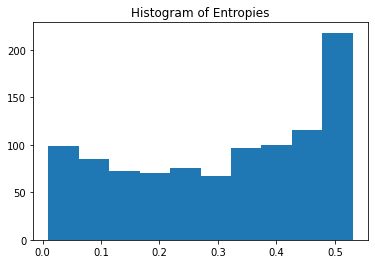

In [332]:
# Game 3
plt.hist(entropies)
plt.title("Histogram of Entropies")
plt.show()

### Game 1 w/ Entropy

In [451]:
parent = os.path.split(os.getcwd())[0]
fpath = os.path.join(parent, "data", "shapeworld", "reference-1000-0.npz")
fpath

'/data/pawanw/calibrate_your_listeners_clip/calibrate_your_listeners/data/shapeworld/reference-1000-0.npz'

In [452]:
batch = np.load(fpath)

In [453]:
imgs, labels, utterances = (
            batch['imgs'], batch['labels'].argmax(-1), batch['langs'])

In [454]:
lis_scores = []
entropies = []

for i in range(len(imgs)):
    states = batch['imgs'][i]

    original_images = []
    images = []
    # plt.figure(figsize=(16, 5))

    for j in range(3):
        image = Image.fromarray(np.uint8(states[j])).convert('RGB')
        # plt.subplot(2, 4, len(images) + 1)
        # plt.imshow(image)
        # plt.xticks([])
        # plt.yticks([])

        original_images.append(image)
        images.append(preprocess(image))

    # plt.tight_layout()
    
    image_input = torch.tensor(np.stack(images)).cuda()

    lang = batch['langs'][i]
    utterance = "This is a " + lang
    utterance_tokens = clip.tokenize(utterance).cuda()

    with torch.no_grad():
        image_features = model.encode_image(image_input).float()
        utterance_features = model.encode_text(utterance_tokens).float()

    image_features /= image_features.norm(dim=-1, keepdim=True)
    utterance_features /= utterance_features.norm(dim=-1, keepdim=True)

    image_probs = (100.0 * utterance_features @ image_features.T).softmax(dim=-1)
    top_probs, top_labels = image_probs.cpu().topk(3, dim=-1)

    lis_scores.append(image_probs[0])
    
    entropy = get_entropy(image_probs[0])
    entropies.append(entropy)
    
    print(i)
    print("top_probs:  ",top_probs)
    print("top_labels: ", top_labels)
    print("image_probs:", image_probs)
    print("entropy:    ", entropy)

0
top_probs:   tensor([[0.9515, 0.0257, 0.0228]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9515, 0.0257, 0.0228]], device='cuda:0')
entropy:     0.12438580904457698
1
top_probs:   tensor([[0.9875, 0.0087, 0.0039]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9875, 0.0087, 0.0039]], device='cuda:0')
entropy:     0.030938071311854148
2
top_probs:   tensor([[0.5378, 0.3227, 0.1395]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5378, 0.3227, 0.1395]], device='cuda:0')
entropy:     0.396408992666446
3
top_probs:   tensor([[0.9905, 0.0053, 0.0043]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9905, 0.0053, 0.0043]], device='cuda:0')
entropy:     0.03358289950928185
4
top_probs:   tensor([[0.6512, 0.2587, 0.0902]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6512, 0.2587, 0.0902]], device='cuda:0')
entropy:     0.31304892892902625
5
top_probs:   tensor([[0.5009, 0.3639, 0.1352]])
top_labels:  tensor([[0, 2, 1]])
image_probs: 

47
top_probs:   tensor([[0.7555, 0.2244, 0.0200]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7555, 0.2244, 0.0200]], device='cuda:0')
entropy:     0.11304931904587884
48
top_probs:   tensor([[0.6376, 0.2464, 0.1160]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6376, 0.1160, 0.2464]], device='cuda:0')
entropy:     0.4979695830126923
49
top_probs:   tensor([[0.7931, 0.1636, 0.0433]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7931, 0.0433, 0.1636]], device='cuda:0')
entropy:     0.42732652528713916
50
top_probs:   tensor([[9.9268e-01, 6.4054e-03, 9.1704e-04]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[9.9268e-01, 6.4054e-03, 9.1704e-04]], device='cuda:0')
entropy:     0.009253578676849374
51
top_probs:   tensor([[0.9527, 0.0360, 0.0113]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9527, 0.0113, 0.0360]], device='cuda:0')
entropy:     0.17275696188536188
52
top_probs:   tensor([[0.8960, 0.0938, 0.0101]])
top_labels:  te

93
top_probs:   tensor([[0.5454, 0.2335, 0.2211]])
top_labels:  tensor([[1, 2, 0]])
image_probs: tensor([[0.2211, 0.5454, 0.2335]], device='cuda:0')
entropy:     0.49002737871631546
94
top_probs:   tensor([[0.5024, 0.2673, 0.2303]])
top_labels:  tensor([[1, 2, 0]])
image_probs: tensor([[0.2303, 0.5024, 0.2673]], device='cuda:0')
entropy:     0.5087929772784067
95
top_probs:   tensor([[0.4359, 0.3295, 0.2345]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.4359, 0.3295, 0.2345]], device='cuda:0')
entropy:     0.49067987741274455
96
top_probs:   tensor([[0.5450, 0.3136, 0.1415]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5450, 0.3136, 0.1415]], device='cuda:0')
entropy:     0.3991290343539208
97
top_probs:   tensor([[0.9755, 0.0203, 0.0042]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9755, 0.0203, 0.0042]], device='cuda:0')
entropy:     0.03287470150644271
98
top_probs:   tensor([[0.5905, 0.2061, 0.2034]])
top_labels:  tensor([[0, 1, 2]])
image_pr

139
top_probs:   tensor([[0.9723, 0.0220, 0.0056]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9723, 0.0220, 0.0056]], device='cuda:0')
entropy:     0.04216774111220318
140
top_probs:   tensor([[0.8974, 0.0671, 0.0356]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.0671, 0.8974, 0.0356]], device='cuda:0')
entropy:     0.17121699093252005
141
top_probs:   tensor([[0.5990, 0.3624, 0.0387]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5990, 0.3624, 0.0387]], device='cuda:0')
entropy:     0.18144536164204544
142
top_probs:   tensor([[0.8293, 0.1030, 0.0677]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8293, 0.1030, 0.0677]], device='cuda:0')
entropy:     0.26290377015251826
143
top_probs:   tensor([[0.5611, 0.2447, 0.1942]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5611, 0.1942, 0.2447]], device='cuda:0')
entropy:     0.49698687821922194
144
top_probs:   tensor([[0.8294, 0.1273, 0.0434]])
top_labels:  tensor([[0, 2, 1]])


184
top_probs:   tensor([[0.9675, 0.0181, 0.0144]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9675, 0.0181, 0.0144]], device='cuda:0')
entropy:     0.08803620884666692
185
top_probs:   tensor([[0.4552, 0.3919, 0.1529]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3919, 0.4552, 0.1529]], device='cuda:0')
entropy:     0.4142648272318559
186
top_probs:   tensor([[0.8967, 0.0749, 0.0284]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8967, 0.0284, 0.0749]], device='cuda:0')
entropy:     0.2799763239609249
187
top_probs:   tensor([[0.5207, 0.4286, 0.0507]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.4286, 0.0507, 0.5207]], device='cuda:0')
entropy:     0.4902483573785805
188
top_probs:   tensor([[0.4619, 0.3372, 0.2009]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4619, 0.2009, 0.3372]], device='cuda:0')
entropy:     0.5288359230897696
189
top_probs:   tensor([[0.6407, 0.2741, 0.0852]])
top_labels:  tensor([[0, 2, 1]])
imag

230
top_probs:   tensor([[0.8259, 0.1117, 0.0623]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.1117, 0.0623, 0.8259]], device='cuda:0')
entropy:     0.2278580852484257
231
top_probs:   tensor([[0.7879, 0.1438, 0.0683]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7879, 0.0683, 0.1438]], device='cuda:0')
entropy:     0.4022923170436705
232
top_probs:   tensor([[0.4961, 0.3894, 0.1145]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3894, 0.4961, 0.1145]], device='cuda:0')
entropy:     0.3580167150601195
233
top_probs:   tensor([[0.4776, 0.3409, 0.1815]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.1815, 0.3409, 0.4776]], device='cuda:0')
entropy:     0.5091751014704611
234
top_probs:   tensor([[0.6635, 0.2338, 0.1027]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6635, 0.1027, 0.2338]], device='cuda:0')
entropy:     0.49017922251625057
235
top_probs:   tensor([[0.4540, 0.4147, 0.1313]])
top_labels:  tensor([[1, 0, 2]])
imag

276
top_probs:   tensor([[0.4918, 0.3785, 0.1297]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3785, 0.1297, 0.4918]], device='cuda:0')
entropy:     0.5035344383587098
277
top_probs:   tensor([[0.6560, 0.3131, 0.0309]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6560, 0.3131, 0.0309]], device='cuda:0')
entropy:     0.1550930731012991
278
top_probs:   tensor([[0.4838, 0.2929, 0.2232]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4838, 0.2232, 0.2929]], device='cuda:0')
entropy:     0.5188877305699099
279
top_probs:   tensor([[0.5059, 0.2601, 0.2340]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.2601, 0.5059, 0.2340]], device='cuda:0')
entropy:     0.49034510802349895
280
top_probs:   tensor([[0.5488, 0.4392, 0.0120]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5488, 0.0120, 0.4392]], device='cuda:0')
entropy:     0.5213650098605288
281
top_probs:   tensor([[0.3579, 0.3573, 0.2849]])
top_labels:  tensor([[0, 2, 1]])
imag

321
top_probs:   tensor([[0.5226, 0.3502, 0.1273]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5226, 0.1273, 0.3502]], device='cuda:0')
entropy:     0.5301148484516753
322
top_probs:   tensor([[0.5779, 0.3715, 0.0506]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5779, 0.3715, 0.0506]], device='cuda:0')
entropy:     0.21789908603739241
323
top_probs:   tensor([[0.6569, 0.2104, 0.1327]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6569, 0.1327, 0.2104]], device='cuda:0')
entropy:     0.4731575520177458
324
top_probs:   tensor([[0.6920, 0.2130, 0.0949]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6920, 0.2130, 0.0949]], device='cuda:0')
entropy:     0.3224661381490371
325
top_probs:   tensor([[0.9805, 0.0164, 0.0031]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9805, 0.0031, 0.0164]], device='cuda:0')
entropy:     0.09718499315020894
326
top_probs:   tensor([[0.9905, 0.0069, 0.0026]])
top_labels:  tensor([[0, 1, 2]])
ima

367
top_probs:   tensor([[0.6663, 0.2568, 0.0768]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.2568, 0.6663, 0.0768]], device='cuda:0')
entropy:     0.28447275113145026
368
top_probs:   tensor([[0.4123, 0.3446, 0.2432]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4123, 0.2432, 0.3446]], device='cuda:0')
entropy:     0.529647730582364
369
top_probs:   tensor([[0.5435, 0.3499, 0.1066]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5435, 0.3499, 0.1066]], device='cuda:0')
entropy:     0.34423073944073007
370
top_probs:   tensor([[0.9127, 0.0704, 0.0169]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.0704, 0.9127, 0.0169]], device='cuda:0')
entropy:     0.09963087578041459
371
top_probs:   tensor([[0.7337, 0.2531, 0.0132]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7337, 0.2531, 0.0132]], device='cuda:0')
entropy:     0.08256636664632161
372
top_probs:   tensor([[0.4224, 0.3885, 0.1891]])
top_labels:  tensor([[1, 0, 2]])
im

413
top_probs:   tensor([[0.7700, 0.2022, 0.0278]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7700, 0.2022, 0.0278]], device='cuda:0')
entropy:     0.1436300635576837
414
top_probs:   tensor([[0.7618, 0.1252, 0.1130]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7618, 0.1252, 0.1130]], device='cuda:0')
entropy:     0.35543415005270973
415
top_probs:   tensor([[0.9846, 0.0107, 0.0046]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9846, 0.0046, 0.0107]], device='cuda:0')
entropy:     0.07028665927671761
416
top_probs:   tensor([[0.5483, 0.3057, 0.1460]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3057, 0.1460, 0.5483]], device='cuda:0')
entropy:     0.47537960834144094
417
top_probs:   tensor([[0.8330, 0.0928, 0.0742]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8330, 0.0928, 0.0742]], device='cuda:0')
entropy:     0.27849044085699415
418
top_probs:   tensor([[0.9875, 0.0064, 0.0061]])
top_labels:  tensor([[0, 1, 2]])
i

459
top_probs:   tensor([[0.5707, 0.3690, 0.0603]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5707, 0.3690, 0.0603]], device='cuda:0')
entropy:     0.24432591472060533
460
top_probs:   tensor([[0.9830, 0.0118, 0.0052]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9830, 0.0118, 0.0052]], device='cuda:0')
entropy:     0.039513577195969755
461
top_probs:   tensor([[0.6741, 0.2481, 0.0778]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6741, 0.2481, 0.0778]], device='cuda:0')
entropy:     0.28669073347640656
462
top_probs:   tensor([[0.4304, 0.3155, 0.2541]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3155, 0.4304, 0.2541]], device='cuda:0')
entropy:     0.5022266195170241
463
top_probs:   tensor([[0.7881, 0.1294, 0.0825]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7881, 0.0825, 0.1294]], device='cuda:0')
entropy:     0.3818145837305381
464
top_probs:   tensor([[0.5650, 0.3425, 0.0924]])
top_labels:  tensor([[0, 1, 2]])
i

505
top_probs:   tensor([[0.6479, 0.1875, 0.1647]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6479, 0.1647, 0.1875]], device='cuda:0')
entropy:     0.45279875208661097
506
top_probs:   tensor([[0.9817, 0.0101, 0.0082]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9817, 0.0082, 0.0101]], device='cuda:0')
entropy:     0.06712555222273398
507
top_probs:   tensor([[0.6379, 0.2772, 0.0849]])
top_labels:  tensor([[1, 2, 0]])
image_probs: tensor([[0.0849, 0.6379, 0.2772]], device='cuda:0')
entropy:     0.5131161350631621
508
top_probs:   tensor([[0.3694, 0.3304, 0.3002]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.3694, 0.3304, 0.3002]], device='cuda:0')
entropy:     0.5211525311477853
509
top_probs:   tensor([[0.6291, 0.3030, 0.0679]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6291, 0.0679, 0.3030]], device='cuda:0')
entropy:     0.5219457325084469
510
top_probs:   tensor([[0.7956, 0.1354, 0.0690]])
top_labels:  tensor([[0, 2, 1]])
ima

551
top_probs:   tensor([[0.5384, 0.4150, 0.0466]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5384, 0.4150, 0.0466]], device='cuda:0')
entropy:     0.20616643349450706
552
top_probs:   tensor([[0.9890, 0.0075, 0.0035]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9890, 0.0075, 0.0035]], device='cuda:0')
entropy:     0.02836120253947701
553
top_probs:   tensor([[0.8252, 0.0949, 0.0799]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8252, 0.0799, 0.0949]], device='cuda:0')
entropy:     0.32246915230885886
554
top_probs:   tensor([[0.9825, 0.0119, 0.0056]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9825, 0.0056, 0.0119]], device='cuda:0')
entropy:     0.07605069343597891
555
top_probs:   tensor([[0.5055, 0.4373, 0.0572]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.4373, 0.0572, 0.5055]], device='cuda:0')
entropy:     0.4975263045583743
556
top_probs:   tensor([[0.4869, 0.4029, 0.1102]])
top_labels:  tensor([[1, 0, 2]])
i

597
top_probs:   tensor([[0.5367, 0.3456, 0.1177]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3456, 0.5367, 0.1177]], device='cuda:0')
entropy:     0.36327686046430185
598
top_probs:   tensor([[0.4296, 0.2903, 0.2800]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4296, 0.2800, 0.2903]], device='cuda:0')
entropy:     0.5180216882592151
599
top_probs:   tensor([[0.5536, 0.2584, 0.1880]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5536, 0.1880, 0.2584]], device='cuda:0')
entropy:     0.5044775168376657
600
top_probs:   tensor([[0.9635, 0.0239, 0.0126]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9635, 0.0239, 0.0126]], device='cuda:0')
entropy:     0.07929048481777709
601
top_probs:   tensor([[0.5597, 0.2652, 0.1751]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5597, 0.2652, 0.1751]], device='cuda:0')
entropy:     0.4401865264562403
602
top_probs:   tensor([[0.6948, 0.1529, 0.1522]])
top_labels:  tensor([[0, 2, 1]])
ima

643
top_probs:   tensor([[0.3700, 0.3464, 0.2836]])
top_labels:  tensor([[2, 1, 0]])
image_probs: tensor([[0.2836, 0.3464, 0.3700]], device='cuda:0')
entropy:     0.5307288210767652
644
top_probs:   tensor([[0.5296, 0.2564, 0.2140]])
top_labels:  tensor([[1, 2, 0]])
image_probs: tensor([[0.2140, 0.5296, 0.2564]], device='cuda:0')
entropy:     0.5034416859296946
645
top_probs:   tensor([[0.8103, 0.1310, 0.0587]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8103, 0.0587, 0.1310]], device='cuda:0')
entropy:     0.3841226749992241
646
top_probs:   tensor([[0.6179, 0.3302, 0.0518]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3302, 0.6179, 0.0518]], device='cuda:0')
entropy:     0.2212966658756286
647
top_probs:   tensor([[0.4673, 0.2726, 0.2601]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.2726, 0.2601, 0.4673]], device='cuda:0')
entropy:     0.5129111786950669
648
top_probs:   tensor([[0.7614, 0.1748, 0.0638]])
top_labels:  tensor([[0, 2, 1]])
image

689
top_probs:   tensor([[0.9816, 0.0106, 0.0077]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9816, 0.0106, 0.0077]], device='cuda:0')
entropy:     0.05424102706978093
690
top_probs:   tensor([[0.6528, 0.2139, 0.1333]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6528, 0.2139, 0.1333]], device='cuda:0')
entropy:     0.38758897926641467
691
top_probs:   tensor([[0.8022, 0.1430, 0.0548]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.8022, 0.0548, 0.1430]], device='cuda:0')
entropy:     0.4012659949242526
692
top_probs:   tensor([[0.8016, 0.1689, 0.0296]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8016, 0.1689, 0.0296]], device='cuda:0')
entropy:     0.15015643666815676
693
top_probs:   tensor([[0.6147, 0.2106, 0.1746]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.6147, 0.1746, 0.2106]], device='cuda:0')
entropy:     0.47334103640065944
694
top_probs:   tensor([[0.8970, 0.0559, 0.0471]])
top_labels:  tensor([[0, 2, 1]])
i

735
top_probs:   tensor([[0.5150, 0.2540, 0.2310]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5150, 0.2540, 0.2310]], device='cuda:0')
entropy:     0.4883374134234595
736
top_probs:   tensor([[0.5241, 0.2435, 0.2324]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5241, 0.2435, 0.2324]], device='cuda:0')
entropy:     0.4893088605781854
737
top_probs:   tensor([[0.9873, 0.0064, 0.0063]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9873, 0.0064, 0.0063]], device='cuda:0')
entropy:     0.04602473889215531
738
top_probs:   tensor([[0.4677, 0.3575, 0.1748]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.4677, 0.1748, 0.3575]], device='cuda:0')
entropy:     0.5305242926675657
739
top_probs:   tensor([[0.9959, 0.0022, 0.0019]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9959, 0.0019, 0.0022]], device='cuda:0')
entropy:     0.019519008664370424
740
top_probs:   tensor([[0.4338, 0.3308, 0.2354]])
top_labels:  tensor([[0, 1, 2]])
im

781
top_probs:   tensor([[0.4326, 0.4063, 0.1611]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.4063, 0.1611, 0.4326]], device='cuda:0')
entropy:     0.5229580371370408
782
top_probs:   tensor([[0.9751, 0.0140, 0.0108]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9751, 0.0108, 0.0140]], device='cuda:0')
entropy:     0.0863868057162516
783
top_probs:   tensor([[0.6891, 0.2250, 0.0859]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.6891, 0.2250, 0.0859]], device='cuda:0')
entropy:     0.3042421790525945
784
top_probs:   tensor([[0.7831, 0.1673, 0.0496]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.1673, 0.7831, 0.0496]], device='cuda:0')
entropy:     0.21505036310241266
785
top_probs:   tensor([[0.5733, 0.2622, 0.1645]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5733, 0.2622, 0.1645]], device='cuda:0')
entropy:     0.4283174866767695
786
top_probs:   tensor([[0.8772, 0.0865, 0.0363]])
top_labels:  tensor([[0, 1, 2]])
imag

827
top_probs:   tensor([[0.7402, 0.1950, 0.0648]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.7402, 0.0648, 0.1950]], device='cuda:0')
entropy:     0.4598626371023063
828
top_probs:   tensor([[0.5859, 0.3812, 0.0328]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.5859, 0.3812, 0.0328]], device='cuda:0')
entropy:     0.1618711694896847
829
top_probs:   tensor([[0.4557, 0.3936, 0.1508]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3936, 0.1508, 0.4557]], device='cuda:0')
entropy:     0.5167079404411175
830
top_probs:   tensor([[0.5468, 0.2793, 0.1739]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.2793, 0.5468, 0.1739]], device='cuda:0')
entropy:     0.4389130193162839
831
top_probs:   tensor([[0.5043, 0.3880, 0.1077]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.5043, 0.1077, 0.3880]], device='cuda:0')
entropy:     0.5299565497031163
832
top_probs:   tensor([[0.9828, 0.0132, 0.0040]])
top_labels:  tensor([[0, 2, 1]])
image

873
top_probs:   tensor([[0.9332, 0.0390, 0.0278]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9332, 0.0390, 0.0278]], device='cuda:0')
entropy:     0.14365314458173964
874
top_probs:   tensor([[0.9327, 0.0580, 0.0093]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9327, 0.0093, 0.0580]], device='cuda:0')
entropy:     0.23816980209217473
875
top_probs:   tensor([[0.8594, 0.0714, 0.0692]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8594, 0.0714, 0.0692]], device='cuda:0')
entropy:     0.2666804933414073
876
top_probs:   tensor([[0.7432, 0.1773, 0.0795]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7432, 0.1773, 0.0795]], device='cuda:0')
entropy:     0.2903114399380846
877
top_probs:   tensor([[0.9863, 0.0086, 0.0051]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9863, 0.0051, 0.0086]], device='cuda:0')
entropy:     0.058966387682647045
878
top_probs:   tensor([[0.4058, 0.3037, 0.2905]])
top_labels:  tensor([[2, 0, 1]])
i

919
top_probs:   tensor([[0.8779, 0.0716, 0.0504]])
top_labels:  tensor([[1, 2, 0]])
image_probs: tensor([[0.0504, 0.8779, 0.0716]], device='cuda:0')
entropy:     0.2724431222980138
920
top_probs:   tensor([[0.7253, 0.1812, 0.0934]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.7253, 0.1812, 0.0934]], device='cuda:0')
entropy:     0.31950439762729743
921
top_probs:   tensor([[0.5483, 0.3294, 0.1223]])
top_labels:  tensor([[1, 0, 2]])
image_probs: tensor([[0.3294, 0.5483, 0.1223]], device='cuda:0')
entropy:     0.37071521759155224
922
top_probs:   tensor([[0.9494, 0.0265, 0.0241]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9494, 0.0265, 0.0241]], device='cuda:0')
entropy:     0.129458738054389
923
top_probs:   tensor([[0.5271, 0.3462, 0.1267]])
top_labels:  tensor([[2, 0, 1]])
image_probs: tensor([[0.3462, 0.1267, 0.5271]], device='cuda:0')
entropy:     0.48698658148130575
924
top_probs:   tensor([[0.7992, 0.1291, 0.0717]])
top_labels:  tensor([[0, 1, 2]])
ima

965
top_probs:   tensor([[0.8493, 0.1099, 0.0408]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8493, 0.1099, 0.0408]], device='cuda:0')
entropy:     0.1882551362839799
966
top_probs:   tensor([[0.9925, 0.0057, 0.0018]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.9925, 0.0057, 0.0018]], device='cuda:0')
entropy:     0.01643825887370464
967
top_probs:   tensor([[0.9546, 0.0255, 0.0199]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[0.9546, 0.0199, 0.0255]], device='cuda:0')
entropy:     0.13493708947262148
968
top_probs:   tensor([[9.8899e-01, 1.0262e-02, 7.4391e-04]])
top_labels:  tensor([[0, 2, 1]])
image_probs: tensor([[9.8899e-01, 7.4391e-04, 1.0262e-02]], device='cuda:0')
entropy:     0.06779853287120852
969
top_probs:   tensor([[0.8787, 0.0607, 0.0606]])
top_labels:  tensor([[0, 1, 2]])
image_probs: tensor([[0.8787, 0.0607, 0.0606]], device='cuda:0')
entropy:     0.24519906968731975
970
top_probs:   tensor([[0.4359, 0.3557, 0.2084]])
top_labels

In [455]:
lis_scores_final = torch.stack(lis_scores)
lis_scores_final

tensor([[0.9515, 0.0257, 0.0228],
        [0.9875, 0.0087, 0.0039],
        [0.5378, 0.3227, 0.1395],
        ...,
        [0.2997, 0.2459, 0.4543],
        [0.7384, 0.0871, 0.1745],
        [0.9412, 0.0461, 0.0126]], device='cuda:0')

In [456]:
labels_final = torch.tensor(labels).to(torch.device('cuda:0'))
labels_final

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [457]:
loss = nn.CrossEntropyLoss()
lis_pred = lis_scores_final.argmax(1)
losses = loss(lis_scores_final, labels_final)

print(losses)

tensor(0.8353, device='cuda:0')


In [458]:
print(lis_pred)

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
        0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 1, 2,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 0,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 0, 0, 0, 2, 2, 0, 0, 0, 2, 2, 0,
        1, 0, 2, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 2, 2, 0, 0, 1, 0, 0, 2, 1, 0, 0, 1, 0,
        0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0,

In [459]:
# ACCURACY
(lis_pred == labels_final).float().mean()

tensor(0.7760, device='cuda:0')

In [460]:
entropies

[0.12438580904457698,
 0.030938071311854148,
 0.396408992666446,
 0.03358289950928185,
 0.31304892892902625,
 0.5307059419349242,
 0.5177364451406334,
 0.27961404263511924,
 0.09663194040665692,
 0.25601200103824895,
 0.018492665611605497,
 0.04927471535817612,
 0.08419210006263865,
 0.40260419216049875,
 0.3290150532234579,
 0.06822615713734238,
 0.020489200525944717,
 0.3667699443155048,
 0.3377467956691423,
 0.1984720692396371,
 0.023963035511212812,
 0.11916424511243483,
 0.0825034437592811,
 0.5250210584512489,
 0.34236547429829234,
 0.4388464683326168,
 0.013932304637715625,
 0.21197711538336686,
 0.45243197734457524,
 0.023208806718721983,
 0.32198766657323846,
 0.13298599813546721,
 0.41634788234718145,
 0.04913700808520983,
 0.24606854691652405,
 0.3163533631929155,
 0.524019875041133,
 0.38419347925394587,
 0.31869729520485934,
 0.03239948633175081,
 0.5081078419784473,
 0.5170218345239077,
 0.24218123925687354,
 0.3742738033315101,
 0.37194711301623157,
 0.2948485700572971,


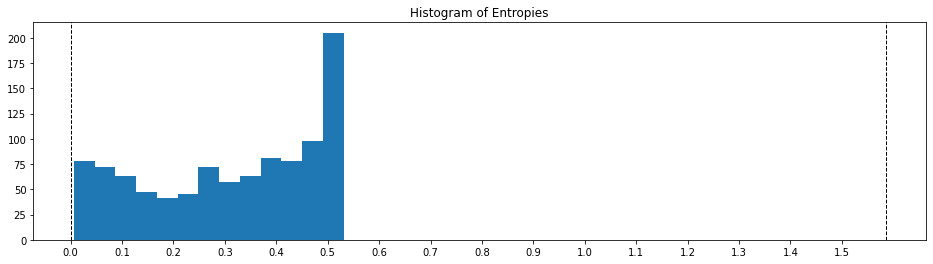

In [372]:
# Game 1
f = plt.figure()
f.set_figwidth(16)
plt.hist(entropies, bins = 13)
plt.title("Histogram of Entropies")
min_entropy = 0 # lowest uncertainty (highest certainty)
max_entropy = - 3 * (1/3) * np.log2(1/3) # highest uncertainty, random, uniform distribution
plt.axvline(max_entropy, color='k', linestyle='dashed', linewidth=1)
plt.axvline(min_entropy, color='k', linestyle='dashed', linewidth=1)
plt.xticks(np.arange(0.0, 1.6, 0.1))
fpath = os.path.join(os.getcwd(), "game1_entropy_histogram.png")
plt.savefig(fname=fpath, dpi=300)
plt.show()

### Game 1: Analysis of Failures

In [461]:
parent = os.path.split(os.getcwd())[0]
fpath = os.path.join(parent, "data", "shapeworld", "reference-1000-0.npz")

batch = np.load(fpath)

imgs, labels, utterances = (batch['imgs'], batch['labels'].argmax(-1), batch['langs'])

In [462]:
fail_index_list = [index for index, value in enumerate(lis_pred) if value != 0]
fail_index_list

[9,
 13,
 18,
 35,
 57,
 65,
 68,
 74,
 79,
 81,
 87,
 92,
 93,
 94,
 100,
 102,
 104,
 106,
 107,
 110,
 117,
 126,
 130,
 131,
 135,
 136,
 140,
 150,
 152,
 163,
 166,
 167,
 173,
 178,
 185,
 187,
 193,
 194,
 202,
 204,
 208,
 209,
 213,
 214,
 216,
 218,
 220,
 223,
 229,
 230,
 232,
 233,
 235,
 247,
 248,
 249,
 254,
 270,
 275,
 276,
 279,
 282,
 283,
 286,
 289,
 294,
 301,
 307,
 309,
 332,
 335,
 338,
 347,
 350,
 360,
 365,
 366,
 367,
 370,
 372,
 377,
 378,
 381,
 382,
 386,
 398,
 400,
 404,
 406,
 408,
 416,
 427,
 440,
 441,
 442,
 448,
 453,
 456,
 458,
 462,
 481,
 493,
 498,
 503,
 504,
 507,
 511,
 515,
 516,
 519,
 522,
 526,
 532,
 539,
 550,
 555,
 556,
 565,
 568,
 570,
 576,
 581,
 591,
 597,
 603,
 605,
 611,
 613,
 615,
 616,
 620,
 623,
 630,
 632,
 633,
 636,
 643,
 644,
 646,
 647,
 651,
 655,
 667,
 670,
 685,
 686,
 698,
 700,
 702,
 707,
 709,
 710,
 714,
 715,
 717,
 718,
 719,
 726,
 729,
 731,
 744,
 746,
 749,
 750,
 751,
 752,
 769,
 781,
 784,
 

/tmp/ipykernel_168971/254679980.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(16, 5))


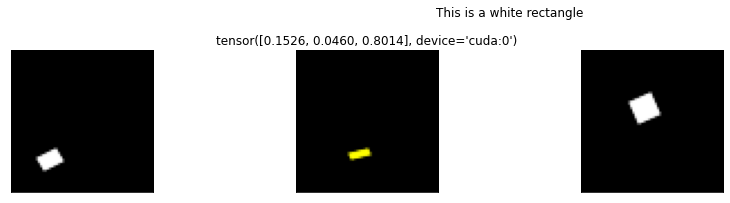

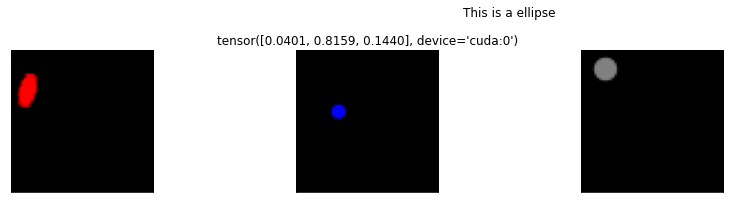

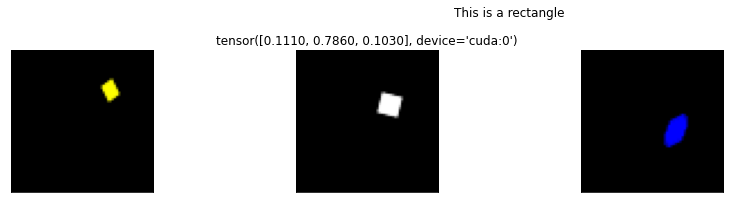

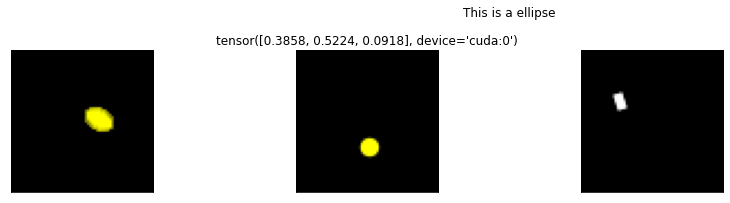

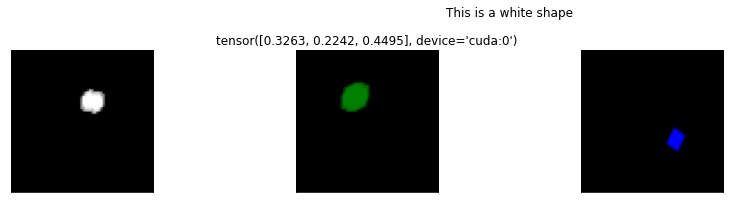

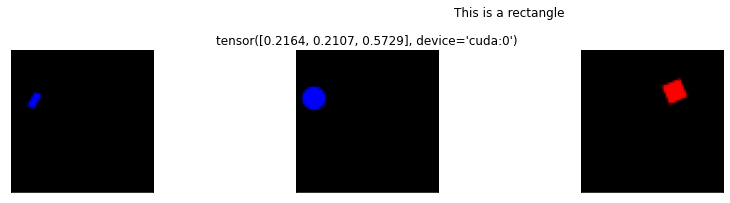

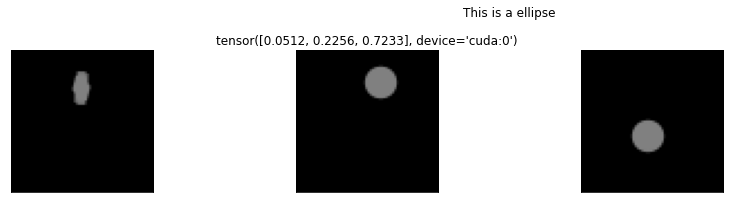

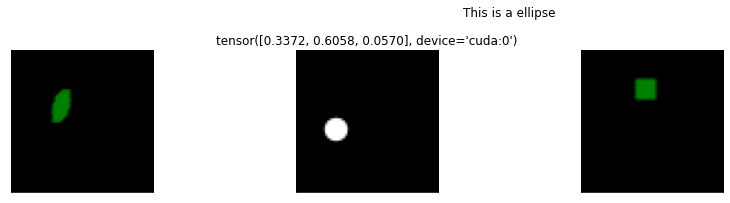

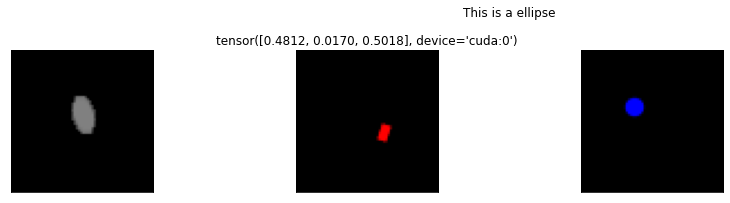

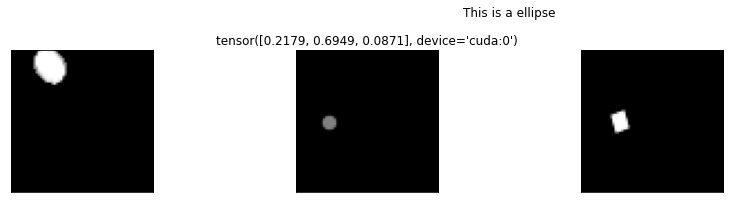

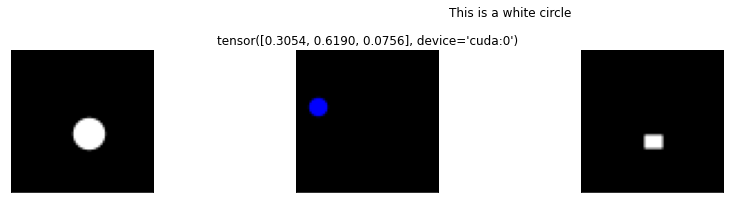

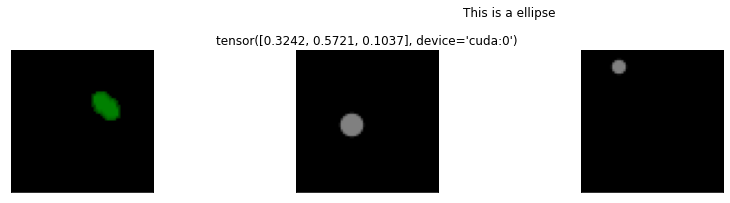

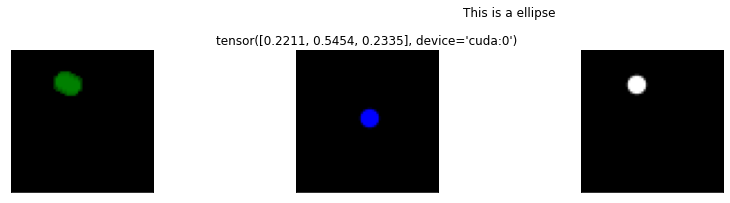

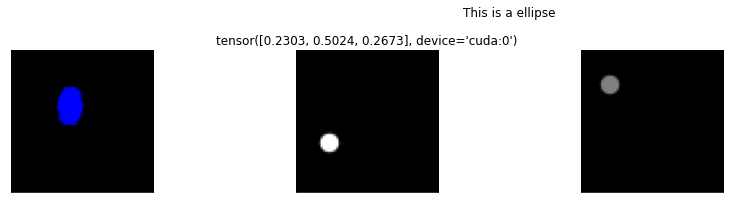

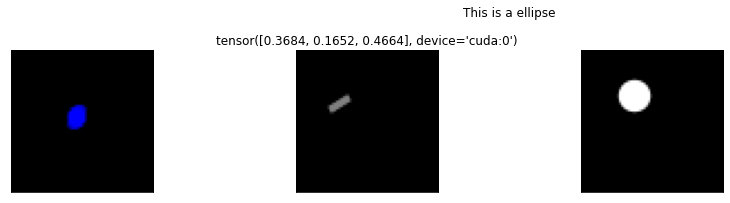

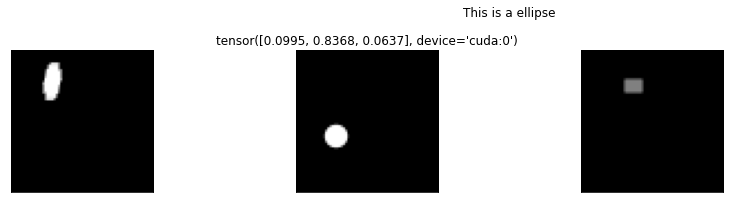

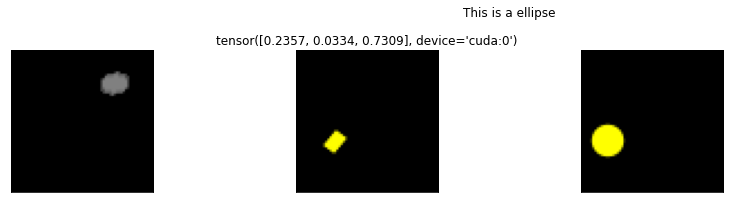

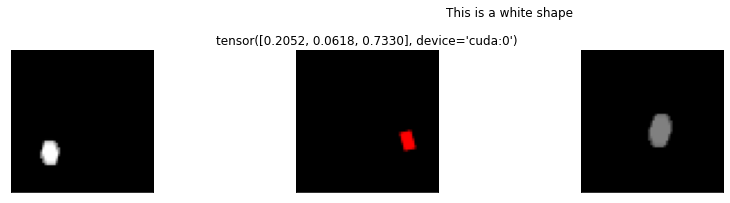

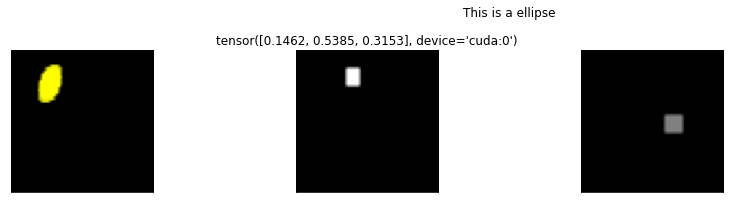

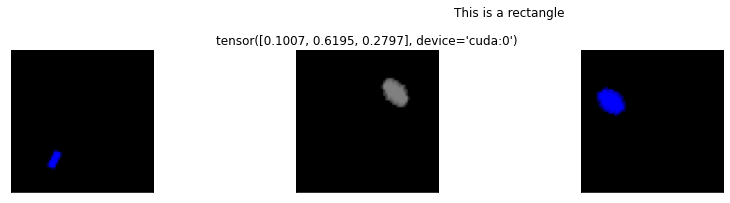

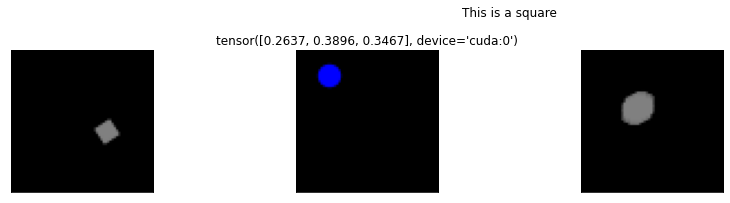

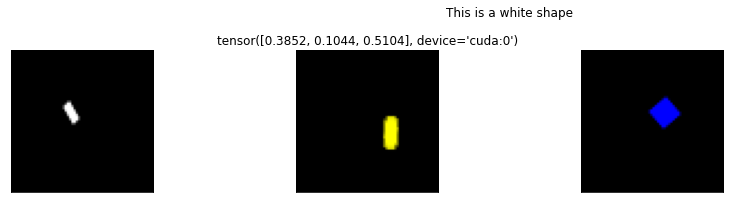

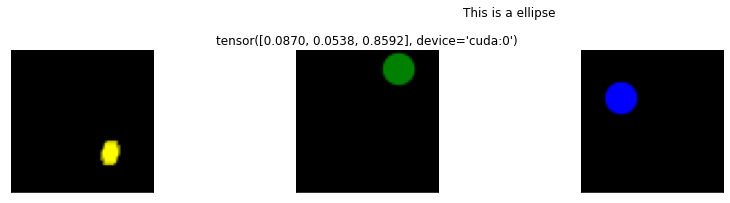

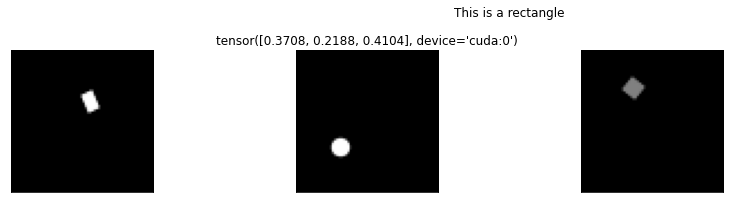

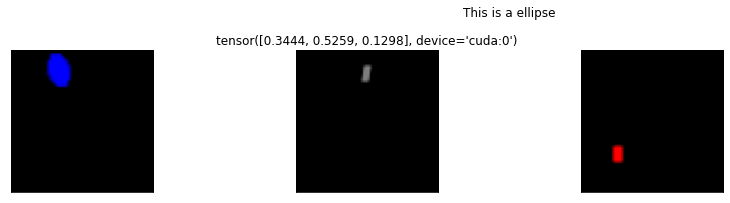

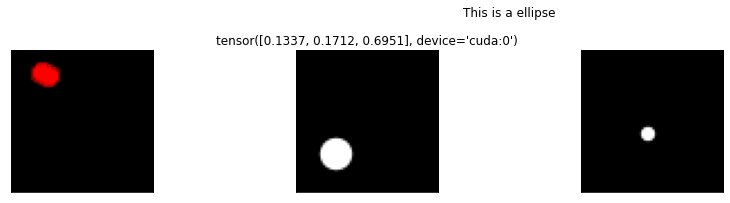

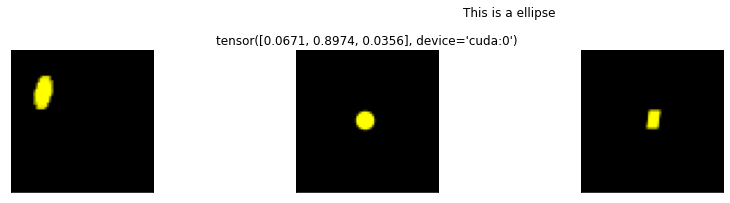

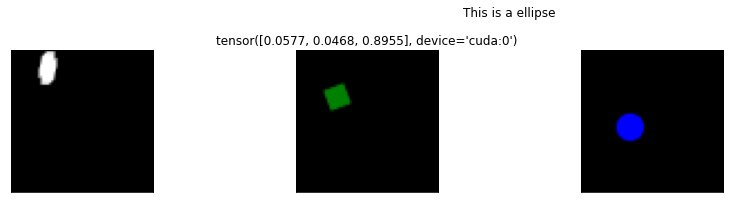

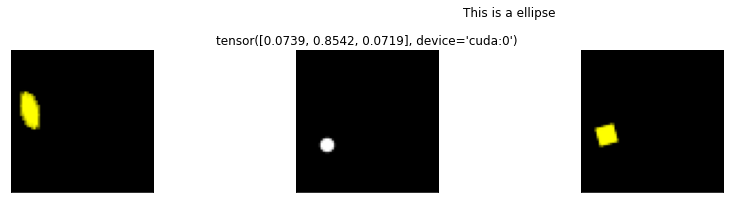

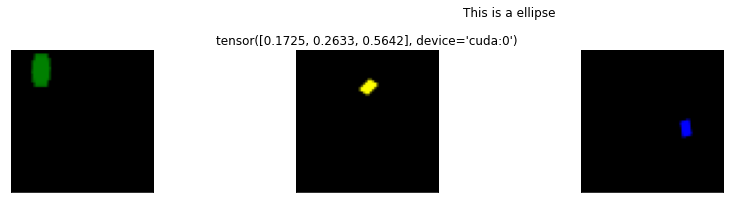

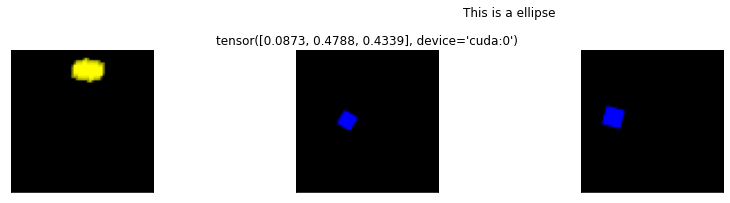

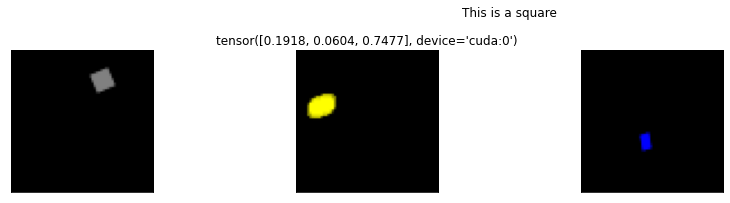

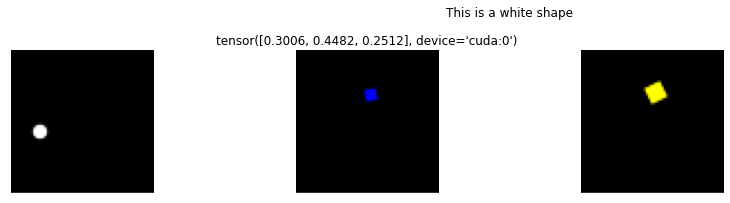

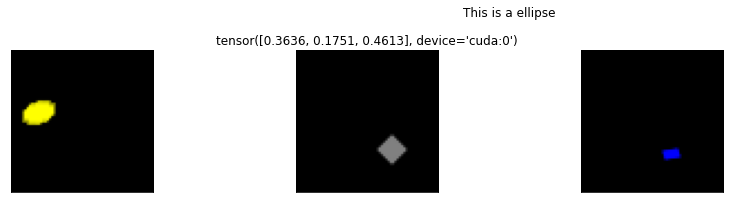

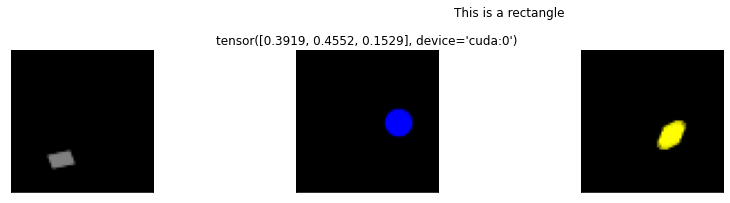

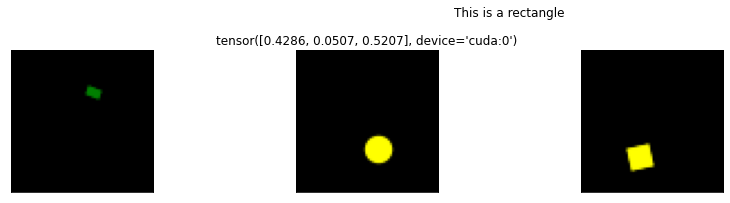

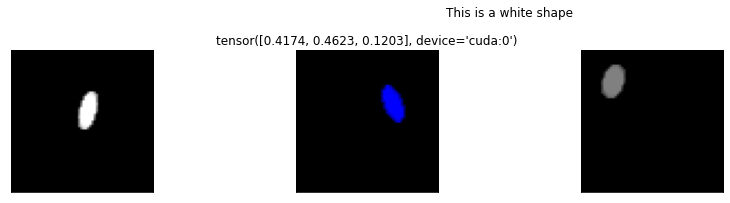

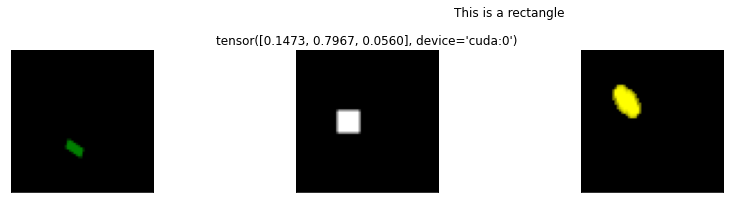

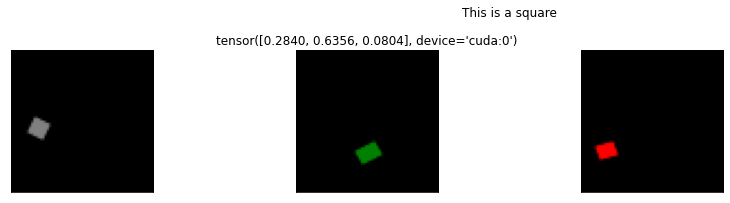

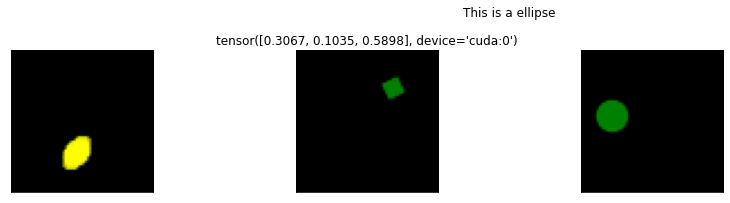

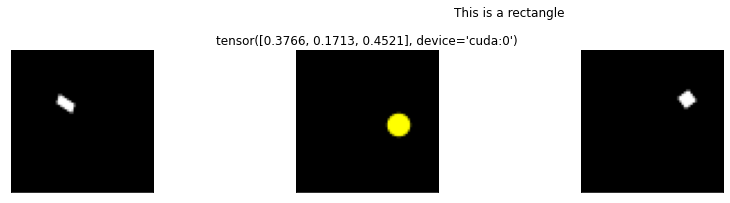

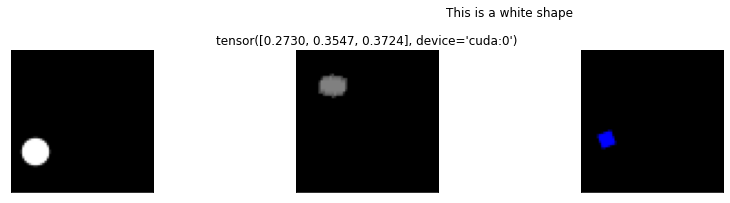

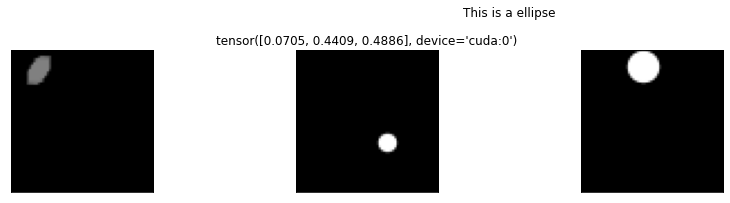

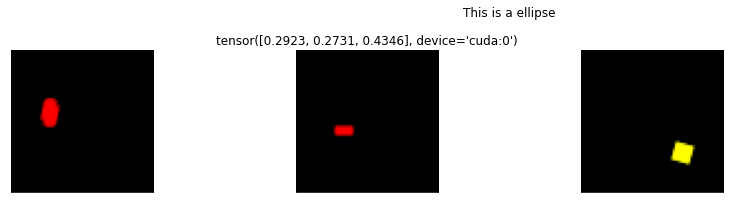

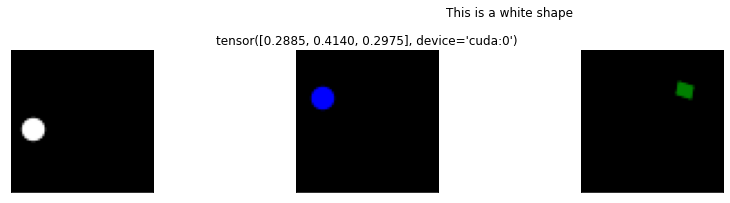

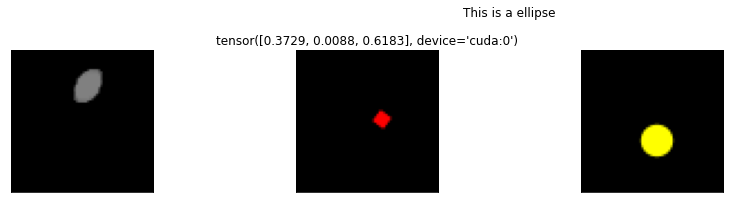

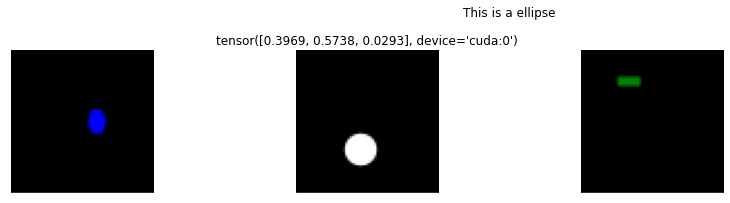

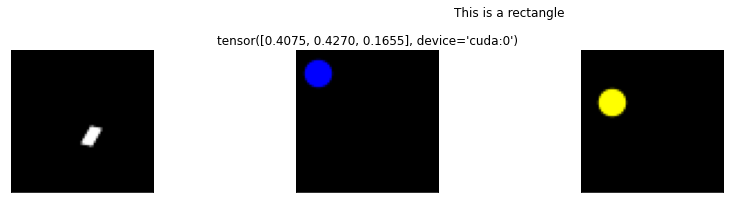

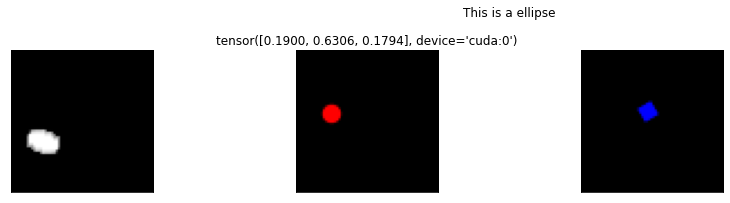

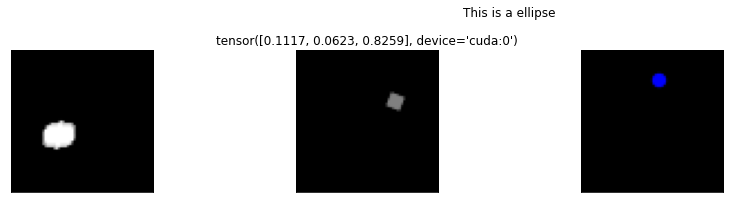

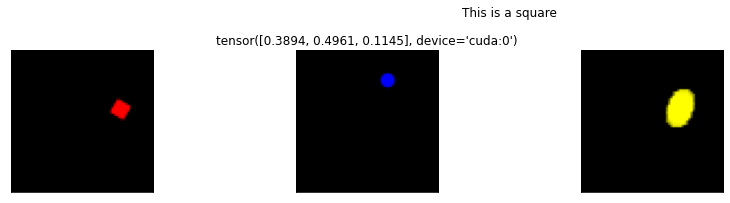

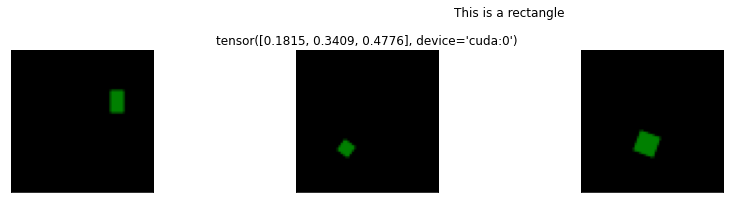

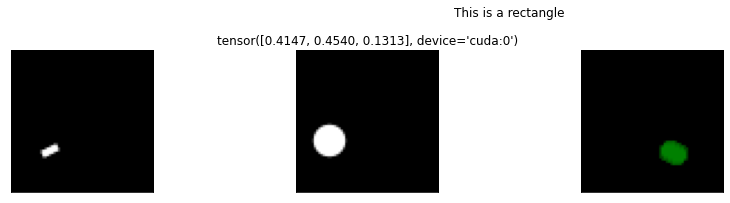

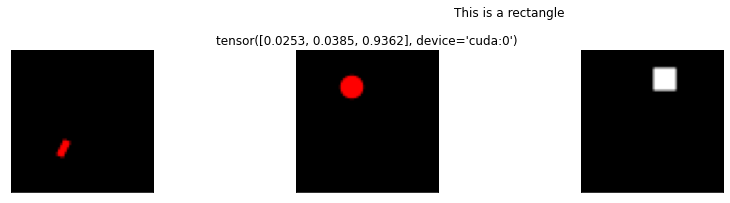

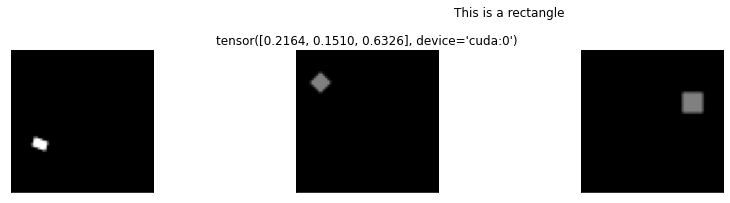

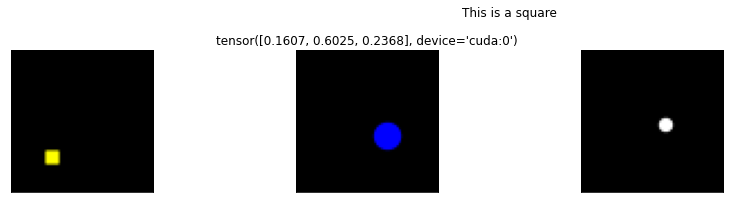

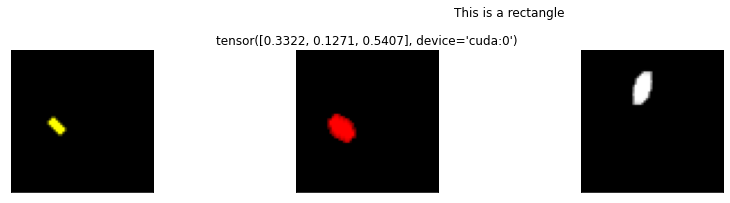

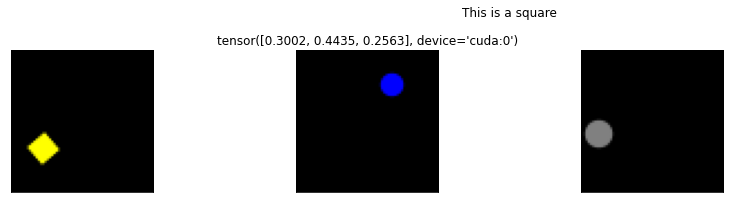

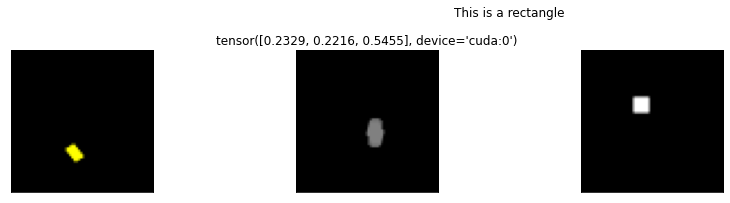

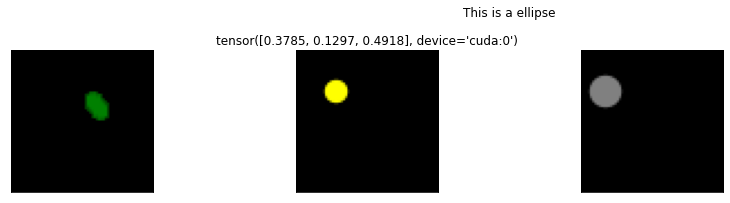

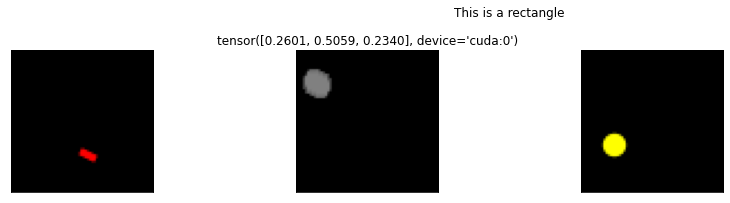

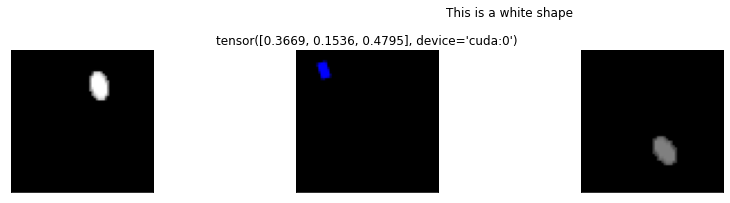

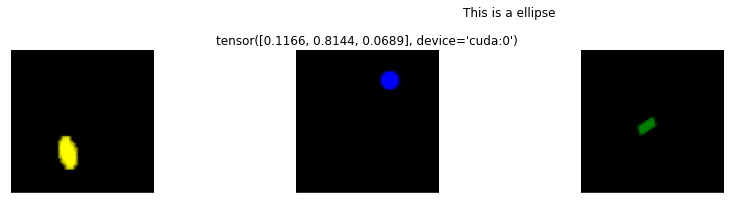

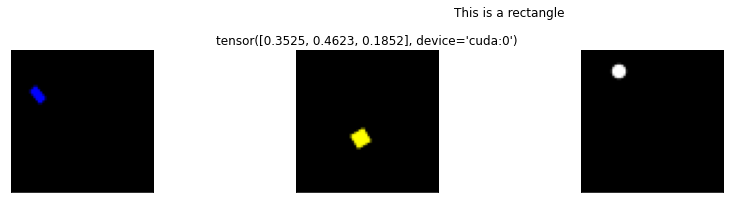

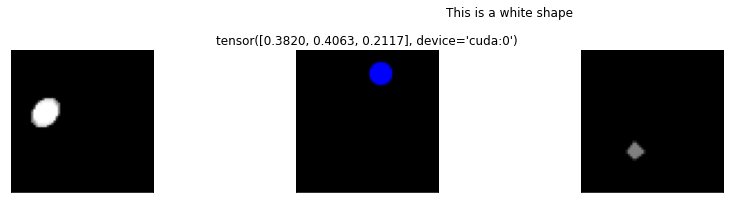

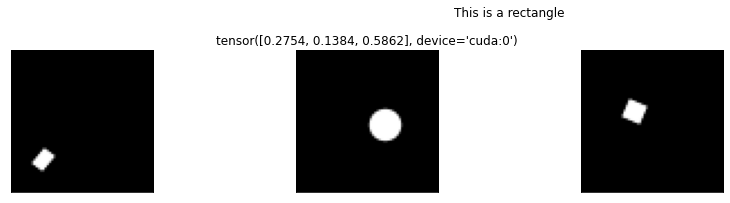

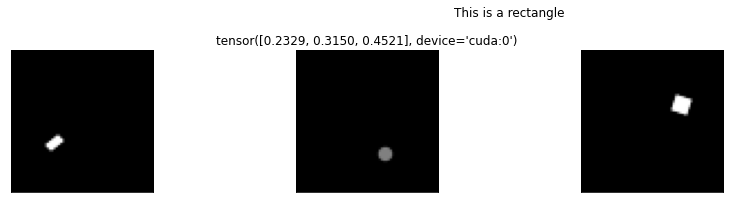

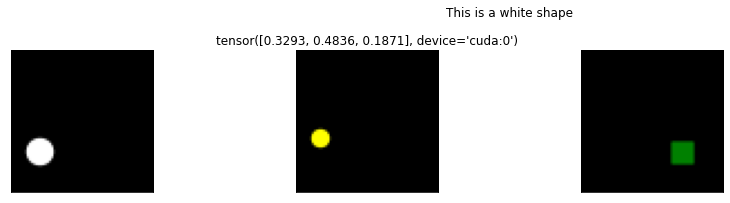

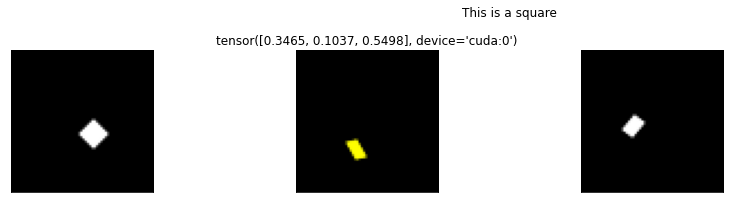

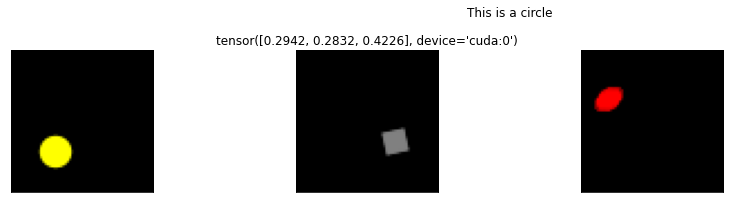

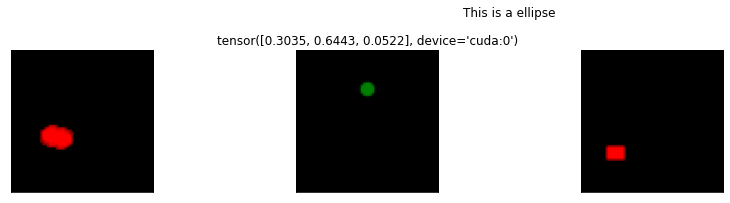

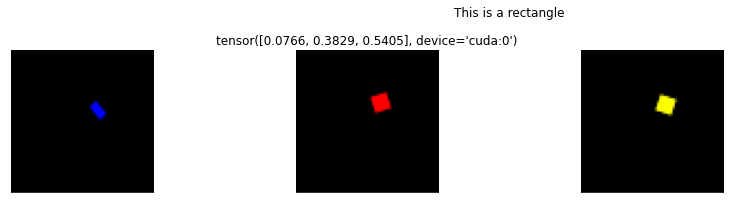

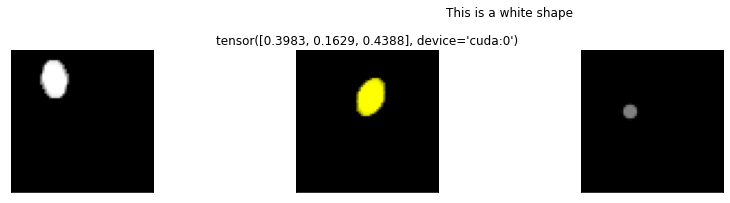

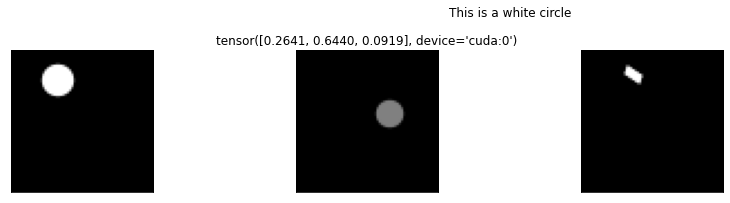

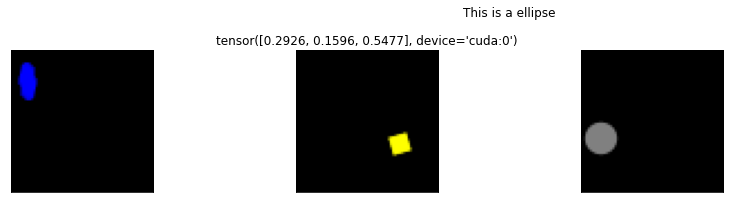

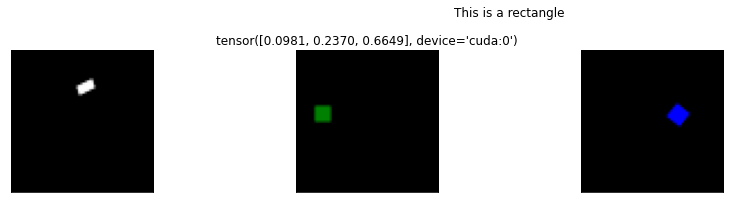

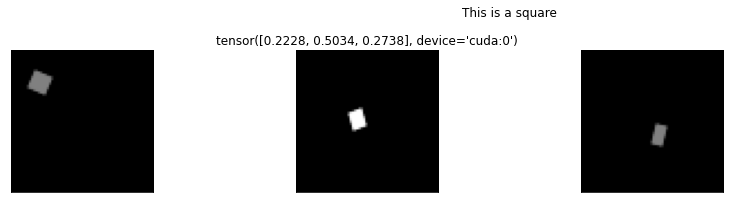

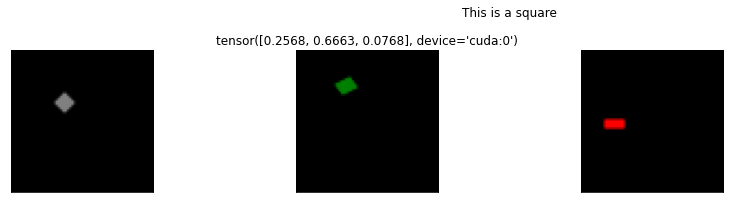

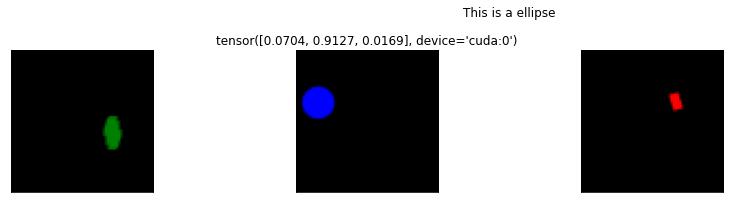

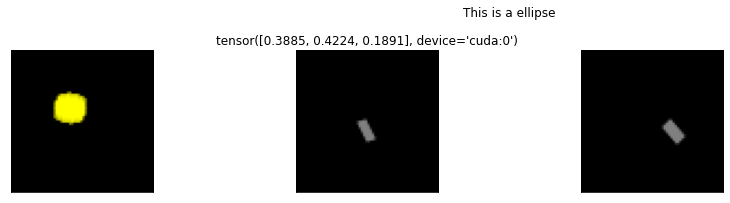

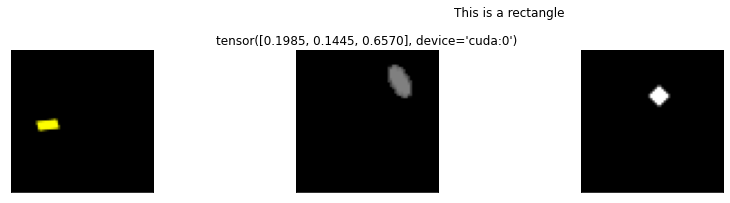

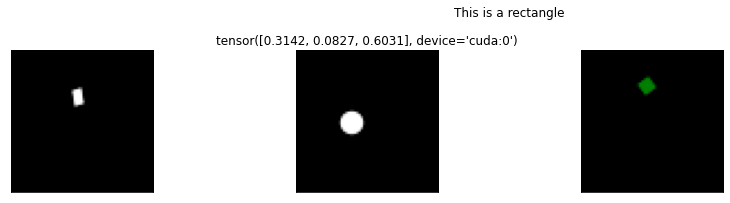

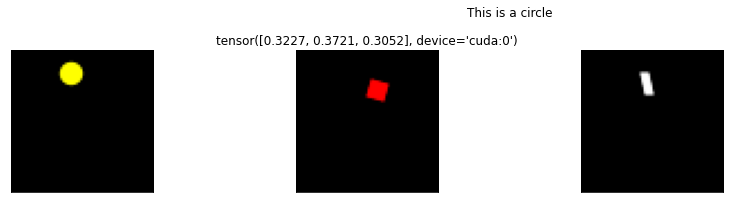

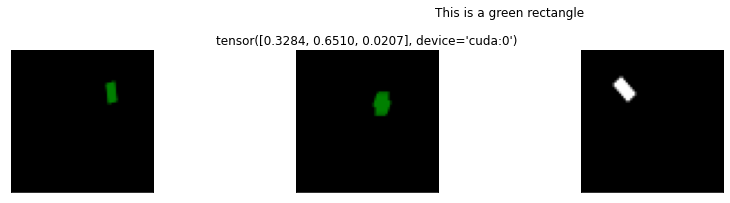

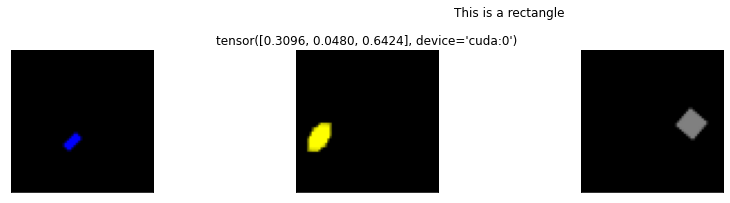

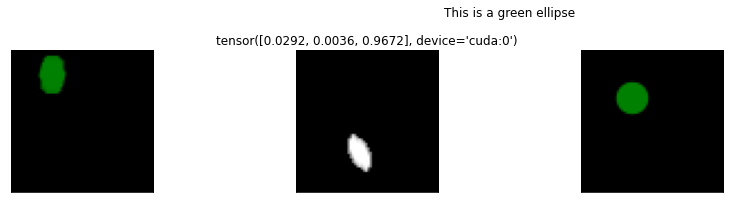

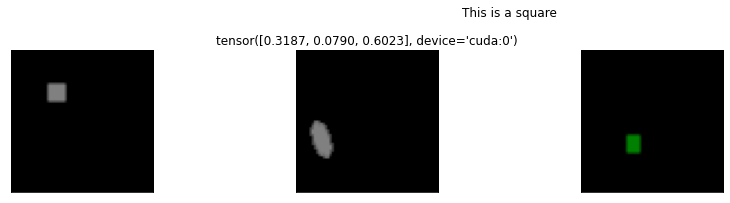

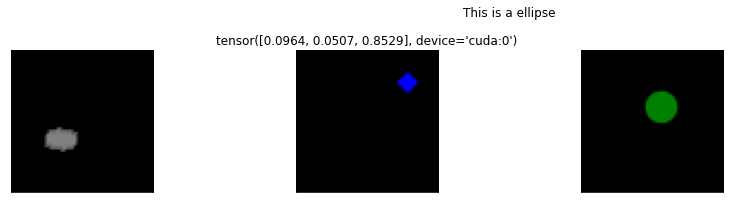

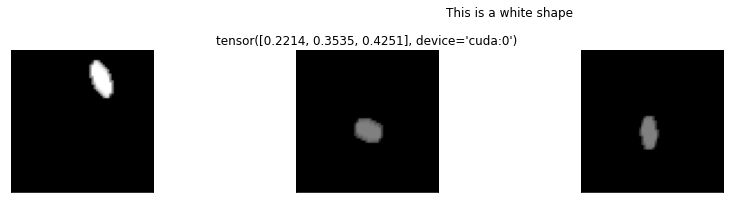

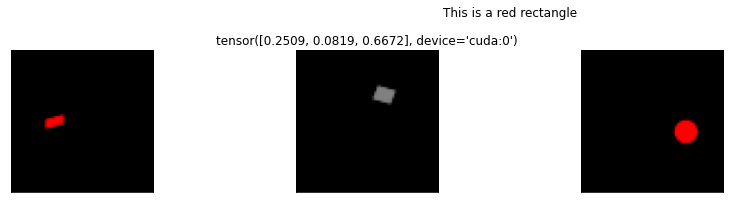

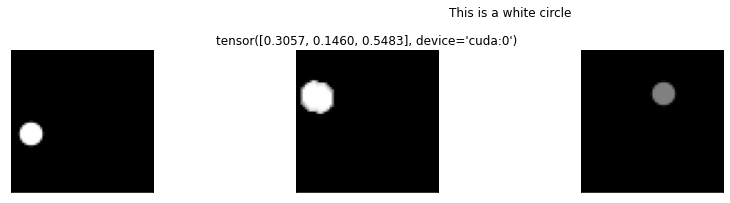

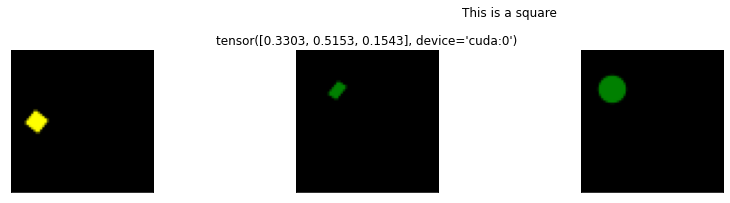

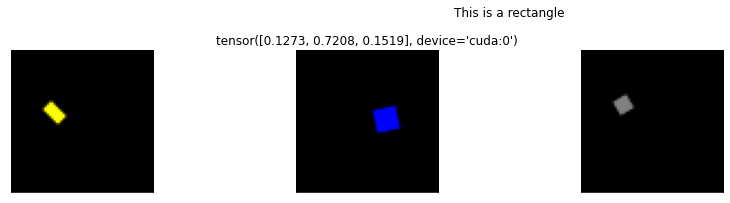

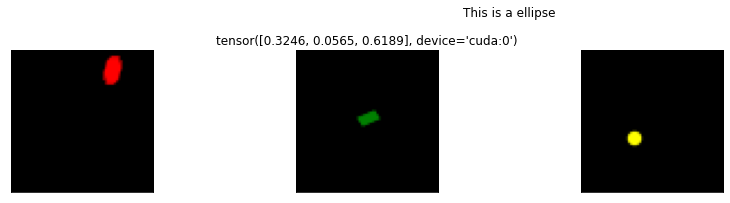

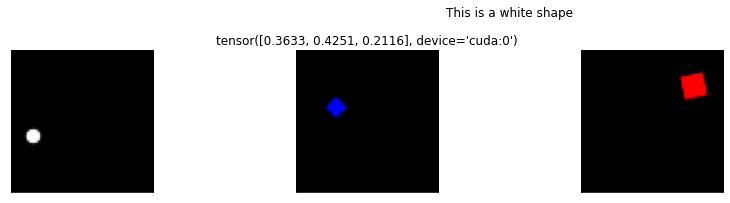

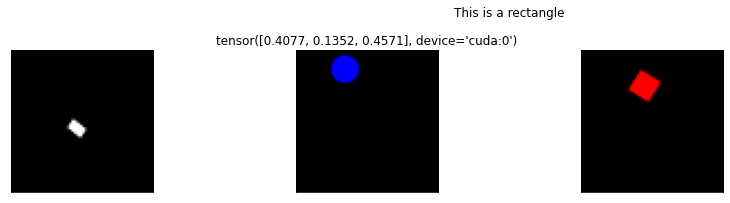

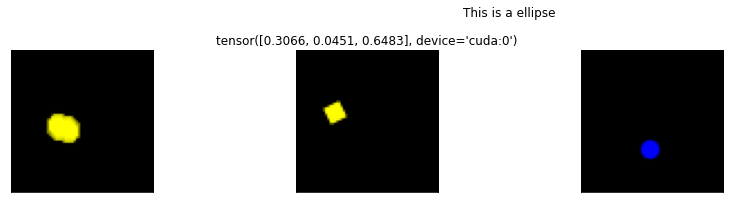

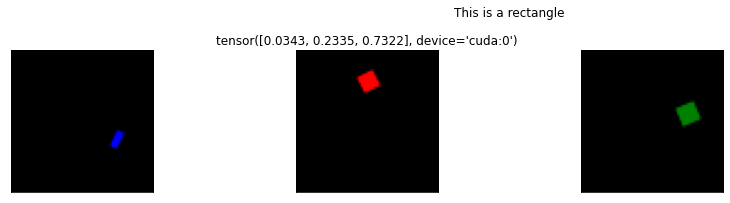

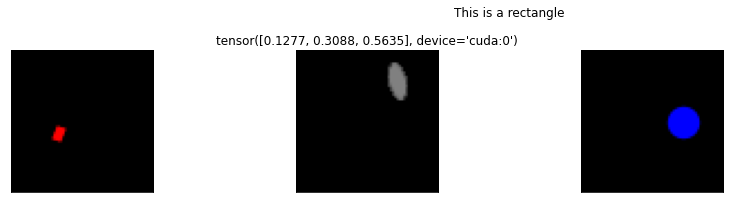

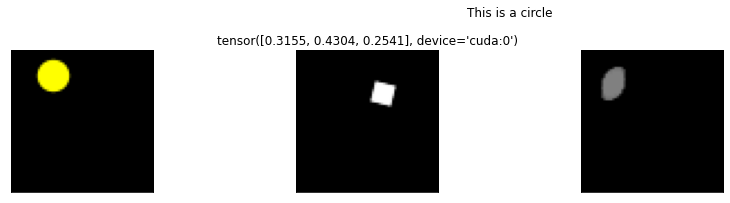

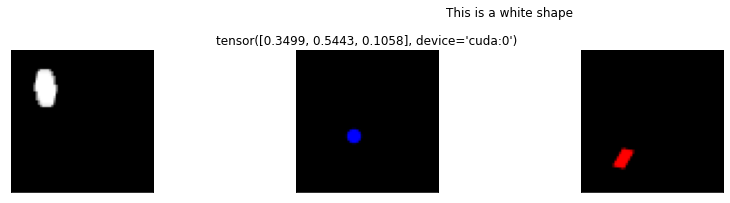

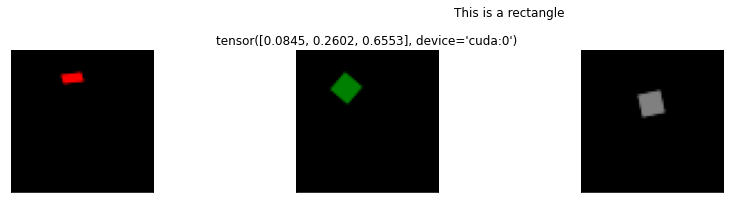

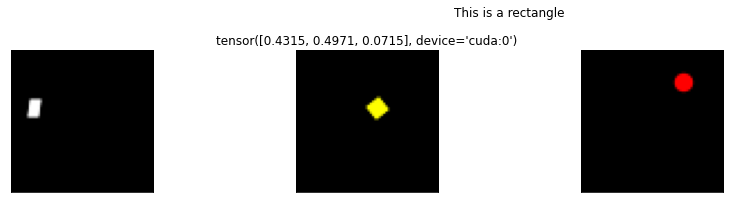

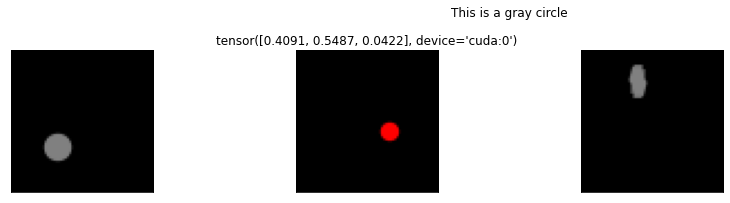

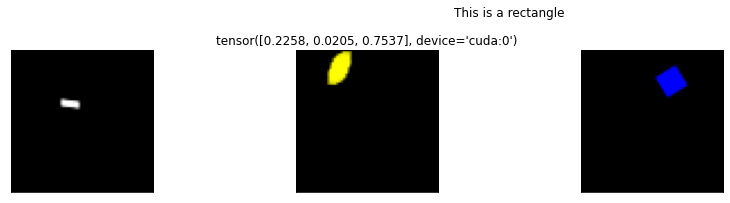

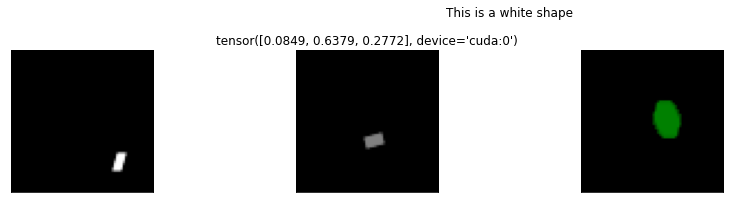

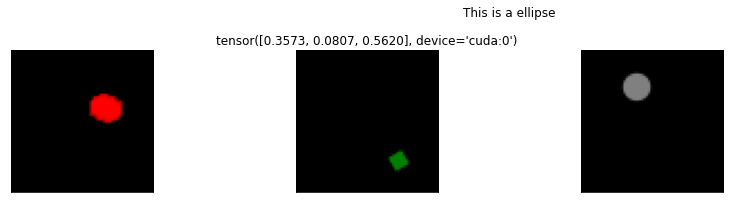

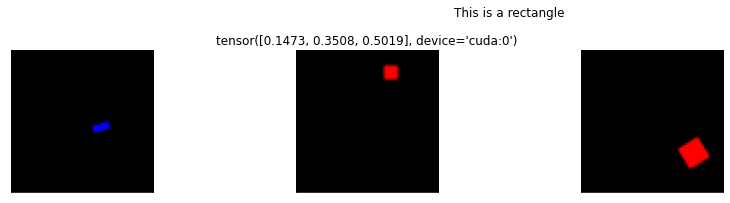

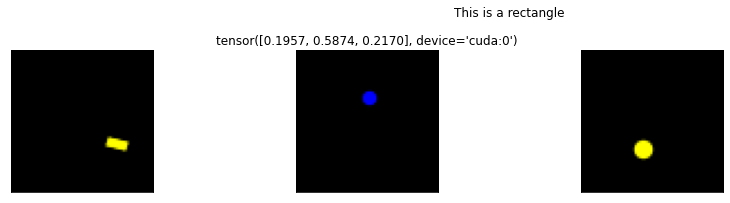

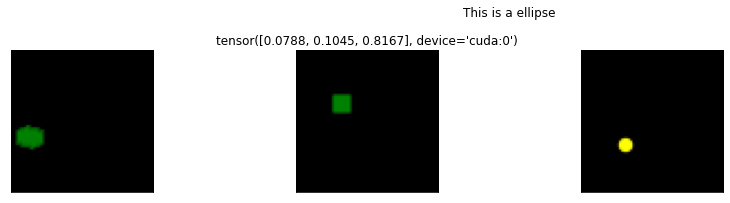

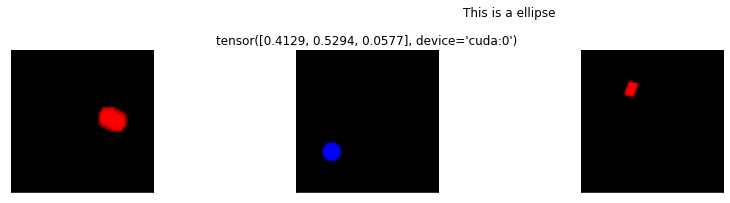

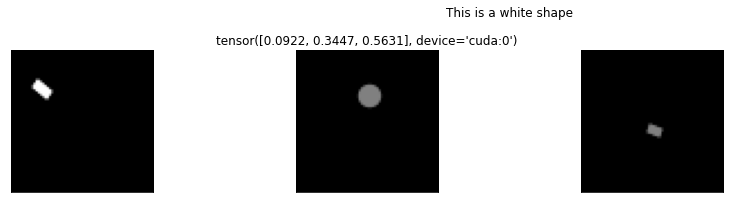

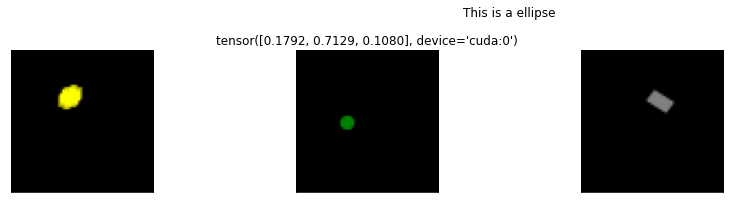

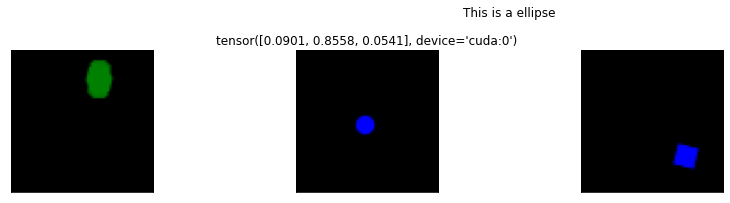

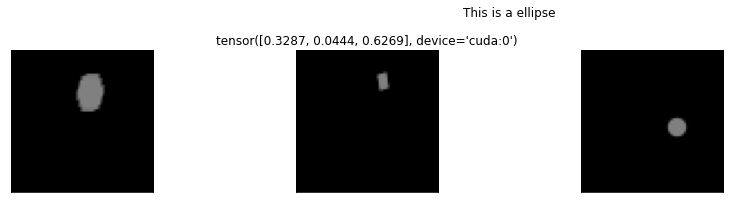

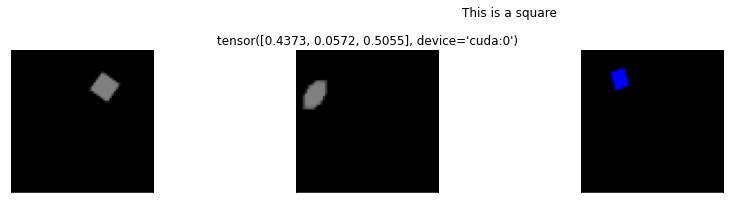

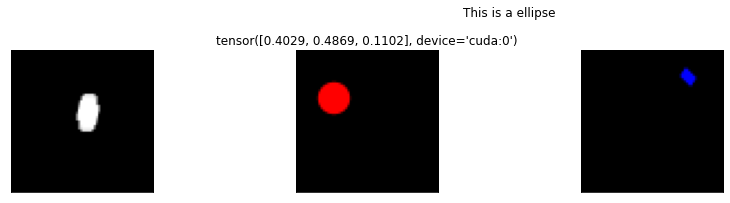

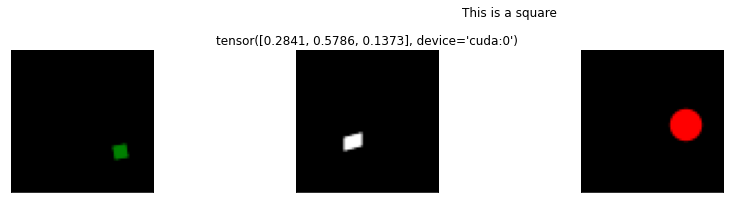

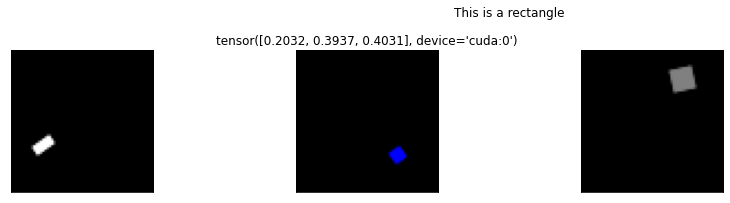

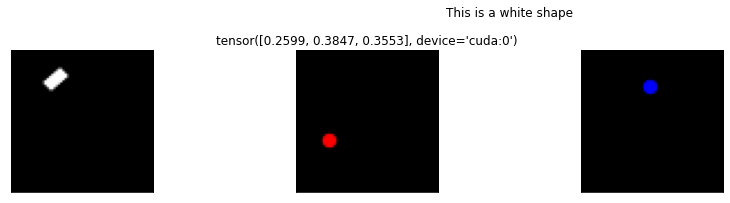

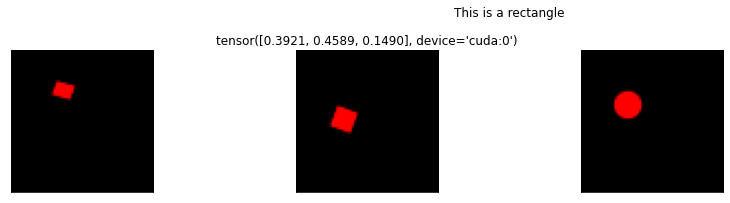

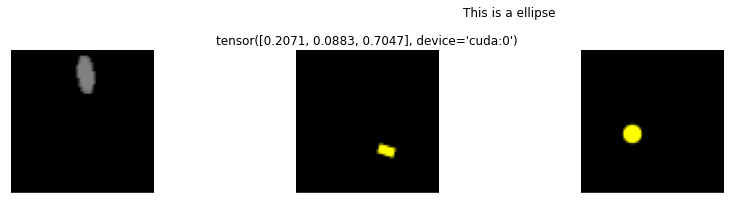

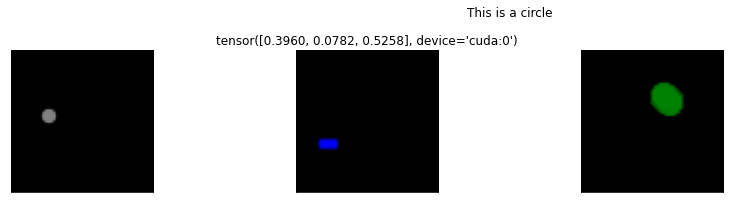

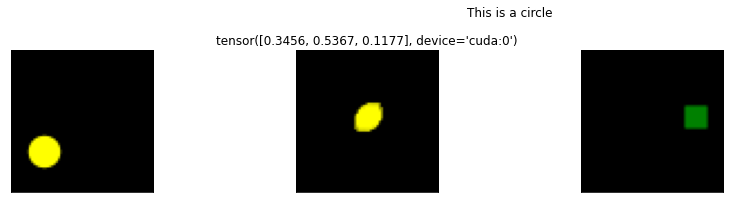

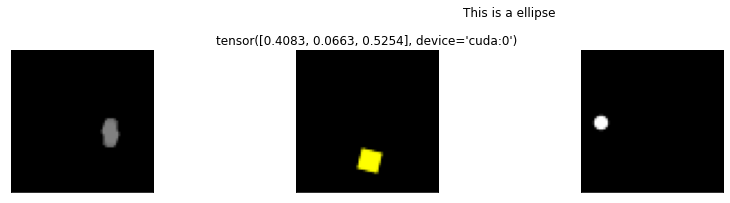

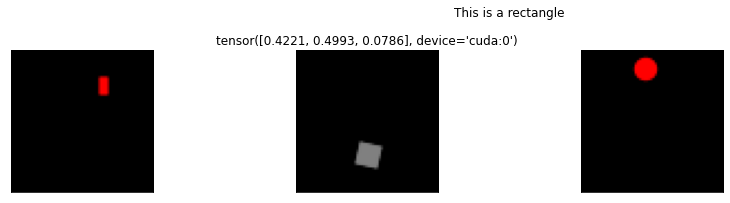

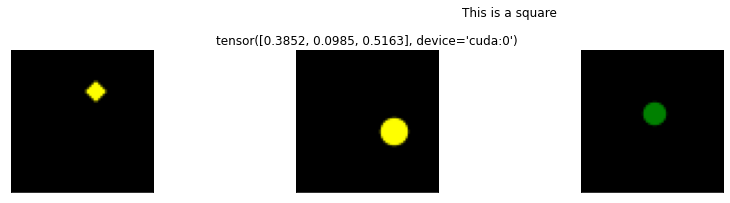

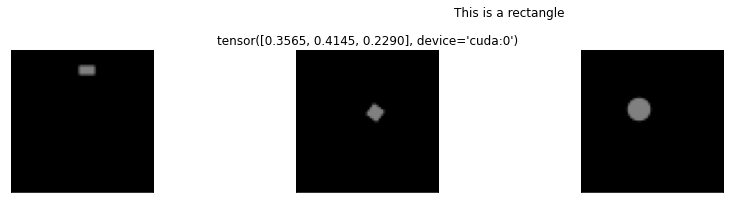

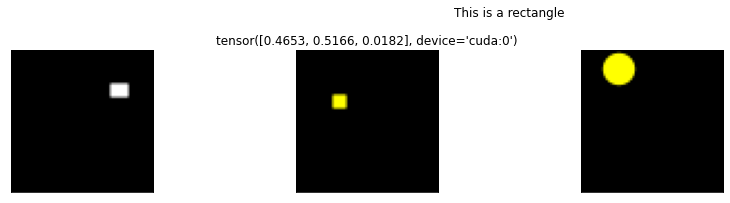

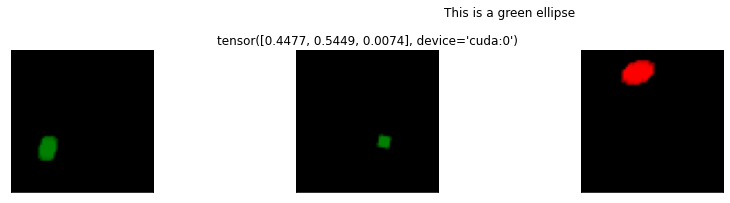

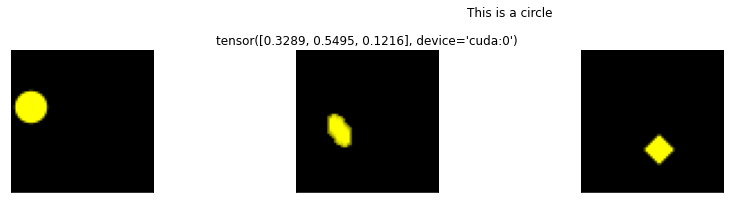

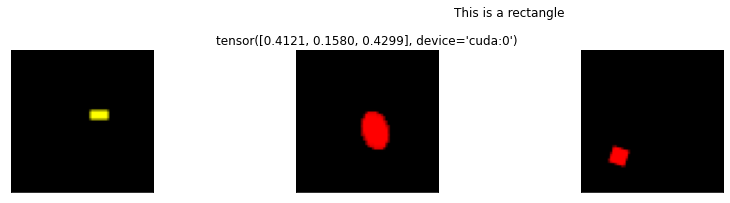

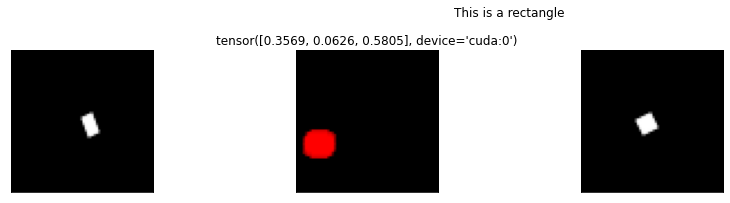

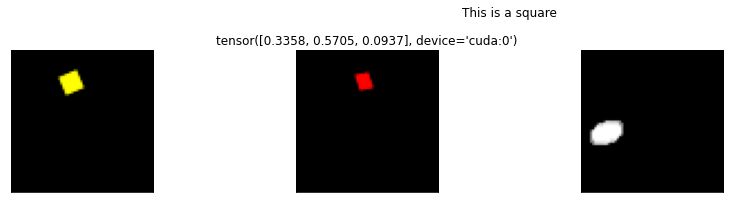

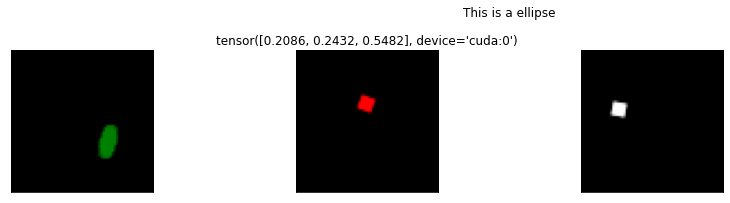

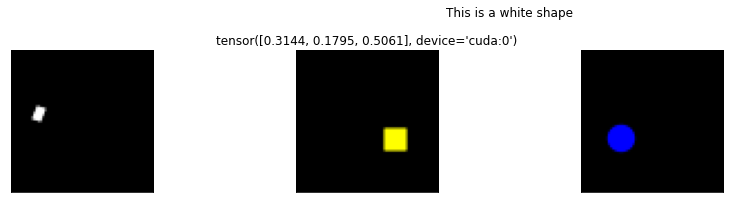

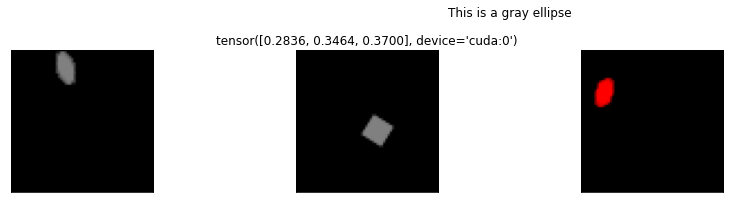

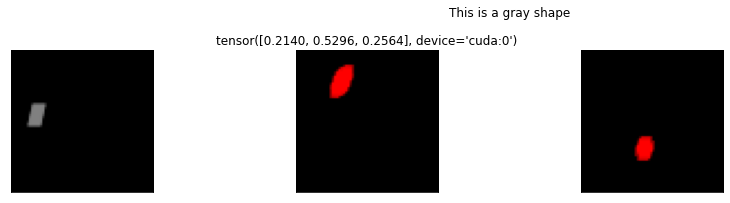

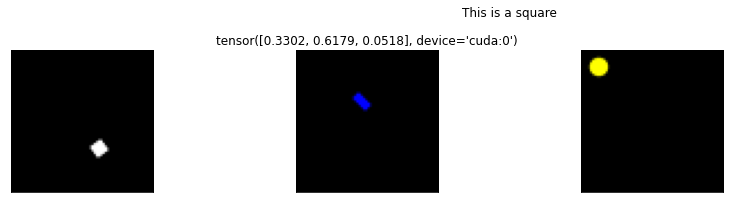

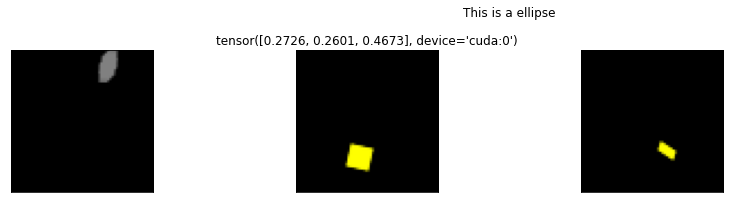

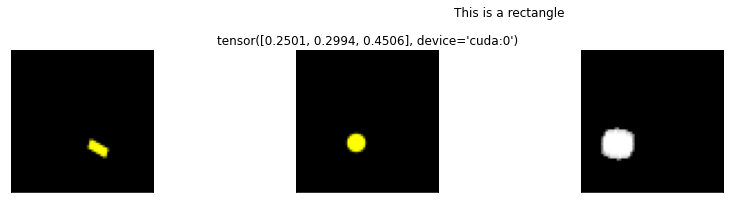

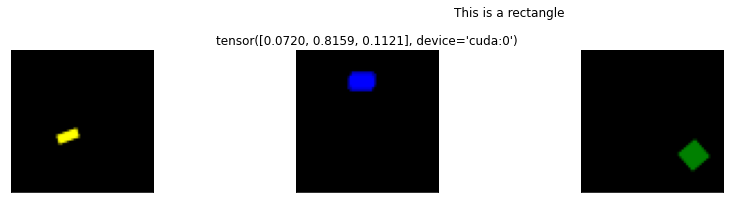

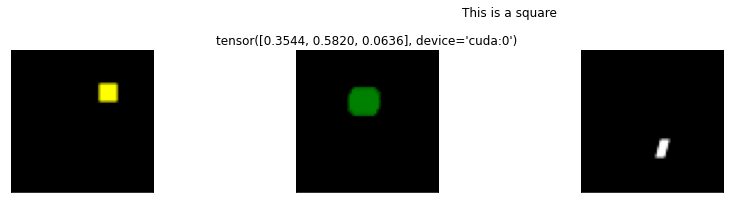

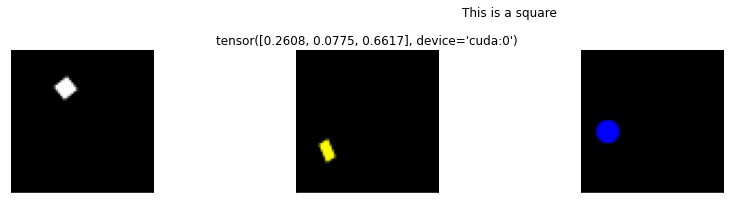

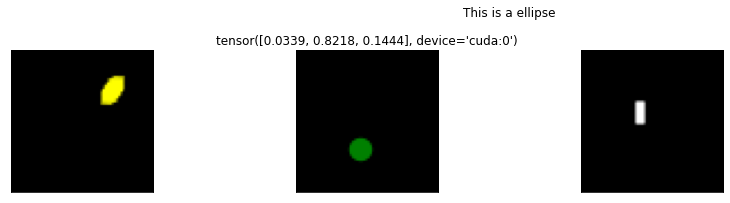

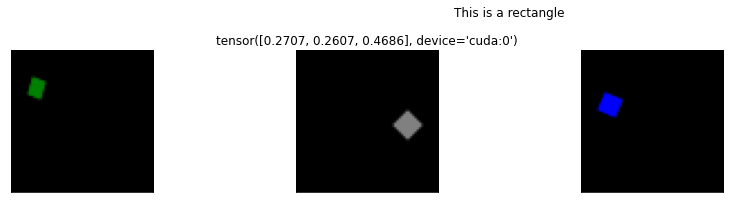

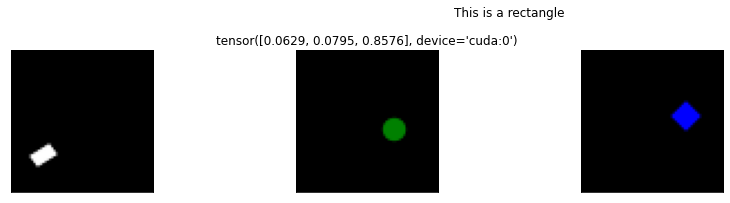

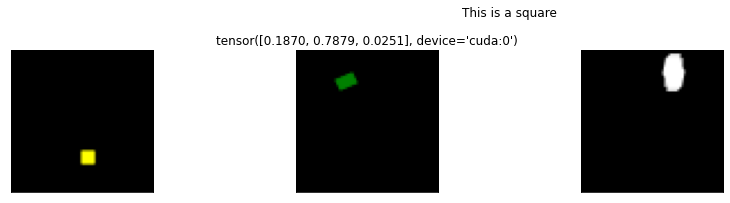

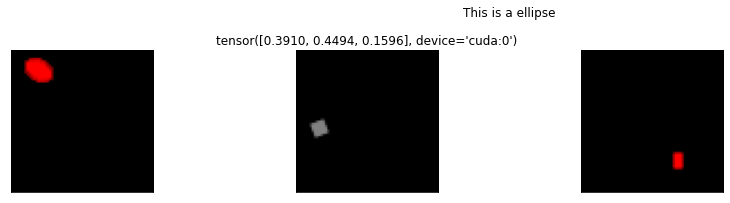

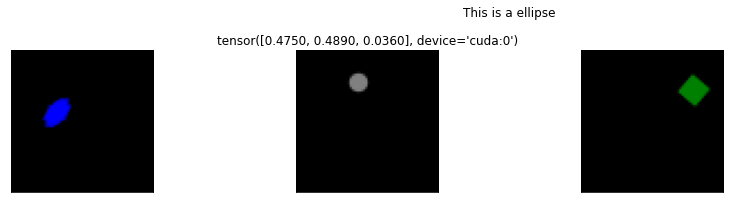

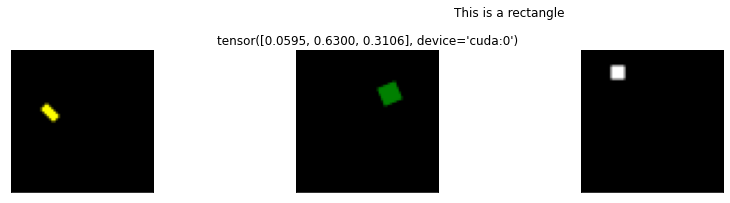

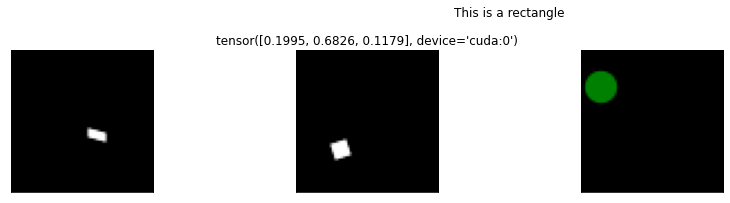

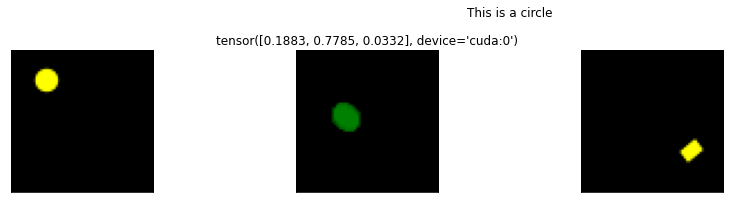

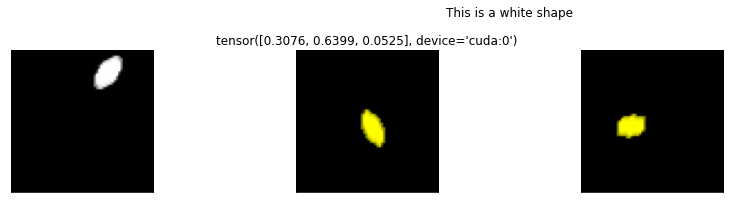

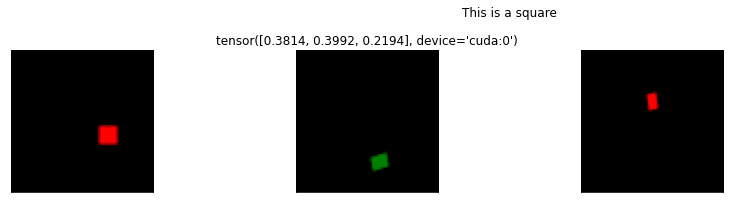

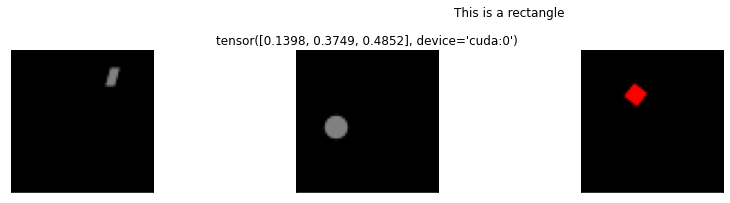

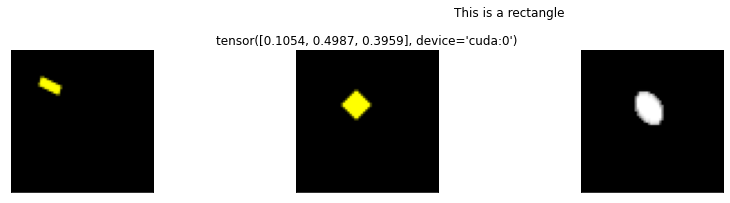

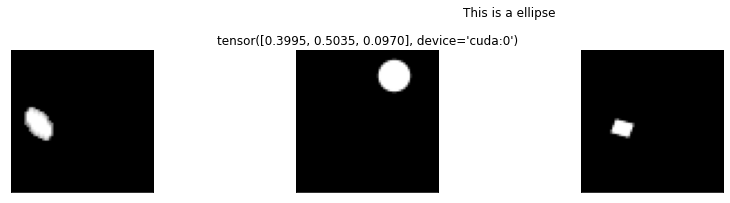

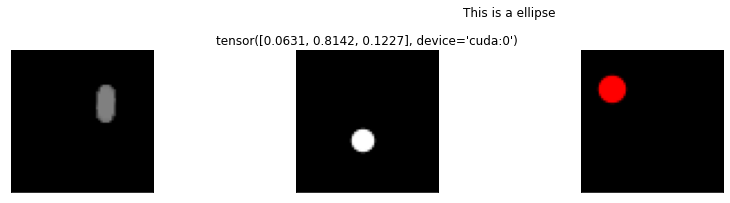

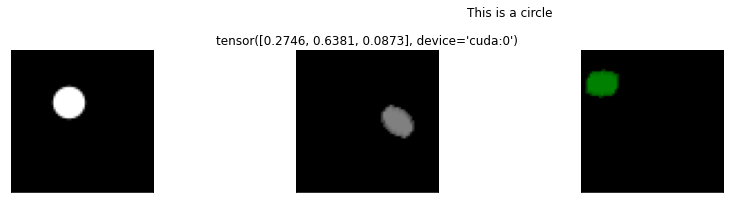

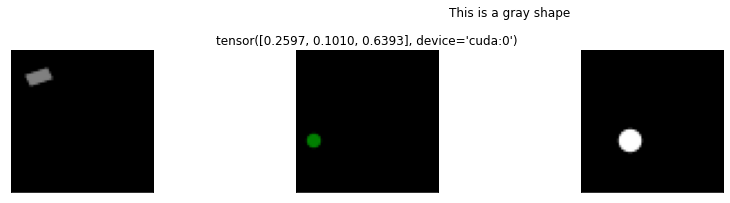

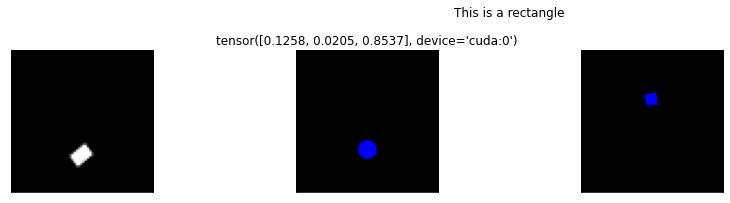

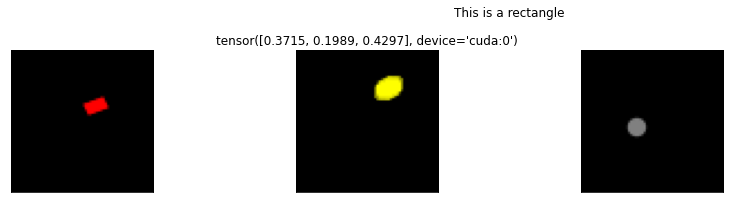

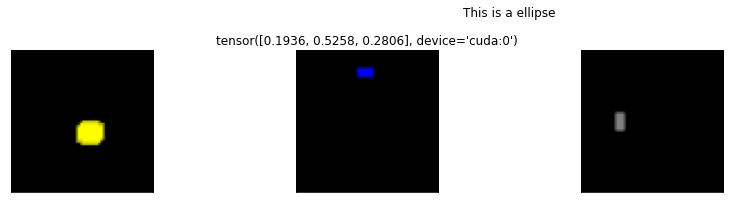

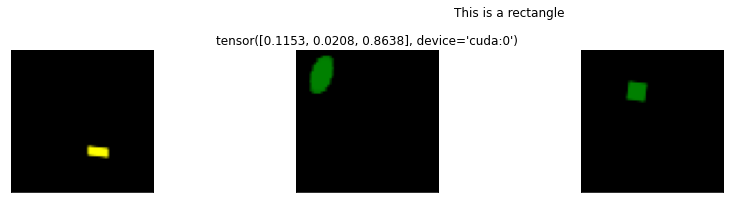

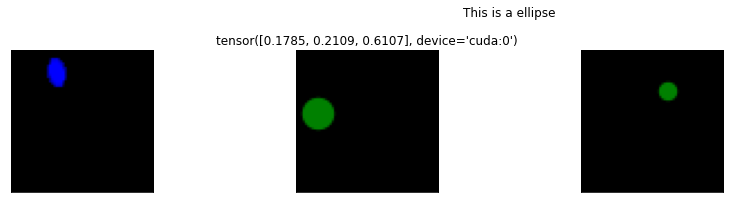

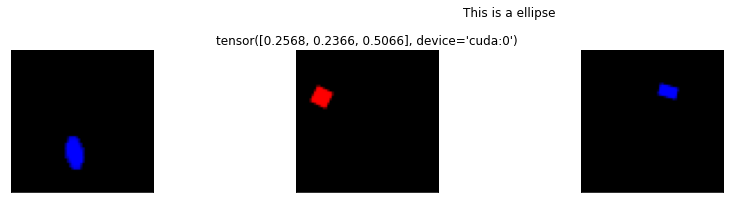

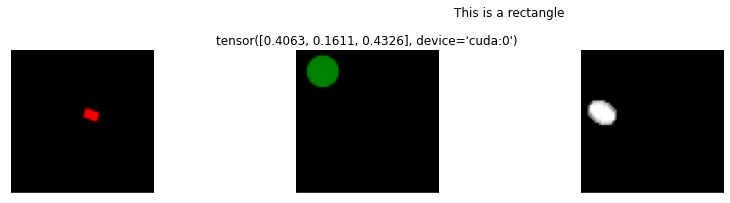

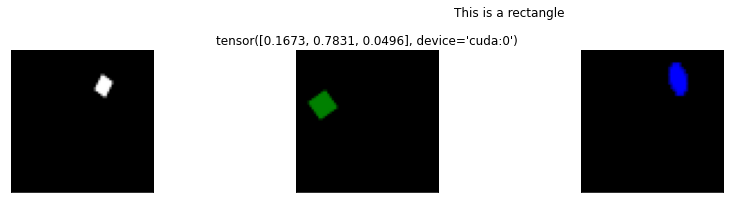

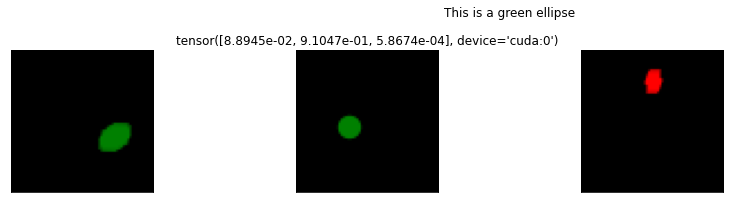

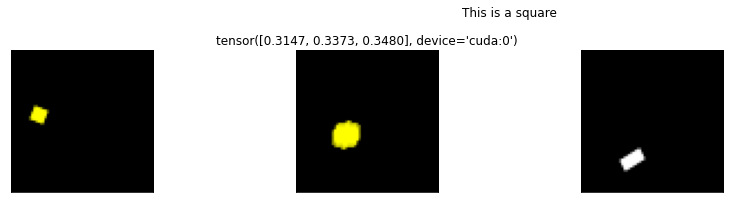

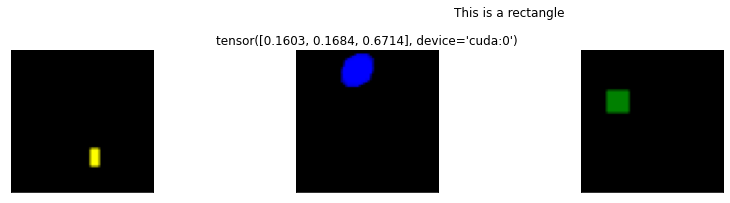

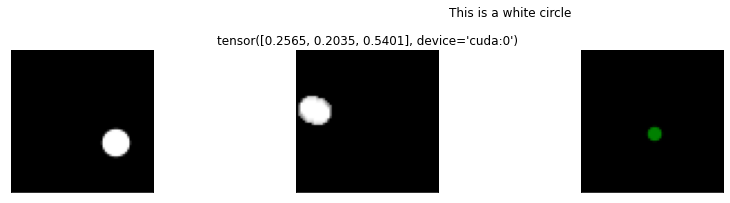

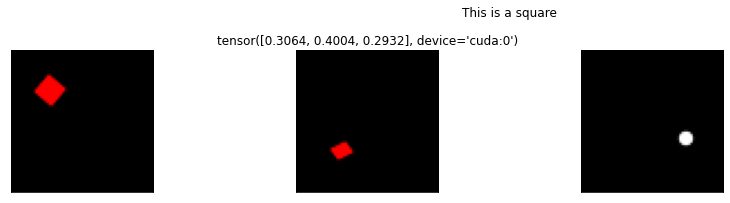

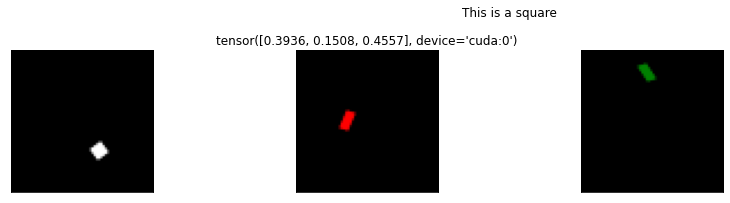

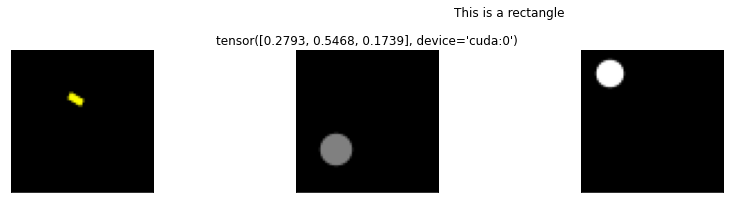

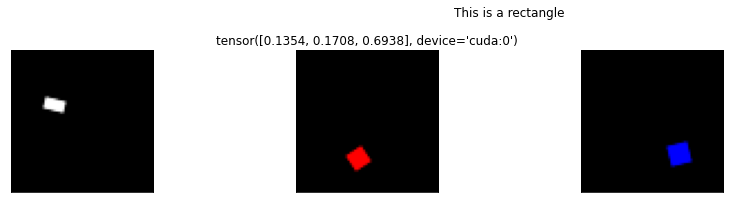

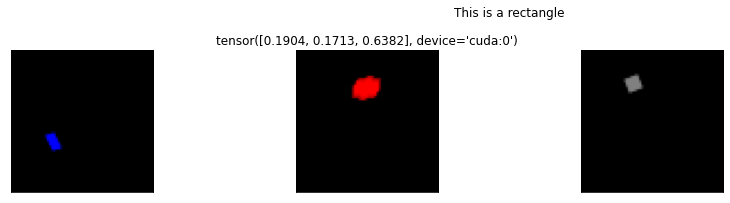

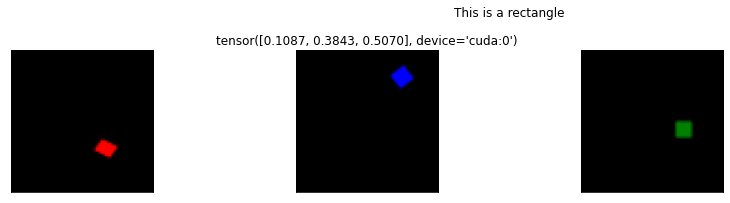

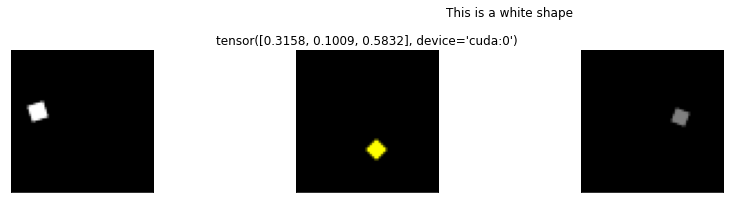

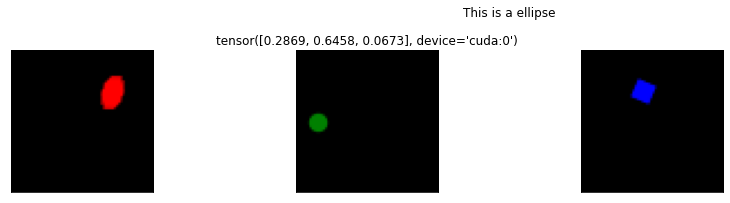

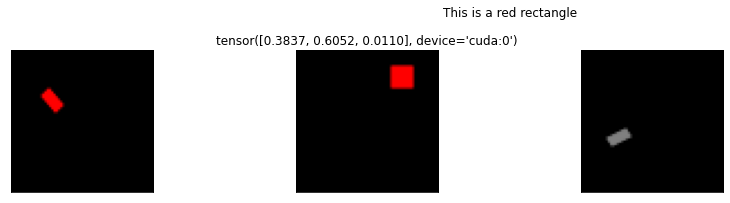

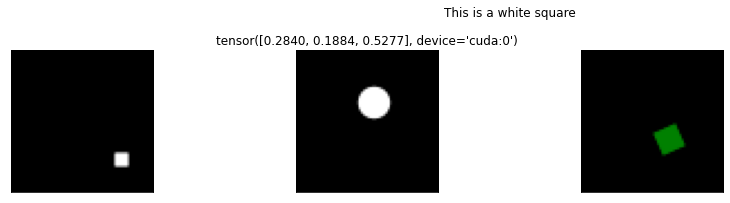

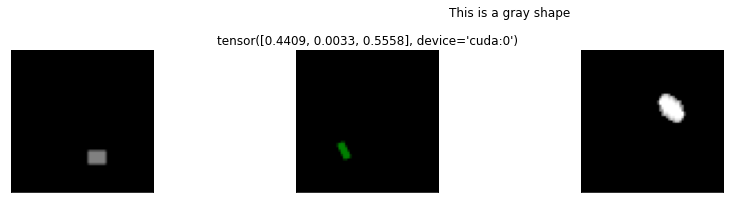

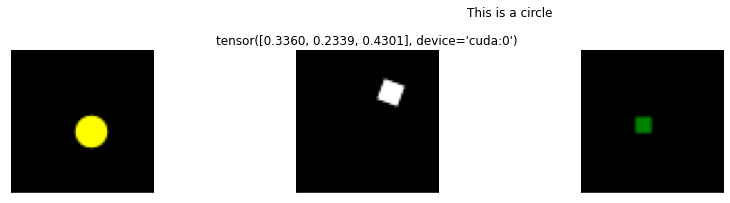

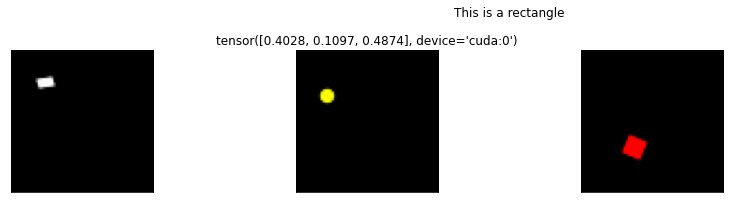

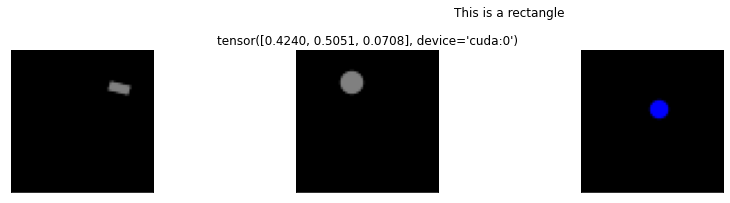

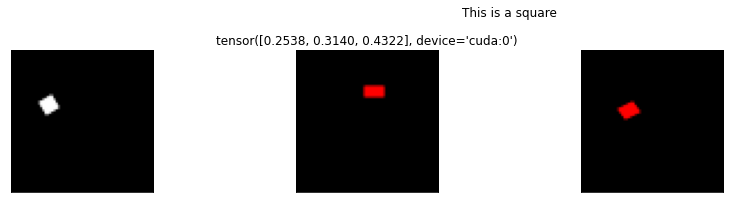

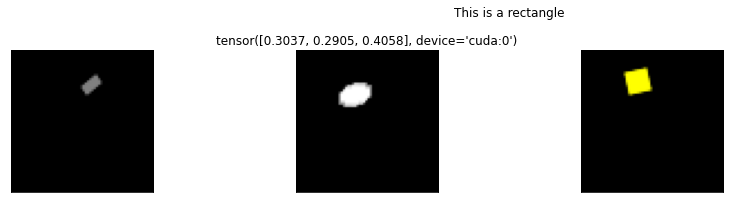

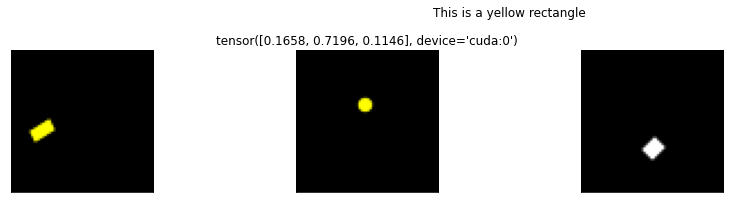

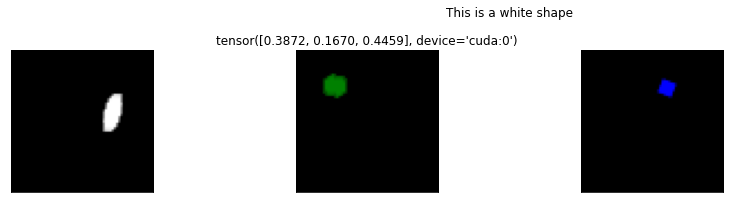

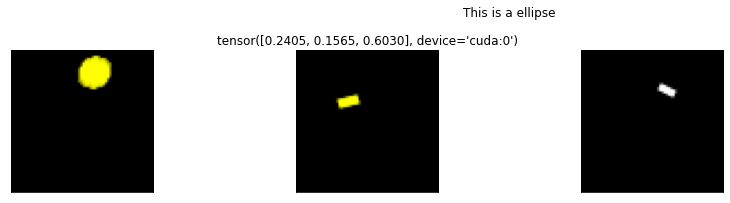

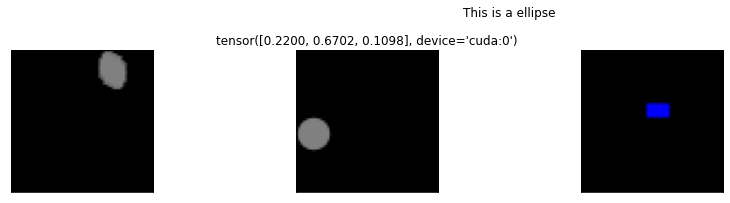

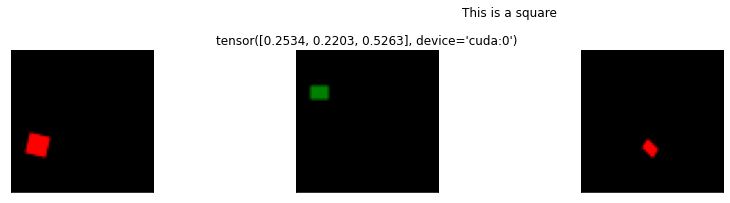

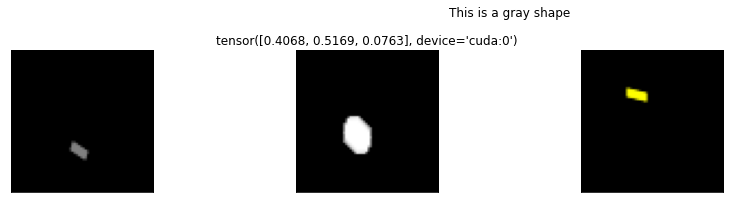

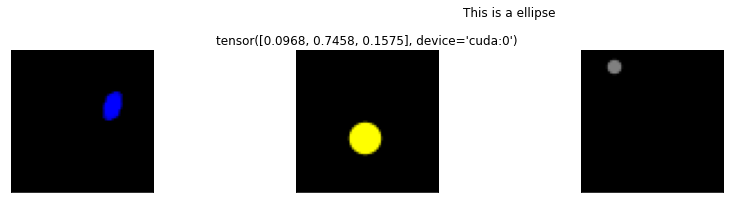

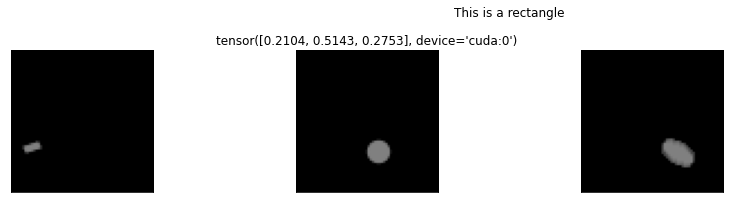

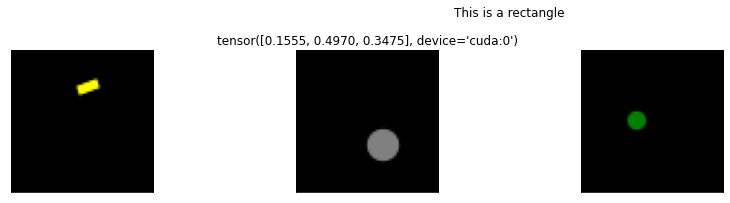

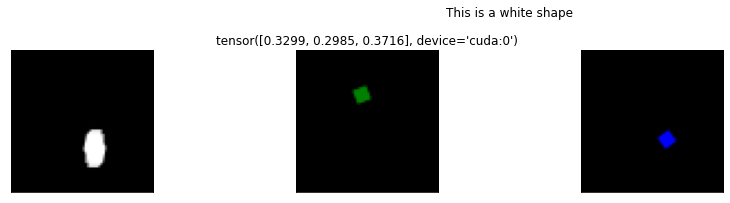

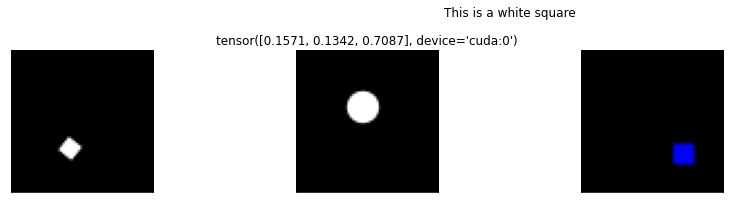

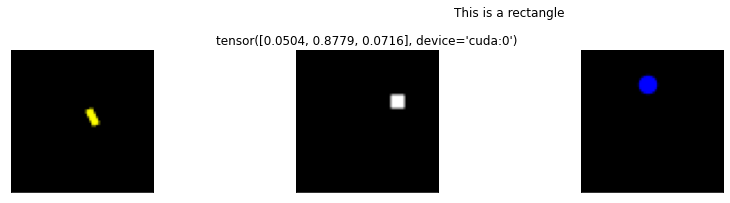

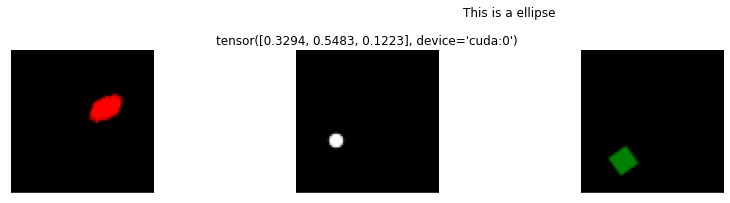

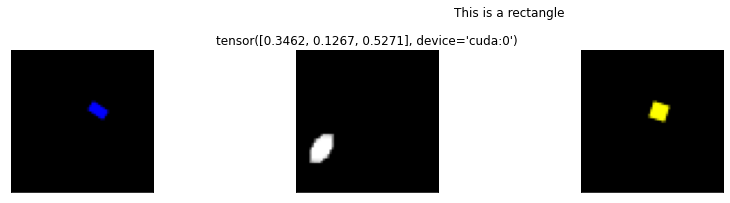

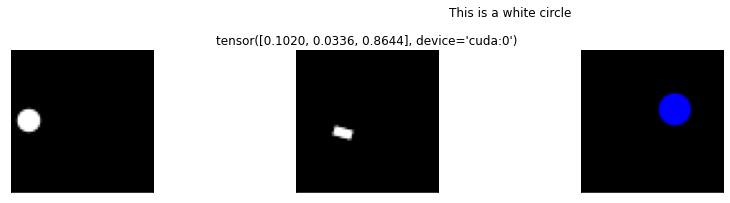

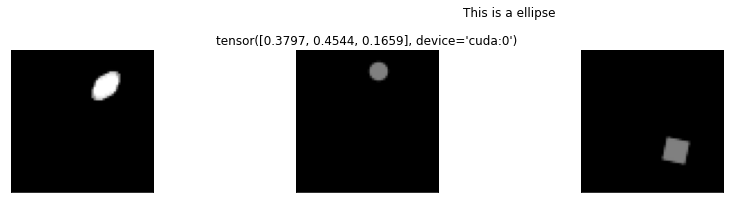

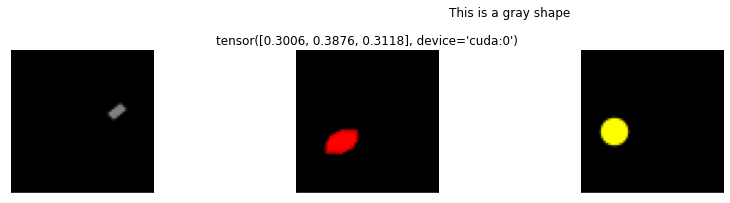

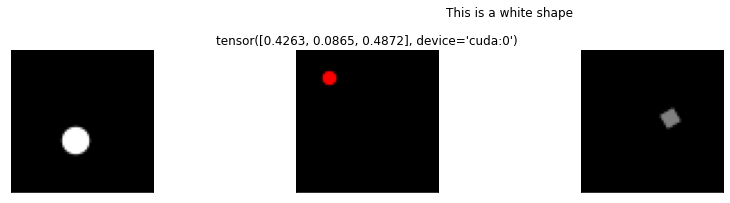

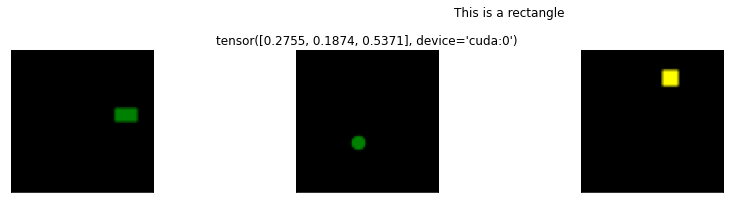

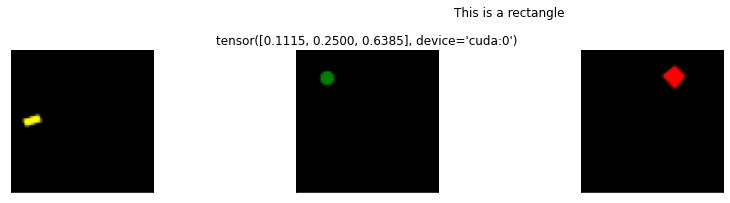

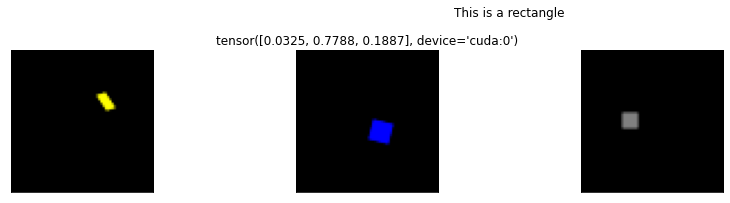

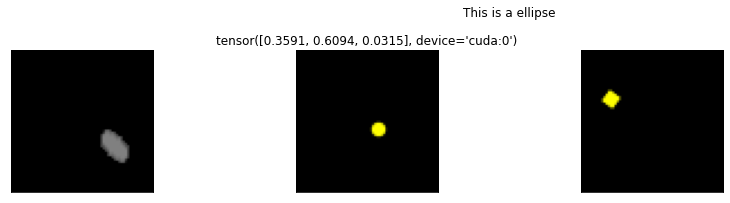

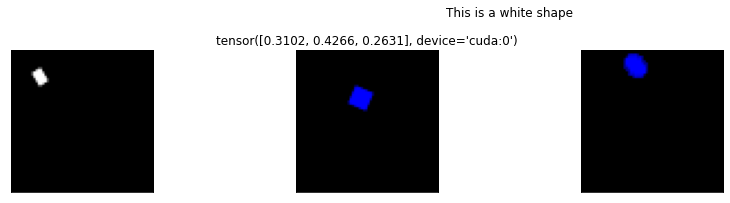

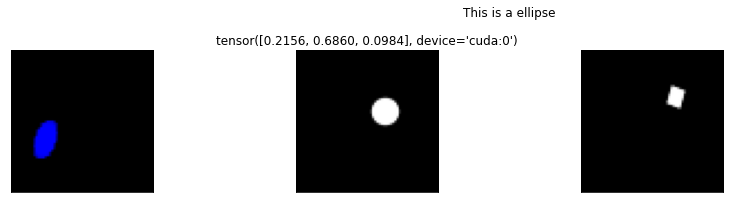

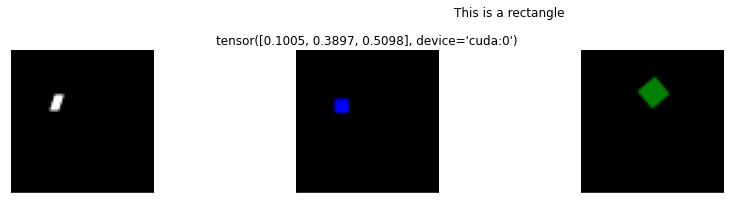

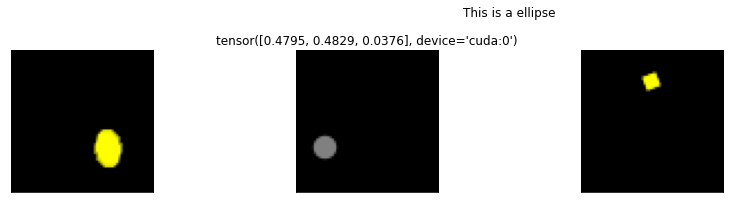

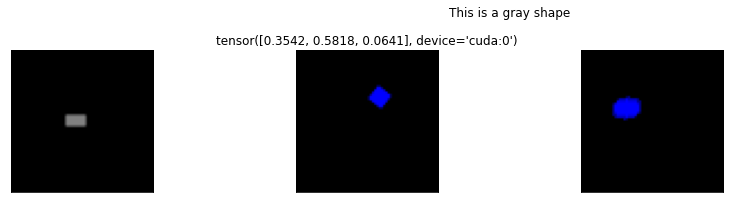

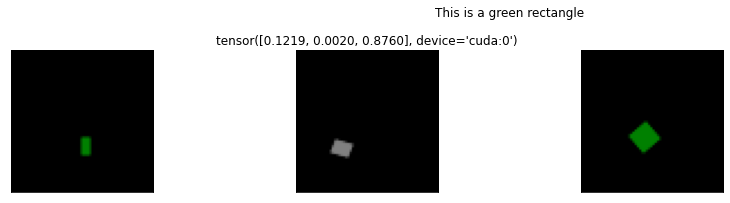

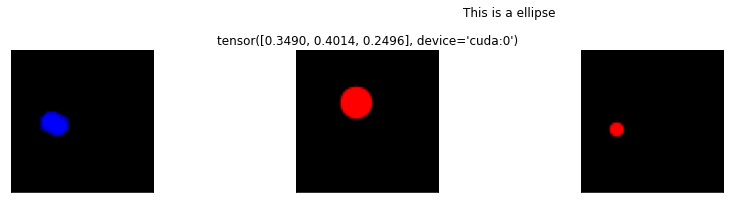

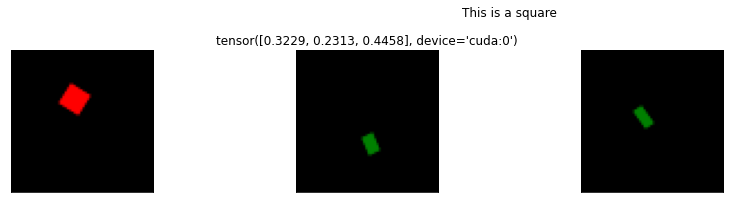

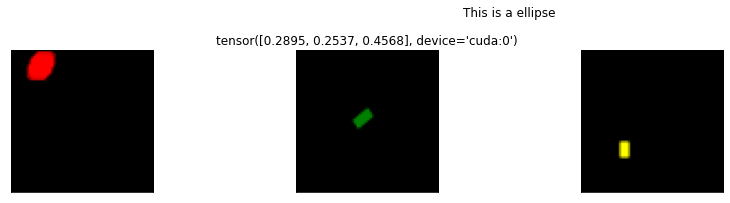

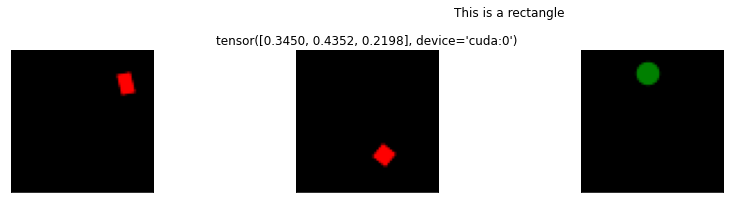

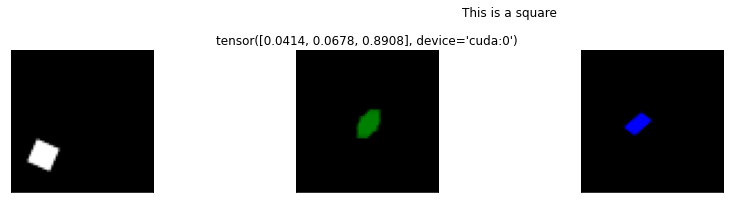

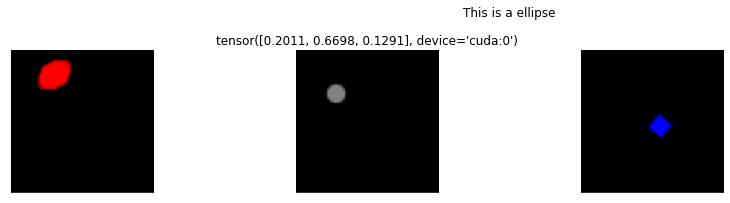

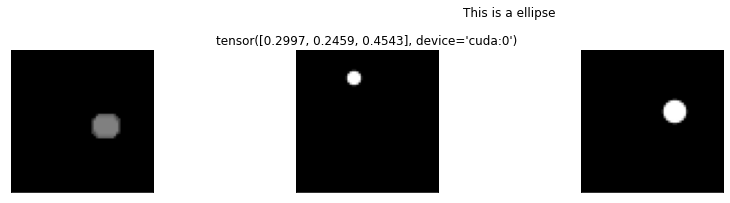

In [463]:
for i in fail_index_list:
    plt.figure(figsize=(16, 5))
    states = batch['imgs'][i]

    for j in range(3):
        image = Image.fromarray(np.uint8(states[j])).convert('RGB')
        plt.subplot(2, 4, j + 1)
        plt.imshow(image)
        plt.xticks([])
        plt.yticks([])
        if j == 1:
            lang = batch['langs'][i]
            utterance = "This is a " + lang
            plt.suptitle(utterance)
            plt.title(lis_scores_final[i])
            # plt.title(entropies[i])
    
    plt.tight_layout()    

In [464]:
fail_utterance_list = []

for i in fail_index_list:
    lang = batch['langs'][i]
    utterance = "This is a " + lang
    fail_utterance_list.append(utterance)

In [465]:
fail_utterance_list

['This is a white rectangle',
 'This is a ellipse',
 'This is a rectangle',
 'This is a ellipse',
 'This is a white shape',
 'This is a rectangle',
 'This is a ellipse',
 'This is a ellipse',
 'This is a ellipse',
 'This is a ellipse',
 'This is a white circle',
 'This is a ellipse',
 'This is a ellipse',
 'This is a ellipse',
 'This is a ellipse',
 'This is a ellipse',
 'This is a ellipse',
 'This is a white shape',
 'This is a ellipse',
 'This is a rectangle',
 'This is a square',
 'This is a white shape',
 'This is a ellipse',
 'This is a rectangle',
 'This is a ellipse',
 'This is a ellipse',
 'This is a ellipse',
 'This is a ellipse',
 'This is a ellipse',
 'This is a ellipse',
 'This is a ellipse',
 'This is a square',
 'This is a white shape',
 'This is a ellipse',
 'This is a rectangle',
 'This is a rectangle',
 'This is a white shape',
 'This is a rectangle',
 'This is a square',
 'This is a ellipse',
 'This is a rectangle',
 'This is a white shape',
 'This is a ellipse',
 'Th

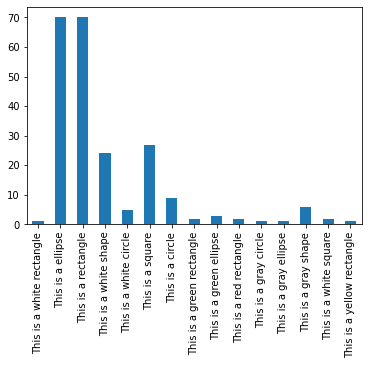

In [472]:
from collections import Counter
import pandas as pd

data = fail_utterance_list
count = Counter(data)
df = pd.DataFrame.from_dict(count, orient='index', columns=['fail_count'])
df.plot(kind='bar', legend=False)
plt.savefig("fail_utterance_bargraph.png", bbox_inches='tight', dpi=300)

In [473]:
df

,fail_count
This is a white rectangle,1
This is a ellipse,70
This is a rectangle,70
This is a white shape,24
This is a white circle,5
This is a square,27
This is a circle,9
This is a green rectangle,2
This is a green ellipse,3
This is a red rectangle,2


In [474]:
utterance_list = []
for i in range(len(imgs)):
    lang = batch['langs'][i]
    utterance = "This is a " + lang
    utterance_list.append(utterance)

In [478]:
data = utterance_list
count = Counter(data)
df2 = pd.DataFrame.from_dict(count, orient='index', columns=['total_count'])

In [479]:
df2

,total_count
This is a yellow shape,47
This is a red shape,59
This is a gray shape,69
This is a green shape,64
This is a white shape,79
This is a circle,125
This is a rectangle,146
This is a white square,6
This is a white rectangle,1
This is a blue shape,66


In [485]:
merged_df = pd.merge(df, df2, how='left', left_index=True, right_index=True)
merged_df

,fail_count,total_count
This is a white rectangle,1,1
This is a ellipse,70,136
This is a rectangle,70,146
This is a white shape,24,79
This is a white circle,5,6
This is a square,27,144
This is a circle,9,125
This is a green rectangle,2,4
This is a green ellipse,3,5
This is a red rectangle,2,3


In [488]:
df_concat = pd.concat([df, df2], axis=1)
df_concat

,fail_count,total_count
This is a white rectangle,1.0,1
This is a ellipse,70.0,136
This is a rectangle,70.0,146
This is a white shape,24.0,79
This is a white circle,5.0,6
This is a square,27.0,144
This is a circle,9.0,125
This is a green rectangle,2.0,4
This is a green ellipse,3.0,5
This is a red rectangle,2.0,3


In [ ]:
# df.plot(kind='bar', legend=False)
# plt.savefig("utterance_bargraph.png", bbox_inches='tight', dpi=300)